<div style="padding:10px; 
            color:#ffff;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            background-color: #213555;
            overflow:hidden;
            font-weight:500">1. Business Problem Understanding</div>

****

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Context</div>

>California house prices reflect the dynamic and competitive nature of the state's real estate market. Various factors influence these prices, including location, economic conditions, housing demand, and regulatory policies. High demand in metropolitan areas like San Francisco and Los Angeles drives up prices, while more affordable housing options can be found in suburban and rural regions.

>Understanding house prices is essential for buyers, investors, and policymakers to assess market trends, affordability, and investment potential. Factors such as interest rates, job growth, and housing supply play a crucial role in determining property values. As prices fluctuate, market participants must analyze historical trends and future projections to make informed decisions about buying, selling, or developing real estate in California.

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Stake Holder</div>

>1. **Residents** 
Includes homebuyers, homeowners, and renters who are directly affected by property values, affordability, and housing availability.
>2. **Real Estate Professionals** 
Includes agents, brokers, developers, investors, and mortgage lenders who influence market trends, pricing, and housing supply.

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Problem Statement</div>
            
>California's housing market is influenced by various factors, including location, economic conditions, supply and demand, and government policies. Accurately determining house prices is crucial for buyers, sellers, investors, and policymakers to make informed decisions. However, fluctuating market trends, affordability concerns, and regional disparities create challenges in predicting property values.

>This study aims to identify key factors affecting house prices in California and develop a reliable pricing model. By analyzing economic indicators, housing trends, and real estate data, we seek to improve price estimation accuracy and provide insights that benefit stakeholders in the housing market.

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Goals</div>
            
>The goal of this project is to analyze key factors influencing California house prices and develop a machine learning model for accurate price estimation. By leveraging real estate data, market trends, and predictive algorithms, the project aims to provide data-driven insights that help buyers, sellers, and investors make informed decisions.

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Analytic Approach</div>

>To predict California house prices using machine learning, we will collect and preprocess real estate data by handling missing values, encoding categorical features, and normalizing numerical variables. Feature selection will be performed using correlation analysis and model-based importance, with potential feature engineering such as price per square foot and proximity to key locations. The dataset will be split into training and testing sets, and five models—CatBoost, LightGBM, XGBoost, HistGradientBoosting, and Random Forest—will be trained using cross-validation. Model performance will be evaluated using R², MAE, and MAPE to assess accuracy and reliability. Hyperparameter tuning will be conducted using RandomizedSearchCV, and the best model will be deployed via a web-based interface. Finally, SHAP analysis will be used to interpret feature importance, providing actionable insights for real estate decision-making.

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Data Understanding</div>

   | Features                | Description                                                    |
   |-------------------------|----------------------------------------------------------------|
   | Latitude                | Geographic coordinate specifying north-south position          |
   | Longitude               | Geographic coordinate specifying east-west position.           |
   | Housing median age      | Median age of houses in the area.                              |
   | Total rooms             | Total number of rooms in a housing unit                        |
   | Total bed rooms         | Total number of bedrooms in a housing unit.                    |
   | Population              | Total number of people residing in the area.                   |
   | Households              | Total number of households in the area.                        |
   | Median income           | Median income of households in the area.                       |
   | Ocean proximity         | Distance of the area from the ocean.                           |
   | Median house value      | Median value of houses in the area.                            |


### Import Module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### Import Dataset

In [2]:
df=pd.read_csv('data_california_house.csv')
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.79     36.73                52.0        112.0            28.0   
1        -122.21     37.77                43.0       1017.0           328.0   
2        -118.04     33.87                17.0       2358.0           396.0   
3        -118.28     34.06                17.0       2518.0          1196.0   
4        -119.81     36.73                50.0        772.0           194.0   
...          ...       ...                 ...          ...             ...   
14443    -121.26     38.27                20.0       1314.0           229.0   
14444    -120.89     37.48                27.0       1118.0           195.0   
14445    -121.90     36.58                31.0       1431.0             NaN   
14446    -117.93     33.62                34.0       2125.0           498.0   
14447    -115.56     32.80                15.0       1171.0           328.0   

       population  households  median_income ocean_proximity  \
0           193.0        40.0         1.9750          INLAND   
1           836.0       277.0         2.2604        NEAR BAY   
2          1387.0       364.0         6.2990       <1H OCEAN   
3          3051.0      1000.0         1.7199       <1H OCEAN   
4           606.0       167.0         2.2206          INLAND   
...           ...         ...            ...             ...   
14443       712.0       219.0         4.4125          INLAND   
14444       647.0       209.0         2.9135          INLAND   
14445       704.0       393.0         3.1977      NEAR OCEAN   
14446      1052.0       468.0         5.6315       <1H OCEAN   
14447      1024.0       298.0         1.3882          INLAND   

       median_house_value  
0                 47500.0  
1                100000.0  
2                285800.0  
3                175000.0  
4                 59200.0  
...                   ...  
14443            144600.0  
14444            159400.0  
14445            289300.0  
14446            484600.0  
14447             69400.0  

[14448 rows x 10 columns]

In [3]:
missing_percent = df.isnull().sum() / len(df) * 100

dtypes = df.dtypes

unique_values = {col: df[col].value_counts().head(9).index.tolist() for col in df.columns}

summary = pd.DataFrame({
    'Feature': df.columns,
    'Missing Percentage': missing_percent.values,
    'Data Type': dtypes.values,
    'Top 9 Unique Values': [unique_values[col] for col in df.columns]
})

pd.set_option('display.max_colwidth', None)

summary

Feature  Missing Percentage Data Type  \
0           longitude            0.000000   float64   
1            latitude            0.000000   float64   
2  housing_median_age            0.000000   float64   
3         total_rooms            0.000000   float64   
4      total_bedrooms            0.948228   float64   
5          population            0.000000   float64   
6          households            0.000000   float64   
7       median_income            0.000000   float64   
8     ocean_proximity            0.000000    object   
9  median_house_value            0.000000   float64   

                                                                        Top 9 Unique Values  
0          [-118.31, -118.28, -118.3, -118.29, -118.32, -118.36, -118.27, -118.19, -118.37]  
1                            [34.06, 34.05, 34.04, 34.08, 34.07, 34.1, 34.09, 34.02, 34.03]  
2                                    [52.0, 36.0, 35.0, 16.0, 17.0, 34.0, 33.0, 26.0, 18.0]  
3                  [1582.0, 1722.0, 1613.0, 1705.0, 1703.0, 1650.0, 1717.0, 1999.0, 1465.0]  
4                           [331.0, 348.0, 289.0, 426.0, 312.0, 309.0, 343.0, 313.0, 280.0]  
5                      [1227.0, 837.0, 781.0, 1203.0, 891.0, 1005.0, 761.0, 1301.0, 1156.0]  
6                           [335.0, 316.0, 386.0, 380.0, 239.0, 429.0, 306.0, 340.0, 297.0]  
7                         [2.875, 4.125, 3.125, 2.625, 15.0001, 3.875, 3.625, 3.375, 4.375]  
8                                         [<1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND]  
9  [500001.0, 137500.0, 162500.0, 187500.0, 225000.0, 112500.0, 350000.0, 87500.0, 67500.0]

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Dataset </div>

>This dataset contains 14,448 entries with 10 features used to predict house prices in California (median_house_value). It consists of 8 numerical features (longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income), 1 categorical feature (ocean_proximity), and 1 target variable (median_house_value). The numerical features capture location information, housing characteristics, and socioeconomic conditions, while the categorical feature indicates proximity to the ocean, which can influence prices. There are 0.95% missing values in total_bedrooms, requiring imputation or removal. This dataset is well-suited for regression analysis, as its features provide valuable insights into determining house prices.

<div style="padding:10px; 
            color:#ffff;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            background-color: #213555;
            overflow:hidden;
            font-weight:500">2. Exploratory Data Analysis</div>

****

In [4]:
df['median_income']=df['median_income']*1000

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Check Distribution</div>


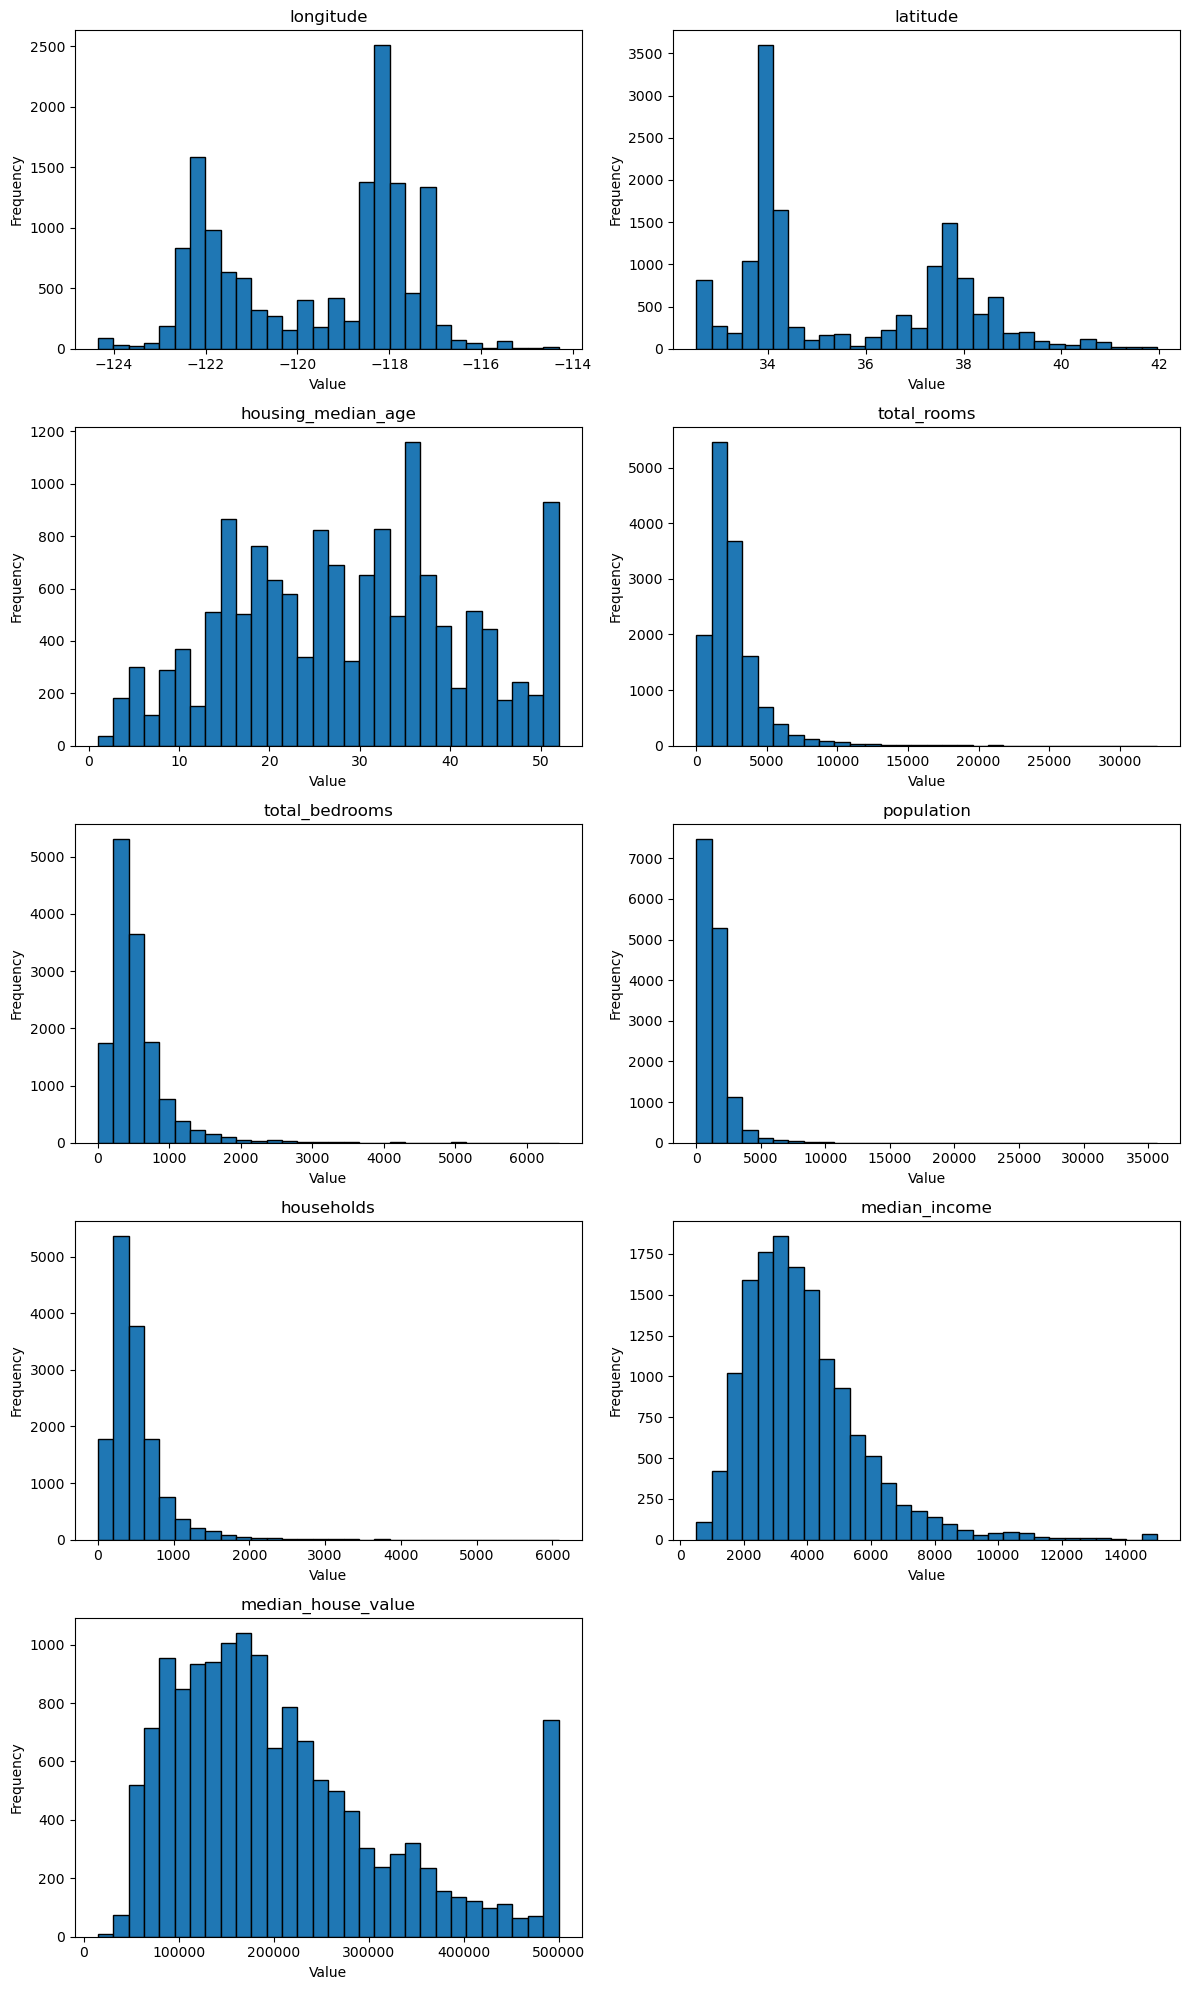

In [5]:
numerical_cols = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
                  "population", "households", "median_income", "median_house_value"]

cols_per_row = 2
num_cols = len(numerical_cols)
num_rows = -(-num_cols // cols_per_row) 

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>Longitude & Latitude: The distribution of houses is concentrated in specific locations, likely reflecting the geographic spread of California. There are peaks at certain longitudes and latitudes, indicating densely populated areas.</li>
    <li>Housing Median Age: The data is skewed toward older housing, with a peak at the maximum age (52 years). This suggests that many homes were built several decades ago.</li>
    <li>Total Rooms & Total Bedrooms: Both have a right-skewed distribution, meaning most houses have a relatively low number of rooms and bedrooms, while a few have significantly higher values. This indicates that large houses are less common.</li>
    <li>Population & Households: Both distributions show a strong right skew, suggesting that most neighborhoods have relatively small populations and household counts, while some have significantly larger values.</li>
    <li>Median Income: The distribution is right-skewed, with most households having a median income between 2000 to 6000, while very high incomes are rare.</li>
    <li>Median House Value: The histogram shows a peak at the maximum value (500,000), indicating a price cap in the dataset. This suggests that some homes could be worth more, but their values were truncated at 500,000.</li>

In [6]:
import scipy.stats as stats

shapiro_results = {}
for col in df.select_dtypes(include=['number']).columns:
    if df[col].isnull().sum() > 0:
        shapiro_results[col] = stats.shapiro(df[col].dropna())
    else:
        shapiro_results[col] = stats.shapiro(df[col])

shapiro_df = pd.DataFrame(
    [(col, result.statistic, result.pvalue) for col, result in shapiro_results.items()],
    columns=['Features', 'Statistic', 'p-value']
)

shapiro_df

c:\Users\Lenovo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14448.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Lenovo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14311.
  res = hypotest_fun_out(*samples, **kwds)


Features  Statistic       p-value
0           longitude   0.896558  1.354687e-70
1            latitude   0.877646  3.829858e-74
2  housing_median_age   0.978294  7.326815e-42
3         total_rooms   0.696846  7.317647e-95
4      total_bedrooms   0.735300  2.296518e-91
5          population   0.699647  1.228938e-94
6          households   0.746097  1.310888e-90
7       median_income   0.895094  6.891727e-71
8  median_house_value   0.911841  2.678505e-67

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>The p-values for all features are extremely small (p < 0.05), indicating that none of the features follow a normal distribution.</li>
    <li>The test statistic values are all less than 1, which further confirms the deviation from normality.</li>
    <li>Since the data is non-normal, parametric tests or models that assume normality (e.g., linear regression) may not be appropriate.</li>
    <li>Consider using non-parametric methods (e.g., tree-based models like Random Forest or Gradient Boosting).</li>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Check Linearity</div>

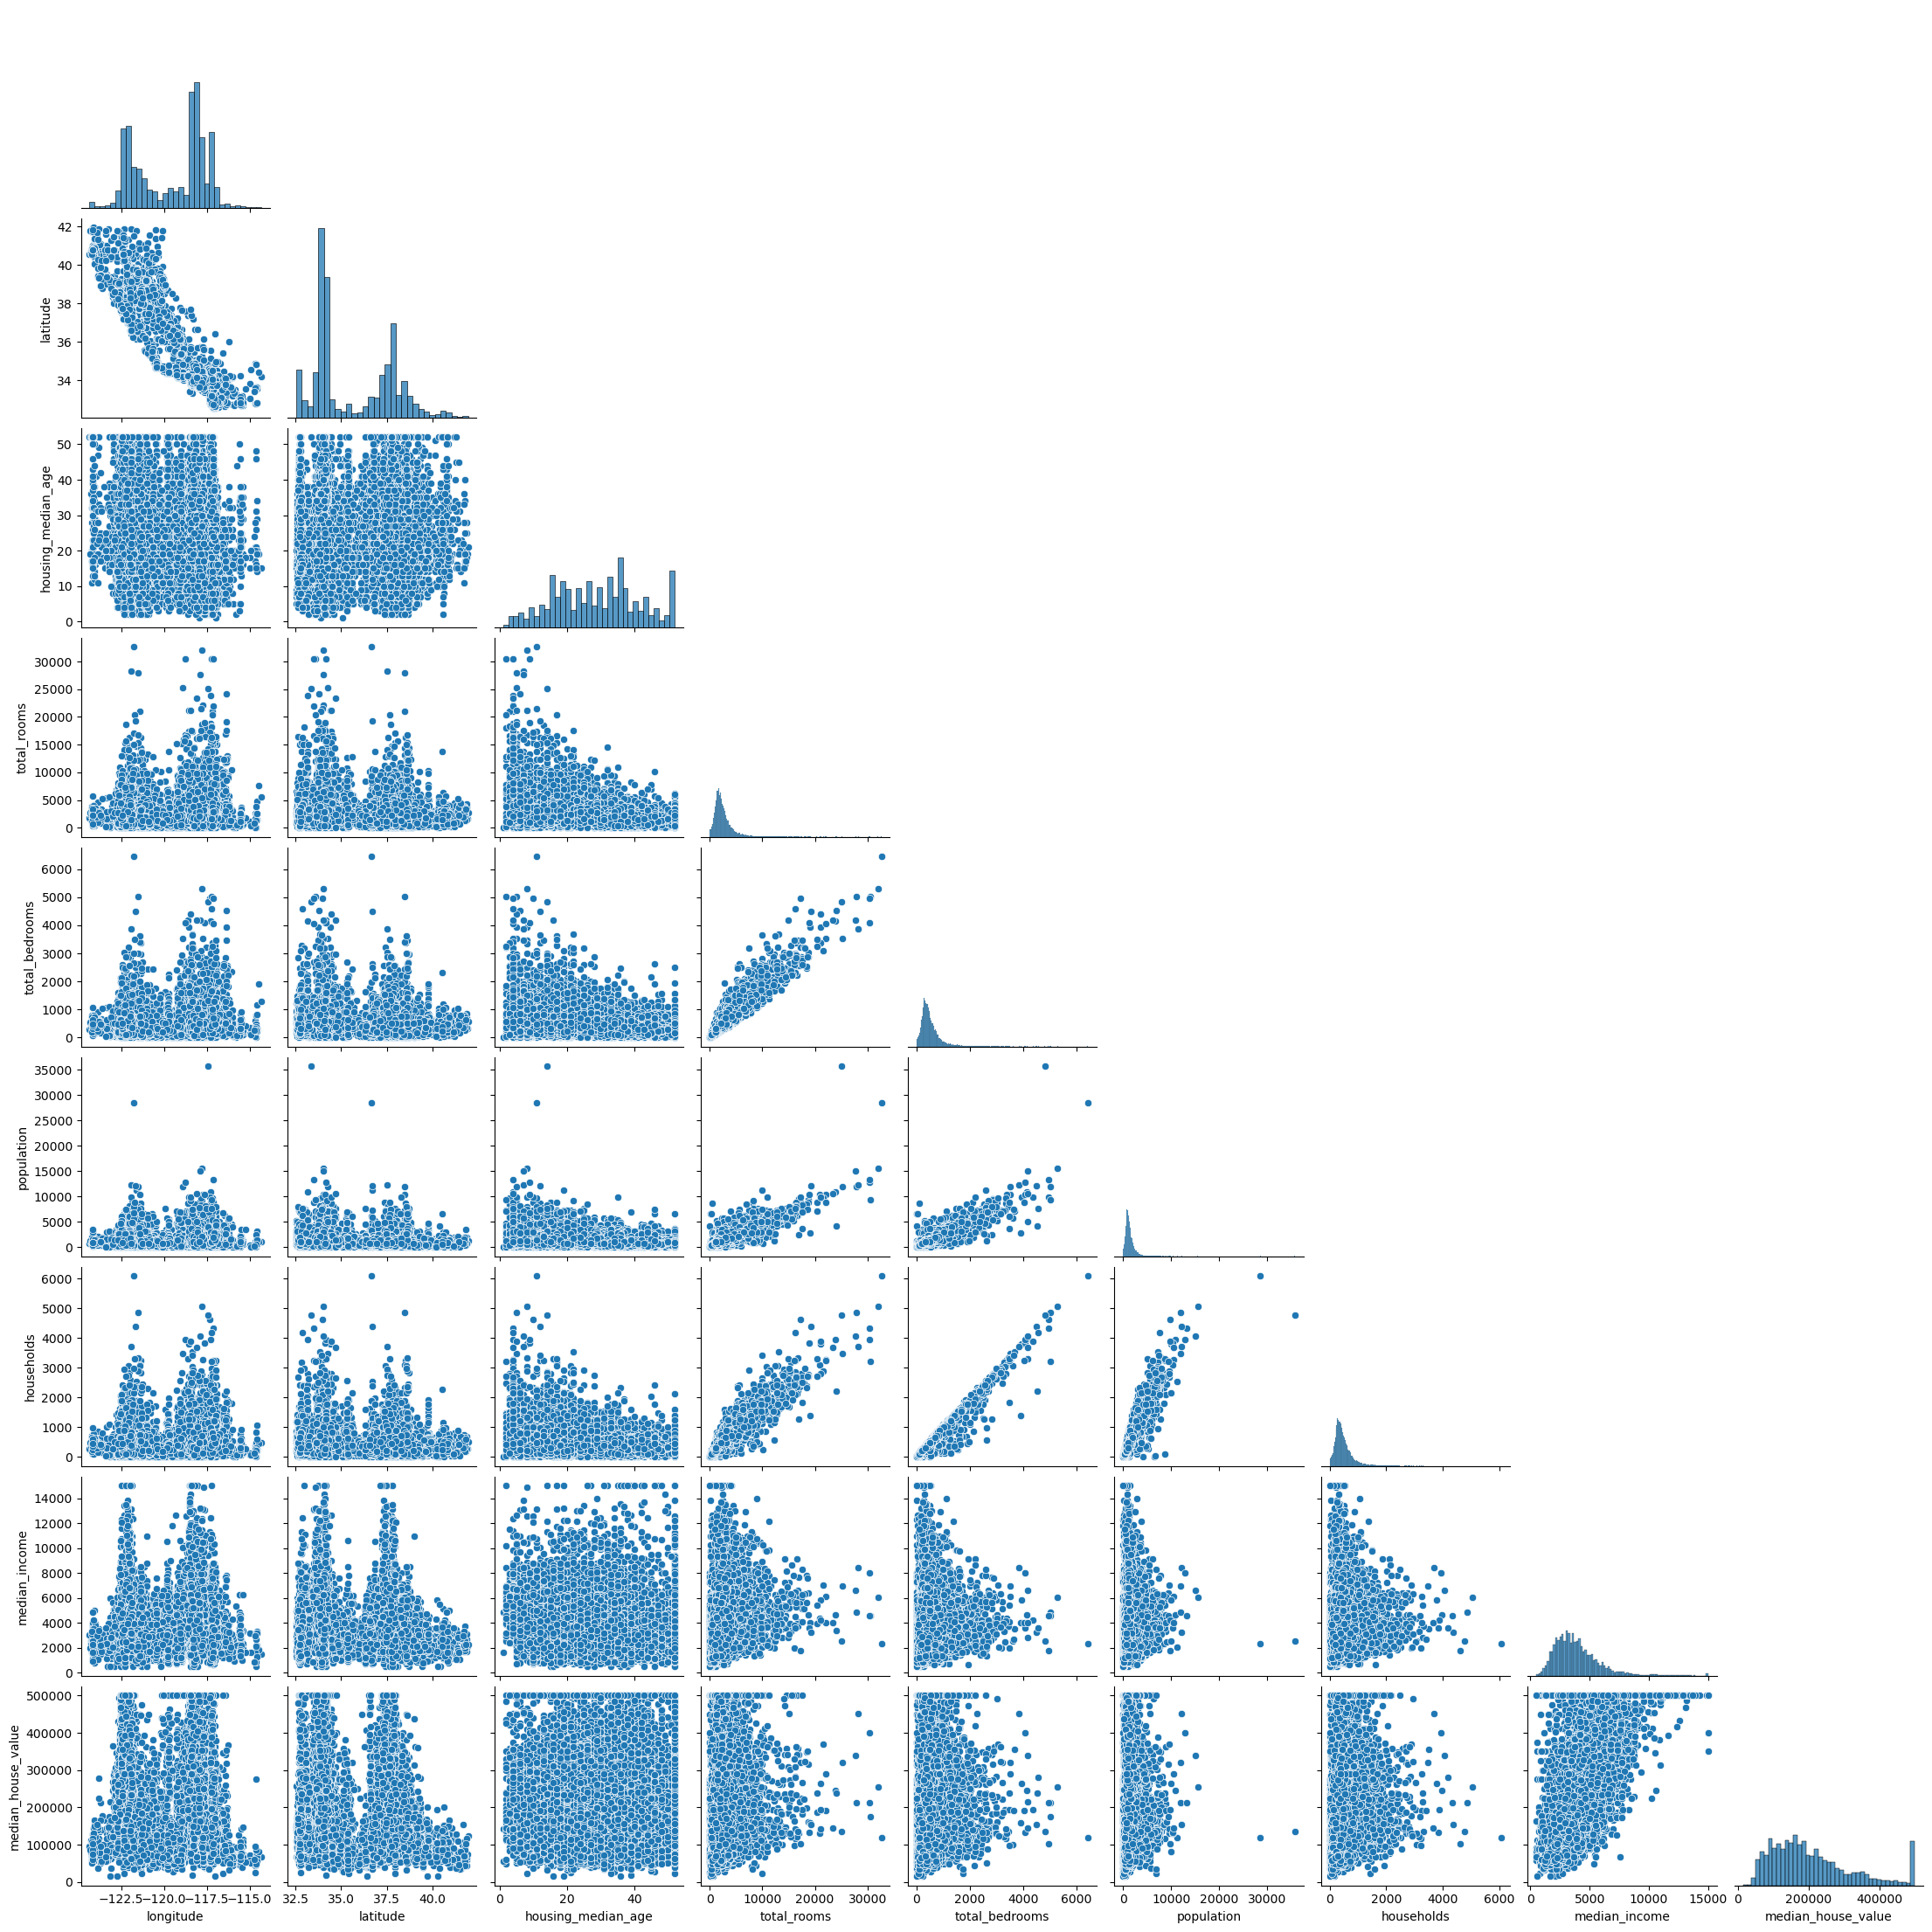

In [7]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

sns.pairplot(df[num_cols], corner=True)  
plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>total_bedrooms vs total_rooms: A strong linear relationship exists, as houses with more rooms tend to have more bedrooms.</li>
    <li>median_income vs median_house_value: A clear positive correlation, indicating that areas with higher median incomes tend to have more expensive houses.</li>
    <li>latitude vs median_house_value: A curved pattern suggests that certain locations have significantly higher house prices, possibly indicating premium areas.</li>
    <li>longitude vs median_house_value: No strict linear relationship, but trends suggest that geographical factors, such as urban vs suburban areas, influence house prices.</li>
    <li>population vs median_house_value: No apparent pattern, implying that population size does not significantly impact house prices.</li>
    <li>households vs median_house_value: No clear correlation, suggesting that the number of households in an area does not determine house prices.</li>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Check Outlier</div>


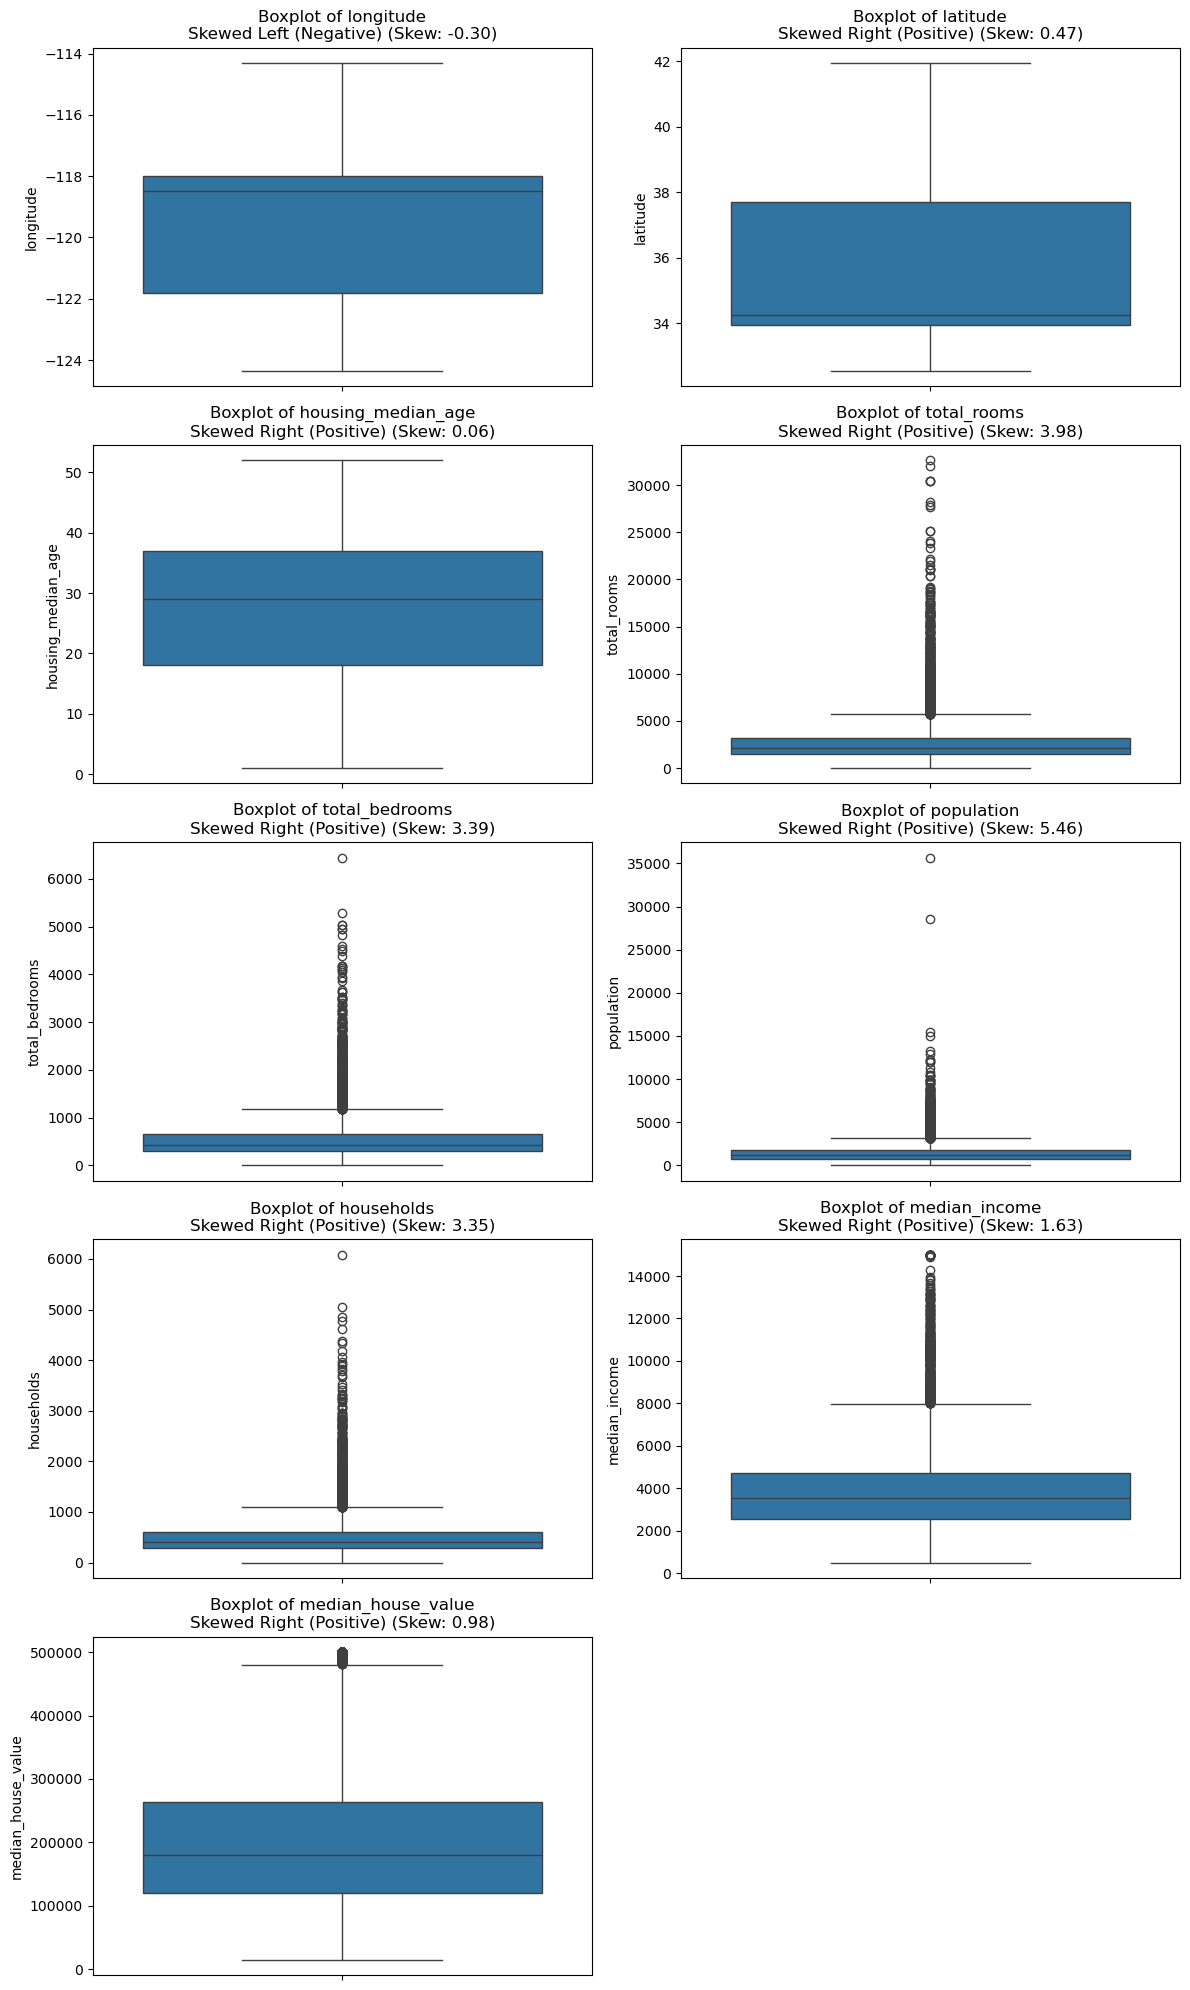

In [8]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 2
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    
    skewness = df[col].skew()
    
    if skewness > 0:
        skew_text = 'Skewed Right (Positive)'
    elif skewness < 0:
        skew_text = 'Skewed Left (Negative)'
    else:
        skew_text = 'Symmetric'
    
    axes[i].set_title(f'Boxplot of {col}\n{skew_text} (Skew: {skewness:.2f})')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>Median Income & Median House Value: Strong positive correlation. Areas with higher median income tend to have more expensive houses.</li>
    <li>Total Rooms, Total Bedrooms, Population, Households: Many outliers indicate large houses or densely populated areas. However, the number of rooms or population does not always directly correlate with house prices.</li>
    <li>Latitude & Longitude: House prices are higher in certain locations, likely in coastal or economic hubs like San Francisco and Los Angeles.</li>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Check Correlation</div>


### Correlation Method Selection

| Scenario | Spearman | Pearson |
|----------|------------|------------|
| Data distribution | Not Normal | Normal | 
| Linearity | Not linear | Linear |
| Outlier | A lot of outliers | No outlier |

Based on insights from data distributions, linearity and boxplots, the method used to check correlation between features is Spearman method.

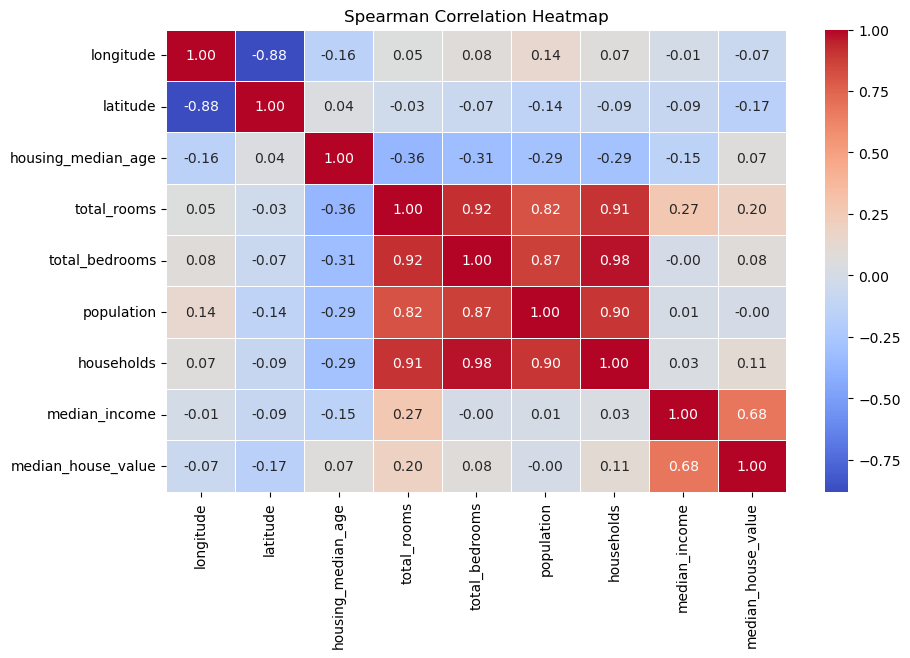

In [9]:
num_cols = df.select_dtypes(include=['float64', 'int64'])

spearman_corr = num_cols.corr(method='spearman')

plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [10]:
high_corr = spearman_corr.where(np.triu(np.ones(spearman_corr.shape), k=1).astype(bool))  
high_corr = high_corr.stack().reset_index() 
high_corr.columns = ['Feature 1', 'Feature 2', 'Spearman Correlation']  
high_corr = high_corr[high_corr['Spearman Correlation'] > 0.5]  

high_corr

Feature 1           Feature 2  Spearman Correlation
21     total_rooms      total_bedrooms              0.916249
22     total_rooms          population              0.815582
23     total_rooms          households              0.907105
26  total_bedrooms          population              0.870014
27  total_bedrooms          households              0.975877
30      population          households              0.902576
35   median_income  median_house_value              0.680296

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>total_rooms and total_bedrooms (0.916249): These two features are highly correlated because the number of bedrooms is typically proportional to the total number of rooms in a house. Houses with more rooms generally have more bedrooms, which can influence the house price. Larger homes with more rooms and bedrooms are often more expensive.</li>
    <li>total_rooms and households (0.907105): The number of rooms is strongly correlated with the number of households. This suggests that larger homes (with more rooms) are more likely to accommodate more households. Homes that can house more families or individuals tend to be more valuable.</li>
    <li>total_bedrooms and households (0.975877): This is the highest correlation in the dataset. It indicates that the number of bedrooms is closely related to the number of households. Homes with more bedrooms are likely to support more households, making them more desirable and potentially more expensive.</li>
    <li>total_rooms and population (0.815582): The number of rooms is also correlated with the population in the area. Areas with larger homes (more rooms) tend to have higher populations, which could indicate more developed or urbanized areas. These areas often have higher house prices due to demand and location.</li>
    <li>total_bedrooms and population (0.870014): Similar to the above, the number of bedrooms is correlated with population. More bedrooms can accommodate more people, and areas with such homes are likely to be in higher demand, driving up prices.</li>
    <li>population and households (0.902576): Population and households are strongly correlated because more households generally mean a higher population. Areas with more households are often more densely populated and may have higher house prices due to the demand for housing in those areas.</li>
    <li>median_income and median_house_value (0.680296): While not as high as the other correlations, this relationship is still significant. Higher median income in an area is associated with higher house prices. This makes sense because areas with higher incomes can afford more expensive homes, and the demand for better housing drives up prices.</li>
    <li>The Spearman correlation analysis indicates the presence of multicollinearity within the dataset.</li>

In [11]:
low_corr = spearman_corr.where(np.triu(np.ones(spearman_corr.shape), k=1).astype(bool))  
low_corr = low_corr.stack().reset_index() 
low_corr.columns = ['Feature 1', 'Feature 2', 'Spearman Correlation']  
low_corr = low_corr[low_corr['Spearman Correlation'] < 0.0]  

low_corr

Feature 1           Feature 2  Spearman Correlation
0            longitude            latitude             -0.879491
1            longitude  housing_median_age             -0.159119
6            longitude       median_income             -0.006842
7            longitude  median_house_value             -0.069389
9             latitude         total_rooms             -0.033410
10            latitude      total_bedrooms             -0.069869
11            latitude          population             -0.136729
12            latitude          households             -0.087238
13            latitude       median_income             -0.091646
14            latitude  median_house_value             -0.167250
15  housing_median_age         total_rooms             -0.363420
16  housing_median_age      total_bedrooms             -0.314208
17  housing_median_age          population             -0.288264
18  housing_median_age          households             -0.289847
19  housing_median_age       median_income             -0.148067
28      total_bedrooms       median_income             -0.002529
32          population  median_house_value             -0.001653

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>longitude and latitude (-0.879): A very strong negative correlation. This indicates a close relationship between geographic coordinates. For example, in California, moving westward (decreasing longitude) is often associated with moving northward (increasing latitude).</li>
    <li>housing_median_age with total_rooms (-0.363), total_bedrooms (-0.314), population (-0.288), and households (-0.290): Moderate negative correlations. This suggests that areas with older homes tend to have fewer rooms, bedrooms, population, and households.</li>
    <li>longitude with median_house_value (-0.069) and latitude with median_house_value (-0.167): Weak negative correlations. Geographic location has a slight influence on house prices, but it is not very significant.</li>
    <li>latitude with median_income (-0.092): Weak negative correlation. This indicates that more northern areas tend to have slightly lower median incomes.</li>
    <li>housing_median_age with median_income (-0.148): Weak negative correlation. Areas with older homes tend to have lower median incomes.</li>
    <li>longitude with median_income (-0.007) and total_bedrooms with median_income (-0.003): Almost no correlation. This suggests that these features have no linear relationship with median income.</li>
    <li>population with median_house_value (-0.002): Almost no correlation. Population does not significantly affect house prices.</li>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2240\72669044.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


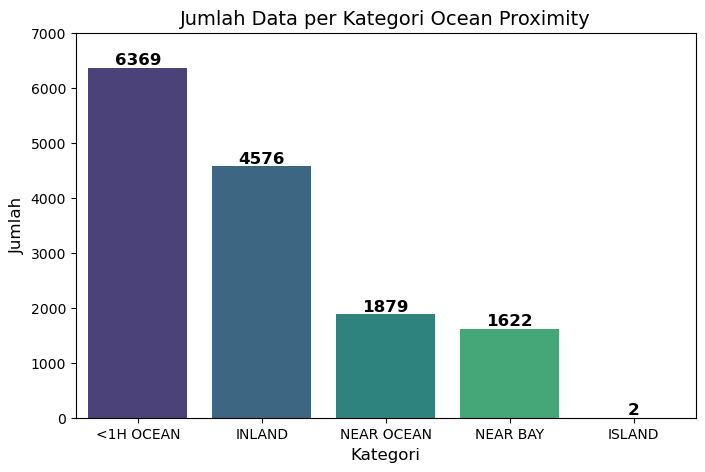

In [12]:
value_counts = df['ocean_proximity'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Jumlah Data per Kategori Ocean Proximity", fontsize=14)
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.ylim(0, max(value_counts.values) * 1.1) 

plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>The "< 1H OCEAN" category has the highest number of samples (6,369), followed by "INLAND" (4,576). The "ISLAND" category has only 2 data points, which is significantly lower than the other categories.</li>
    <li>The high number of properties in the "< 1H OCEAN" and "INLAND" categories suggests that most homes are located in or near large cities or urban areas. This could indicate a preference for living in areas with better economic opportunities or access to urban facilities.</li>
    <li>With only 2 data points, the "ISLAND" category is too small for meaningful statistical analysis, which may explain why the Kruskal-Wallis test previously returned NaN results. It might be necessary to remove or merge this category with another group for more reliable analysis.</li>
    <li>Since a significant number of houses are located near the ocean ("< 1H OCEAN", "NEAR OCEAN", and "NEAR BAY"), it would be valuable to analyze whether proximity to water impacts housing prices.</li>

In [13]:
df = df[df['ocean_proximity'] != 'ISLAND']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2240\3390556331.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ocean_proximity', y='median_house_value', data=df_agg, palette='viridis')


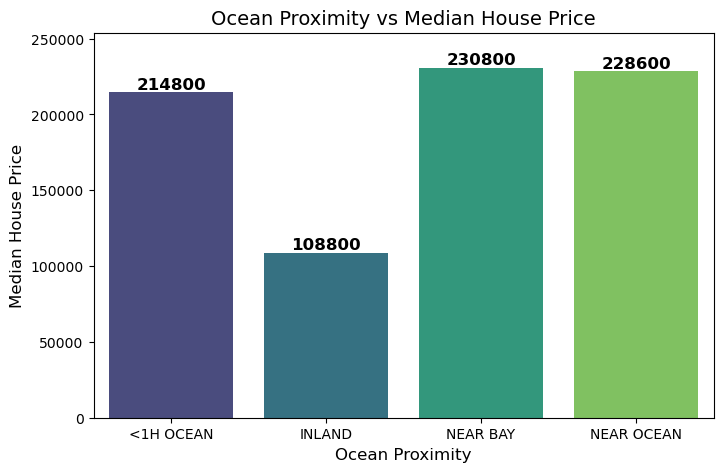

In [14]:
df_agg = df.groupby('ocean_proximity')['median_house_value'].median().reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='ocean_proximity', y='median_house_value', data=df_agg, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Ocean Proximity vs Median House Price', fontsize=14)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.ylabel('Median House Price', fontsize=12)
plt.ylim(0, max(df_agg['median_house_value']) * 1.1)  

plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>Homes categorized as ISLAND have the highest median price, around $350,000. This could be due to the exclusivity of the location and limited land availability, increasing property value.</li>
    <li>Homes in INLAND areas have the lowest median price, approximately $100,000. Factors such as distance from the coast and lower location desirability might contribute to this.</li>
    <li>NEAR BAY and NEAR OCEAN categories have nearly the same median price, which is higher than INLAND or < 1H OCEAN. This suggests that access to the coast or ocean views can significantly increase property value. </li>
    <li>Homes within one hour of the ocean (< 1H OCEAN) are priced lower than those categorized as NEAR BAY or NEAR OCEAN. This could indicate that these properties are still far from the shoreline or lack direct waterfront access.</li>

The visualization implies that there are difference of number of median house value between each categories of ocean proximity. The significance will be tested using Kruskal-Wallis method.

`Hypothesis` :
    
$H_{0}$ : There is no significant difference in the median of number of median house value across the categories of ocean proximity.

$H_{a}$ : At least one category of ocean proximity differs significantly from the others$

`Significance` 
$\alpha=0.05$

`Conclusion` :
- p-value $\leq \alpha$ : Reject $H_{0}$ 
- p-value $> \alpha$ : Failed to Reject $H_{0}$ 

In [15]:
from scipy.stats import kruskal

In [16]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
Name: count, dtype: int64

In [17]:
e=0.01 
N=len(df)
n=round(N/(1+N*(e**2))) 


df1=df.sample(n)

In [18]:
kruskal(df1[df1['ocean_proximity']=='<1H OCEAN']['median_house_value'],
        df1[df1['ocean_proximity']=='INLAND']['median_house_value'],
        df1[df1['ocean_proximity']=='NEAR OCEAN']['median_house_value'],
        df1[df1['ocean_proximity']=='NEAR BAY']['median_house_value'])

KruskalResult(statistic=1831.5584189529952, pvalue=0.0)

<div class="alert alert-block alert-danger">  
<b>Result:</b> reject the null hypothesis (H₀). Since the p-value is less than 0.05, there is a significant difference among at least one category of ocean proximity. This indicates that distances from ocean influences the number of median house value, with INLAND category being the lowest. 
</div>

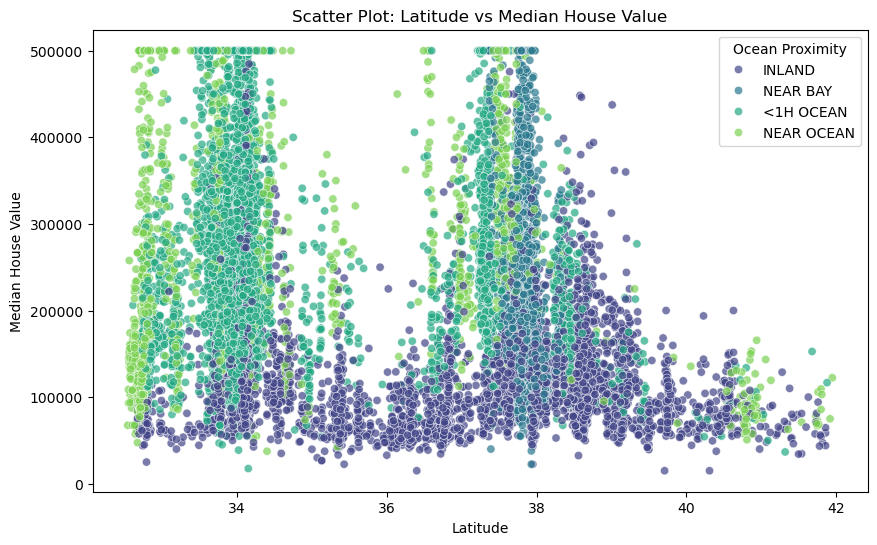

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="latitude", y="median_house_value", hue="ocean_proximity", palette="viridis", alpha=0.7)

plt.title("Scatter Plot: Latitude vs Median House Value")
plt.xlabel("Latitude")
plt.ylabel("Median House Value")
plt.legend(title="Ocean Proximity")

plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>INLAND (Dark Purple): Mostly concentrated in the lower median house value range. Present across various latitudes but dominant in higher latitudes (~35-40). Very few high-value properties.</li>
    <li>NEAR BAY (Blue): More spread out but still clusters around certain latitude ranges. Some houses have higher median values.</li>
    <li>< 1H OCEAN (Cyan): More distributed along multiple latitudes. Higher median house values than INLAND properties. </li>
    <li>NEAR OCEAN (Teal): Similar to < 1H OCEAN but possibly closer to the coast. House values appear relatively high.</li>
    <li>ISLAND (Light Green): Very few data points, but they have some of the highest median house values. Likely exclusive locations, driving prices up.</li>

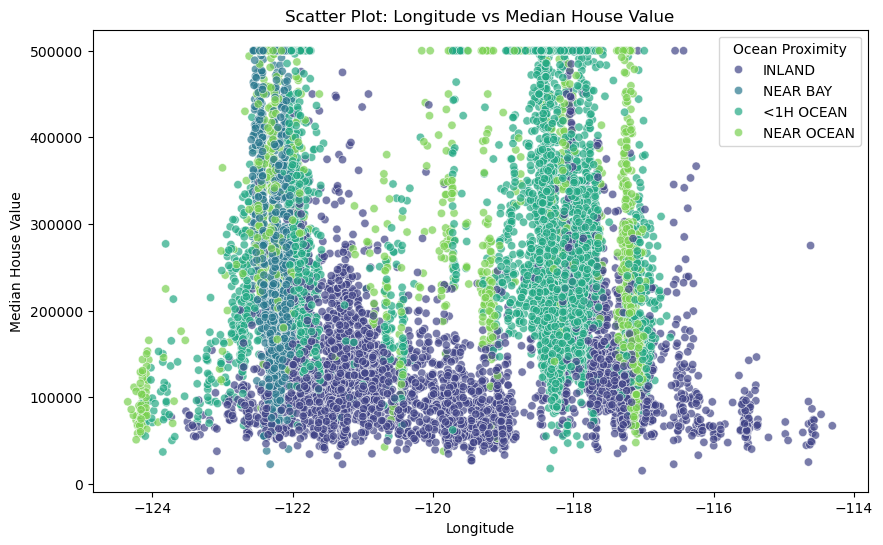

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="longitude", y="median_house_value", hue="ocean_proximity", palette="viridis", alpha=0.7)

plt.title("Scatter Plot: Longitude vs Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Median House Value")
plt.legend(title="Ocean Proximity")

plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>INLAND (Dark Purple): Primarily located around longitudes -124 to -116. Concentrated in lower median house values (<$200,000). Sparse presence in the high-value range.</li>
    <li>NEAR BAY (Blue): Found mostly in higher median house value regions. Clustered around specific longitude ranges.</li>
    <li>< 1H OCEAN (Cyan): More widely distributed across longitudes. Higher median house values compared to inland properties.</li>
    <li>NEAR OCEAN (Teal): Similar to < 1H OCEAN, but likely closer to the coast. Generally associated with higher median house values.</li>
    <li>ISLAND (Light Green): Few data points, located mostly on the leftmost side (~ -124 longitude). Some of the highest house values, suggesting exclusivity.</li>

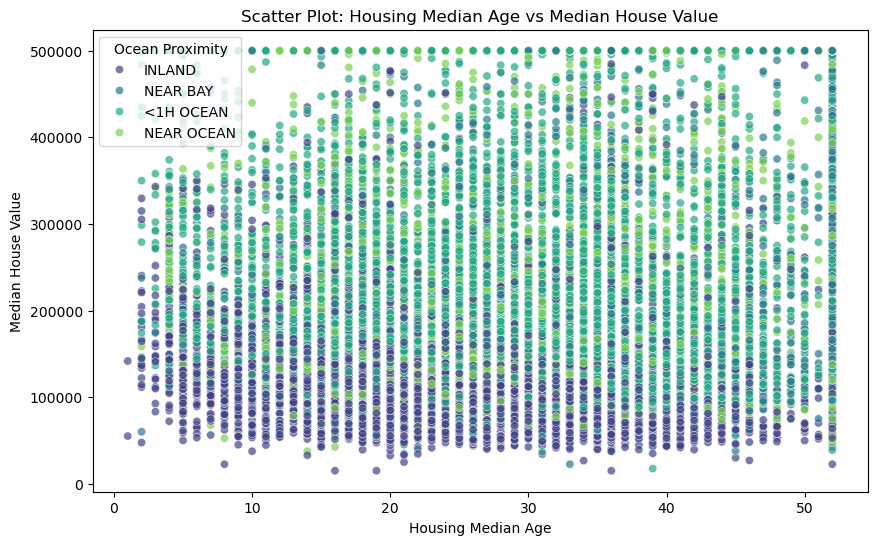

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="housing_median_age", y="median_house_value", hue="ocean_proximity", palette="viridis", alpha=0.7)

plt.title("Scatter Plot: Housing Median Age vs Median House Value")
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value")
plt.legend(title="Ocean Proximity")

plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>INLAND (Dark Purple): Spread across all housing median ages (0 to 50+ years). Generally has lower house values, with few exceeding $300,000. Denser in the lower price range (<$200,000).</li>
    <li>NEAR BAY (Blue): Distributed across all housing ages, but slightly more concentrated in newer houses. More expensive than inland properties, with values exceeding $300,000.</li>
    <li>< 1H OCEAN (Cyan): Well-distributed across housing ages. Higher median house values, especially for homes aged 10-30 years.</li>
    <li>NEAR OCEAN (Teal): Presence is noticeable across all housing ages. Higher median house values, forming an upper bound near the $500,000 limit.</li>
    <li>ISLAND (Light Green): Sparse points, suggesting a limited number of properties. Mostly located in the upper house value range.</li>

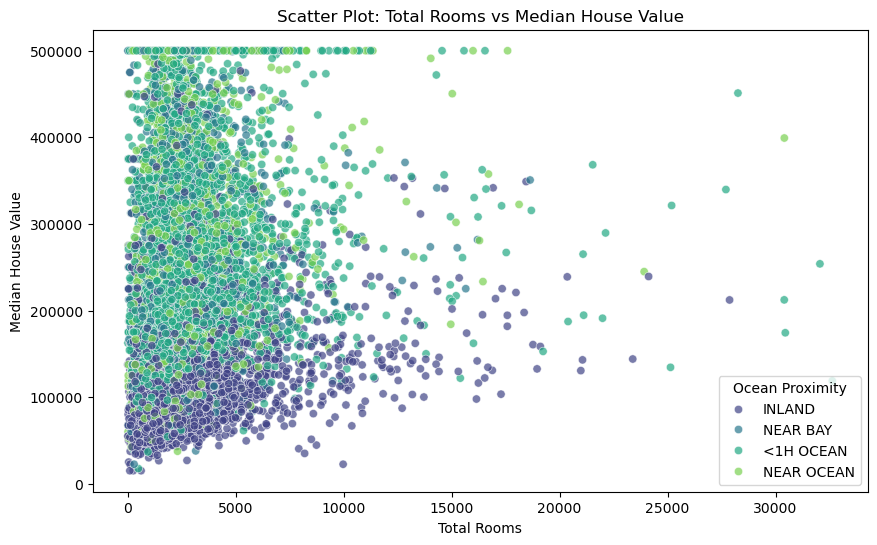

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="total_rooms", y="median_house_value", hue="ocean_proximity", palette="viridis", alpha=0.7)

plt.title("Scatter Plot: Total Rooms vs Median House Value")
plt.xlabel("Total Rooms")
plt.ylabel("Median House Value")
plt.legend(title="Ocean Proximity")

plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>INLAND (Dark Purple): Densely clustered at lower house values (<$200,000). Found mostly in smaller to medium-sized homes.</li>
    <li>NEAR BAY (Blue) & < 1H OCEAN (Cyan): More widely distributed across all house values. Many reach the $500,000 cap, suggesting higher demand.</li>
    <li>NEAR OCEAN (Teal) & ISLAND (Light Green): More properties near or at the $500,000 cap. Generally have larger homes with higher values.</li>

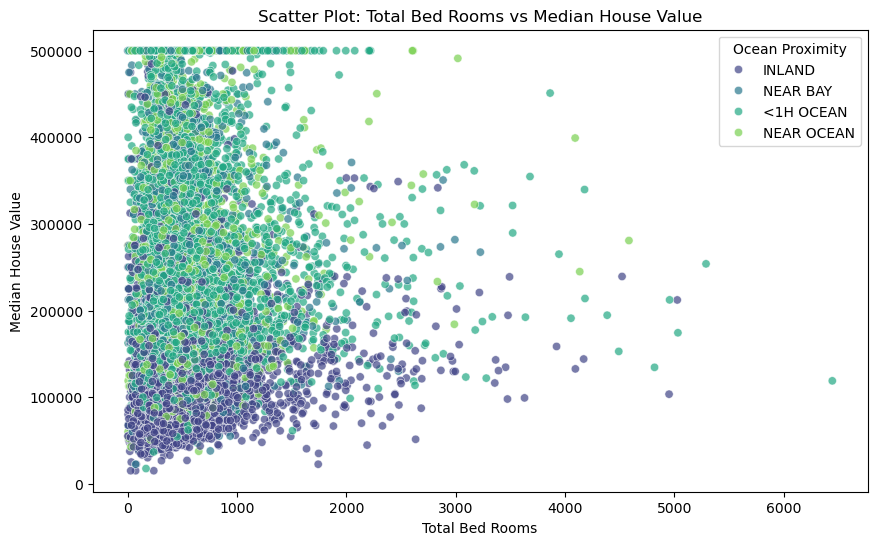

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="total_bedrooms", y="median_house_value", hue="ocean_proximity", palette="viridis", alpha=0.7)

plt.title("Scatter Plot: Total Bed Rooms vs Median House Value")
plt.xlabel("Total Bed Rooms")
plt.ylabel("Median House Value")
plt.legend(title="Ocean Proximity")

plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>INLAND (Dark Purple): Concentrated at lower house values (<$200,000). Common in houses with fewer bedrooms.</li>
    <li>NEAR BAY (Blue) & < 1H OCEAN (Cyan): Spread across different house values. Many properties reach the $500,000 cap.</li>
    <li>NEAR OCEAN (Teal) & ISLAND (Light Green): More common near the upper price range. Many high-value properties even with fewer bedrooms.</li>

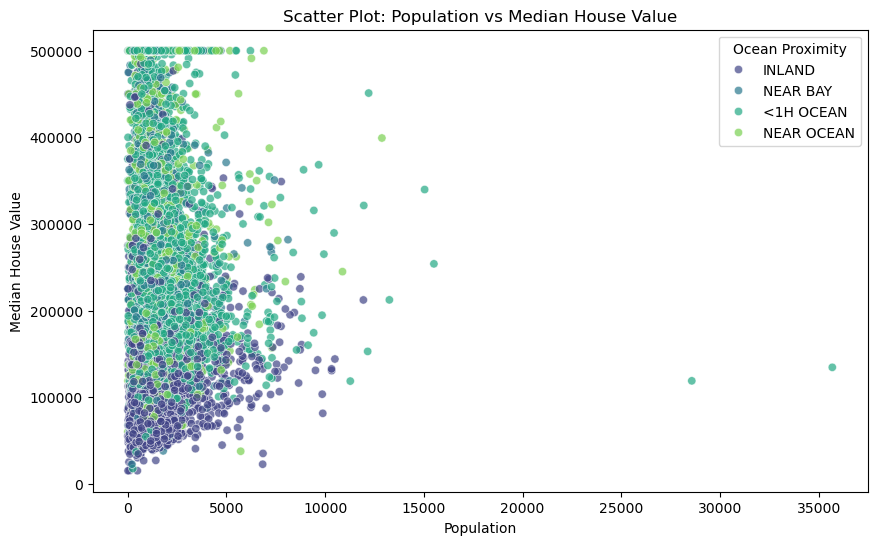

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="population", y="median_house_value", hue="ocean_proximity", palette="viridis", alpha=0.7)

plt.title("Scatter Plot: Population vs Median House Value")
plt.xlabel("Population")
plt.ylabel("Median House Value")
plt.legend(title="Ocean Proximity")

plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>INLAND (Dark Purple): More common in lower house values (<$200,000). Typically found in areas with smaller populations.</li>
    <li>NEAR BAY (Blue) & < 1H OCEAN (Cyan): Found across all price ranges. Several properties reach the $500,000 cap.</li>
    <li>NEAR OCEAN (Teal) & ISLAND (Light Green): Appear more frequently in high-value homes. Some are in locations with larger populations.</li>

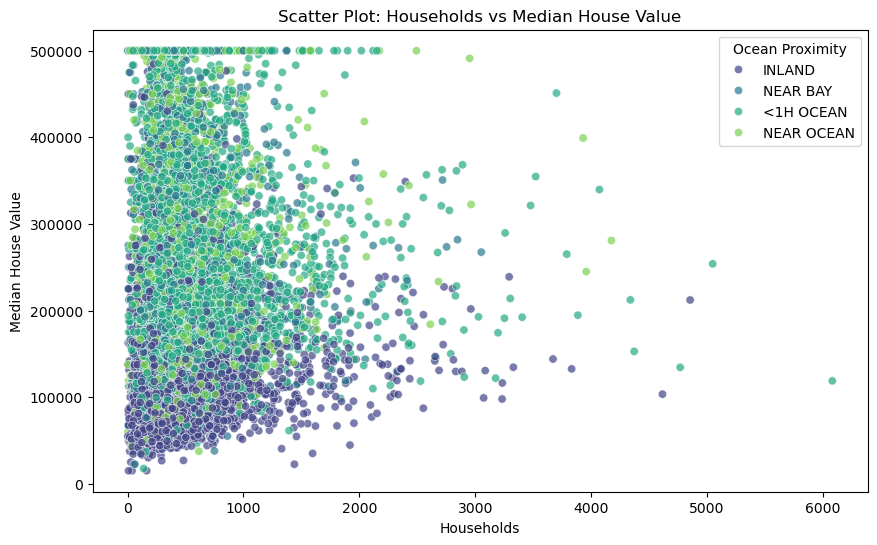

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="households", y="median_house_value", hue="ocean_proximity", palette="viridis", alpha=0.7)

plt.title("Scatter Plot: Households vs Median House Value")
plt.xlabel("Households")
plt.ylabel("Median House Value")
plt.legend(title="Ocean Proximity")

plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>INLAND (Dark Purple): More common in lower house values (<$200,000). Mostly found in areas with smaller numbers of households.</li>
    <li>NEAR BAY (Blue) & < 1H OCEAN (Cyan): Found across all price ranges. Many properties hit the $500,000 cap.</li>
    <li>NEAR OCEAN (Teal) & ISLAND (Light Green): Appear more frequently in high-value homes. Some are in locations with larger numbers of households.</li>

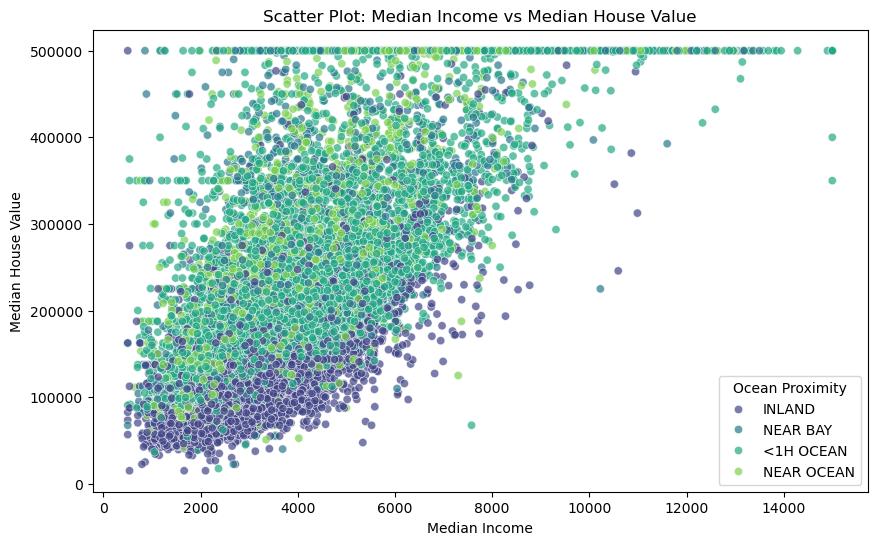

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="median_income", y="median_house_value", hue="ocean_proximity", palette="viridis", alpha=0.7)

plt.title("Scatter Plot: Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend(title="Ocean Proximity")

plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li> INLAND (Dark Purple): Found mostly in low-income areas (below $6,000 median income). House values are generally low but increase as income rises. Some inland properties hit the $500,000 cap, though less frequently.</li>
    <li>NEAR BAY (Blue): More spread out across income levels. Found in both mid-range and high-income areas. A significant portion reaches the $500,000 cap.</li>
    <li>< 1H OCEAN (Cyan): Mostly concentrated in the mid-to-high income range. Many points cluster near the $500,000 limit, suggesting expensive coastal properties. The higher the income, the more likely the property is located closer to the ocean.</li>
    <li>NEAR OCEAN (Teal): Similar to < 1H OCEAN, but slightly more dispersed. Mostly located in mid-to-high-income areas. Frequently reaches the $500,000 cap, indicating high-value coastal properties.</li>
    <li>ISLAND (Light Green): The rarest category. Almost all island properties reach the $500,000 cap, meaning they are extremely valuable. Found in high-income locations, suggesting exclusive real estate.</li>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Conclusion</div>

>1. The dataset reveals that house distributions are concentrated in specific geographic areas, with older homes dominating, skewed distributions for rooms, bedrooms, population, and income, and a price cap at $500,000 for median house values.
>2. All features significantly deviate from normality, making non-parametric methods like tree-based and gradient boosting models more suitable than parametric approaches.
>3. Strong correlations exist between total rooms and bedrooms, median income and house value, and geographic location, while population and households show no significant impact on house prices.
>4. Higher median income strongly correlates with higher house prices, with geographic hotspots like coastal areas driving premium pricing, while outliers in rooms and population do not consistently influence prices.
>5.  Multicollinearity is present, with strong correlations between total rooms, bedrooms, households, and population, while median income moderately influences house prices.
>6. Geographic coordinates show a strong negative correlation, while older homes correlate with fewer rooms and lower incomes, though location has minimal direct impact on house prices.
>7. Extreme outliers in total_rooms, total_bedrooms, and households represent unusually large homes or multi-family properties, often in wealthy areas, driving up prices, while outliers in population indicate densely populated urban centers with high demand and varying prices, and extreme median_income outliers reflect affluent neighborhoods where higher incomes significantly boost house prices.
>8. INLAND areas have lower incomes and house values, NEAR BAY and <1H OCEAN regions span various income levels with many high-value properties, NEAR OCEAN areas are more dispersed but still feature expensive homes, while ISLAND properties are the rarest and almost always reach the $500,000 cap.

<div style="padding:10px; 
            color:#ffff;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            background-color: #213555;
            overflow:hidden;
            font-weight:500">3. Data Preprocessing</div>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Handling Missing Value</div>

In [27]:
def missing_values_info(df):
    missing_count = df.isna().sum()
    missing_percentage = (missing_count / len(df)) * 100
    return pd.DataFrame({
        'Features': df.columns,
        'Missing Value': missing_count.values,
        'Missing Value Percentage': missing_percentage.values
    }).reset_index(drop=True)

missing_values_info(df)

Features  Missing Value  Missing Value Percentage
0           longitude              0                  0.000000
1            latitude              0                  0.000000
2  housing_median_age              0                  0.000000
3         total_rooms              0                  0.000000
4      total_bedrooms            137                  0.948359
5          population              0                  0.000000
6          households              0                  0.000000
7       median_income              0                  0.000000
8     ocean_proximity              0                  0.000000
9  median_house_value              0                  0.000000

In [28]:
high_corr

Feature 1           Feature 2  Spearman Correlation
21     total_rooms      total_bedrooms              0.916249
22     total_rooms          population              0.815582
23     total_rooms          households              0.907105
26  total_bedrooms          population              0.870014
27  total_bedrooms          households              0.975877
30      population          households              0.902576
35   median_income  median_house_value              0.680296

<div class="alert alert-block alert-danger">  
<b>Result:</b> The table presents the count of missing values for all variables, highlighting that "total bedrooms" has 137 missing entries. To address this issue, we can fill the missing values with the median. Our analysis found that "households" is the most correlated variable with "total bedrooms." Based on this, we can group the records into "blocks" of 14 units using "households" and then replace the missing values with the median of their respective group. 
</div>

In [29]:
df['households_bin'] = pd.cut(df['households'], bins=14, labels=range(1, 15)).astype(int)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2240\1293140293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['households_bin'] = pd.cut(df['households'], bins=14, labels=range(1, 15)).astype(int)


In [30]:
median_by_bin = df.groupby('households_bin')['total_bedrooms'].transform('median')

df['total_bedrooms'].fillna(median_by_bin, inplace=True)

df.drop(columns=['households_bin'], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2240\2030921060.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_by_bin, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2240\2030921060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_bedrooms'].fillna(median_by_bin, inplace=True)
C:\Us

In [31]:
missing_values_info(df)

Features  Missing Value  Missing Value Percentage
0           longitude              0                       0.0
1            latitude              0                       0.0
2  housing_median_age              0                       0.0
3         total_rooms              0                       0.0
4      total_bedrooms              0                       0.0
5          population              0                       0.0
6          households              0                       0.0
7       median_income              0                       0.0
8     ocean_proximity              0                       0.0
9  median_house_value              0                       0.0

<div class="alert alert-block alert-success">  
<b>Result:</b> Missing values have been filled. There is no further handling for missing values.  
</div>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Handling Duplicated Data</div>

In [32]:
print("Number of duplicated data:", df.duplicated().sum())

Number of duplicated data: 0


<div class="alert alert-block alert-success">  
<b>Result:</b> There is no duplicated data, therefore there is no further handling for duplicated data.  
</div>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Handling Outliers</div>

In [33]:
def calculate_whiskers_and_outliers(column):
    q1 = df[column].quantile(0.25) 
    q3 = df[column].quantile(0.75)  
    iqr = q3 - q1  
    lower_whisker = q1 - 1.5 * iqr  
    upper_whisker = q3 + 1.5 * iqr  
    
    low_outliers = df[df[column] < lower_whisker][column]
    high_outliers = df[df[column] > upper_whisker][column]
    
    num_low_outliers = len(low_outliers)
    num_high_outliers = len(high_outliers)
    total_outliers = num_low_outliers + num_high_outliers
    
    return q1, q3, iqr, lower_whisker, upper_whisker, num_low_outliers, num_high_outliers, total_outliers

whisker_df = pd.DataFrame(columns=[
    'Feature', 'Q1', 'Q3', 'IQR', 'Lower Whisker', 'Upper Whisker', 
    'Total of Low Outlier', 'Total of High Outlier', 'Total Outlier'
])

for col in df.select_dtypes(include=['number']).columns:
    q1, q3, iqr, lower_whisker, upper_whisker, num_low_outliers, num_high_outliers, total_outliers = calculate_whiskers_and_outliers(col)
    
    new_row = pd.DataFrame({
        'Feature': [col],
        'Q1': [q1],
        'Q3': [q3],
        'IQR': [iqr],
        'Lower Whisker': [lower_whisker],
        'Upper Whisker': [upper_whisker],
        'Total of Low Outlier': [num_low_outliers],
        'Total of High Outlier': [num_high_outliers],
        'Total Outlier': [total_outliers]
    })
    
    whisker_df = pd.concat([whisker_df, new_row], ignore_index=True)

whisker_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2240\1773696892.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  whisker_df = pd.concat([whisker_df, new_row], ignore_index=True)


Feature         Q1         Q3        IQR  Lower Whisker  \
0           longitude    -121.80    -118.00       3.80        -127.50   
1            latitude      33.93      37.71       3.78          28.26   
2  housing_median_age      18.00      37.00      19.00         -10.50   
3         total_rooms    1451.00    3148.00    1697.00       -1094.50   
4      total_bedrooms     296.00     646.00     350.00        -229.00   
5          population     784.00    1724.00     940.00        -626.00   
6          households     279.00     604.00     325.00        -208.50   
7       median_income    2570.40    4736.10    2165.70        -678.15   
8  median_house_value  119600.00  263800.00  144200.00      -96700.00   

   Upper Whisker Total of Low Outlier Total of High Outlier Total Outlier  
0        -112.30                    0                     0             0  
1          43.38                    0                     0             0  
2          65.50                    0                     0             0  
3        5693.50                    0                   900           900  
4        1171.00                    0                   885           885  
5        3134.00                    0                   827           827  
6        1091.50                    0                   842           842  
7        7984.65                    0                   482           482  
8      480100.00                    0                   757           757

In [34]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  14446.000000  14446.000000        14446.000000  14446.000000   
mean    -119.566807     35.630404           28.617057   2640.285339   
std        2.006679      2.140106           12.596064   2191.704433   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1451.000000   
50%     -118.490000     34.260000           29.000000   2125.000000   
75%     -118.000000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income  \
count    14446.000000  14446.000000  14446.000000   14446.000000   
mean       538.184134   1425.249273    499.536273    3866.826333   
std        422.463620   1149.626251    383.114853    1891.240000   
min          1.000000      3.000000      1.000000     499.900000   
25%        296.000000    784.000000    279.000000    2570.400000   
50%        435.000000   1165.000000    410.000000    3539.100000   
75%        646.000000   1724.000000    604.000000    4736.100000   
max       6445.000000  35682.000000   6082.000000   15000.100000   

       median_house_value  
count        14446.000000  
mean        206804.650076  
std         115358.542671  
min          14999.000000  
25%         119600.000000  
50%         179950.000000  
75%         263800.000000  
max         500001.000000

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>Longitude represents the east-west location in California. Coastal areas (e.g., near San Francisco or Los Angeles) tend to have higher house prices. Since there are no outliers, the data suggests that the geographic spread of houses is consistent with California's housing market, where coastal areas are more expensive.</li>
    <li>Latitude represents the north-south location in California. Areas closer to the coast (e.g., Southern California or the Bay Area) tend to have higher house prices. The absence of outliers suggests that the data aligns with California's housing market, where coastal areas are more expensive.</li>
    <li>Older homes might be cheaper if they are in less desirable areas or more expensive if they are in historic or premium locations. The absence of outliers suggests that the age of homes is consistent with typical housing market trends in California.</li>
    <li>Houses with a very high number of rooms (outliers) are likely large properties, such as mansions or multi-family homes. These outliers make sense in California's housing market, where luxury properties in affluent areas (e.g., Beverly Hills, Silicon Valley) can have significantly more rooms and higher prices.</li>
    <li>Houses with a very high number of bedrooms (outliers) are likely large properties, such as luxury homes or apartment complexes. These outliers align with California's housing market, where large properties in affluent areas command higher prices.</li>
    <li>Areas with very high population (outliers) are likely urban centers (e.g., Los Angeles, San Francisco). These outliers make sense, as urban areas in California tend to have higher house prices due to demand and limited space.</li>
    <li>Areas with a very high number of households (outliers) are likely densely populated neighborhoods or apartment complexes. These outliers align with California's housing market, where densely populated urban areas tend to have higher house prices.</li>
    <li>Areas with very high median income (outliers) are likely affluent neighborhoods (e.g., Silicon Valley, Beverly Hills). These outliers make sense, as higher income areas in California tend to have significantly higher house prices.</li>
    <li>Houses with very high values (outliers) are likely luxury properties in premium locations (e.g., coastal areas, affluent neighborhoods). These outliers align with California's housing market, where luxury properties can reach extremely high prices. However, the value is capped at 500000 as can be seen from histogram of median_house_value. It suggests that the true values for these houses may be higher, but the dataset does not reflect this accurately. This artificial capping can distort the model's understanding of the true distribution of house prices. The capped values do not represent the actual market prices, leading to a biased dataset. This can mislead the model into learning incorrect patterns, especially if the capped values form a large cluster.</li>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Justification to Remove Outliers from Label median_house_value </div>

>1. Skewed Distribution: Outliers, especially when capped, can create a skewed distribution in the target variable. Many machine learning algorithms assume that the data is normally distributed or at least not heavily skewed. A skewed target variable can degrade the performance of these models.
>2. Impact on Loss Function: In regression tasks, the loss function (e.g., Mean Squared Error) is sensitive to outliers. Large errors from outliers can dominate the loss, causing the model to focus excessively on minimizing errors for these points at the expense of overall performance.
>3. Overfitting to Outliers: Models might overfit to the outliers, especially if they are numerous. This overfitting can reduce the model's ability to generalize to new, unseen data where such extreme values are less likely to occur.
>4. Real-World Applicability: In real-world scenarios, the majority of house prices do not cluster at an arbitrary cap. A model trained on such data might perform poorly when predicting prices for houses that are not near the cap.
>5. Better Decision Making: Stakeholders relying on the model's predictions for decision-making (e.g., real estate investors, policymakers) will benefit from a model that reflects more typical market conditions rather than being influenced by artificial caps.

In [35]:
q1 = np.percentile(df['median_house_value'], 25)
q3 = np.percentile(df['median_house_value'], 75)
iqr = q3-q1
tresh = q3 + 1.5*iqr
tresh

480100.0

In [36]:
df = df[df['median_house_value'] < tresh]

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Feature Engineering</div>

>1. Capturing More Complexity: To better represent the diverse factors influencing house prices, new features like ocean_proximity and income_category are added to capture location and economic impacts.
>2. Improving Model Accuracy: By including features such as house_size_category and age_category, the model gains additional information to make more precise predictions about house prices.
>3. Handling Non-Linear Relationships: To address non-linear relationships (e.g., older houses being more expensive in some cases), categorical features like age_category are introduced.
>4. Better Feature Engineering: Transforming raw data into meaningful categories (e.g., "High", "Medium", "Low") or creating interaction features improves the model's ability to interpret and use the data effectively.
>5. Addressing Data Sparsity: Adding more features helps fill gaps in sparse data, allowing the model to learn patterns even when some features have limited data points.
>6. Enhancing Interpretability: New features like is_luxury and price_category provide deeper insights into market segments and what drives house prices.
>7. Handling Multicollinearity: By accounting for correlations between features (e.g., income_category and price_category), the model reduces the impact of multicollinearity on predictions.
>8. Supporting Advanced Models: Advanced algorithms like random forests and gradient boosting benefit from more features, as they can automatically identify important patterns and interactions.

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Numerical Columns</div>

In [37]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df['income_per_household'] = df['median_income'] / df['households']
df['price_per_room'] = df['median_house_value'] / df['total_rooms']
df['rooms_per_person'] = df['total_rooms'] / df['population']
df['bedrooms_per_person'] = df['total_bedrooms'] / df['population']

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Data Understanding of New Numerical Columns</div>

   | Features                | Description                                                         |
   |-------------------------|---------------------------------------------------------------------|
   | Rooms per Household     | Average number of rooms available per household in a given area.    |
   | Bedrooms per Room       | Average number of bed rooms available per household in a given area.|
   | Population per Household| Average number of people living in each household.                  |
   | Income per Household    | Average household income in a given area.                           |
   | Price per Room          | Estimate of the cost per room.                                      |
   | Rooms per Person        | Average number of rooms available per individual in a household.    |
   | Bedrooms per Person     | Average number of bed rooms available per individual in a household.|

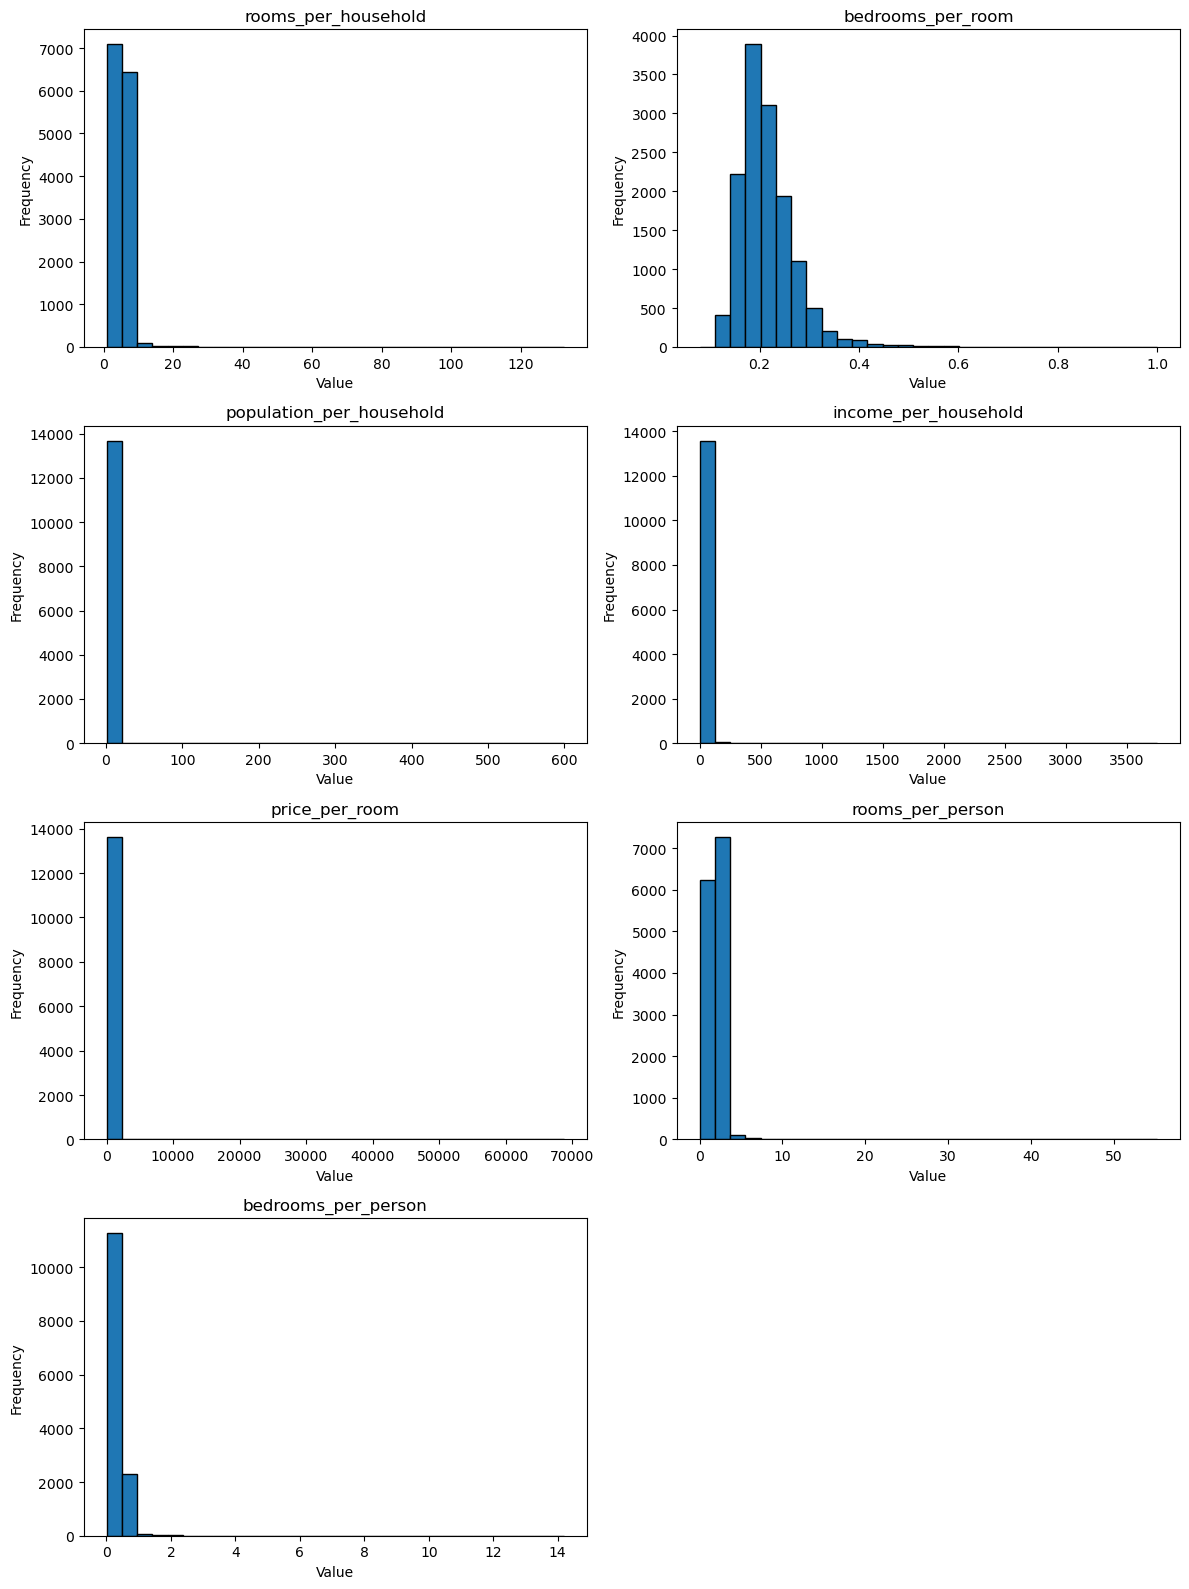

In [38]:
numerical_cols = [
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 
    'income_per_household', 'price_per_room', 'rooms_per_person', 'bedrooms_per_person'
]

cols_per_row = 2
num_cols = len(numerical_cols)
num_rows = -(-num_cols // cols_per_row)  

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>Rooms per Household: The distribution is heavily skewed to the right, with most houses having a low number of rooms per household. Houses with more rooms per household may be larger, potentially correlating with higher house values.</li>
    <li>Bedrooms per Room: Most properties have a low bedroom-to-room ratio, indicating a preference for houses with more living space per room. A higher bedroom-to-room ratio might be seen in lower-value properties where space is optimized for more bedrooms.</li>
    <li>Population per Household: The majority of households have a relatively low population, but some outliers suggest overcrowding in certain areas. Overcrowded households are often in lower-value areas with high population density.</li>
    <li>Income per Household: Most households fall within a lower income range, with few high-income outliers Higher-income households are likely to be in areas with more expensive real estate.</li>
    <li>Price per Room: The data is highly skewed, indicating that while most homes have lower price-per-room values, some have extremely high values. Higher price per room is expected in premium real estate locations.</li>
    <li>Rooms per Person: Most households have few rooms per person, with fewer instances of spacious living. Areas with more rooms per person may indicate wealthier neighborhoods with larger homes.</li>
    <li>Bedrooms per Person: The majority of cases show a low number of bedrooms per person, with a small subset having more bedrooms per person. A higher bedroom-per-person ratio could indicate areas with more affordable housing or family-oriented neighborhoods.</li>

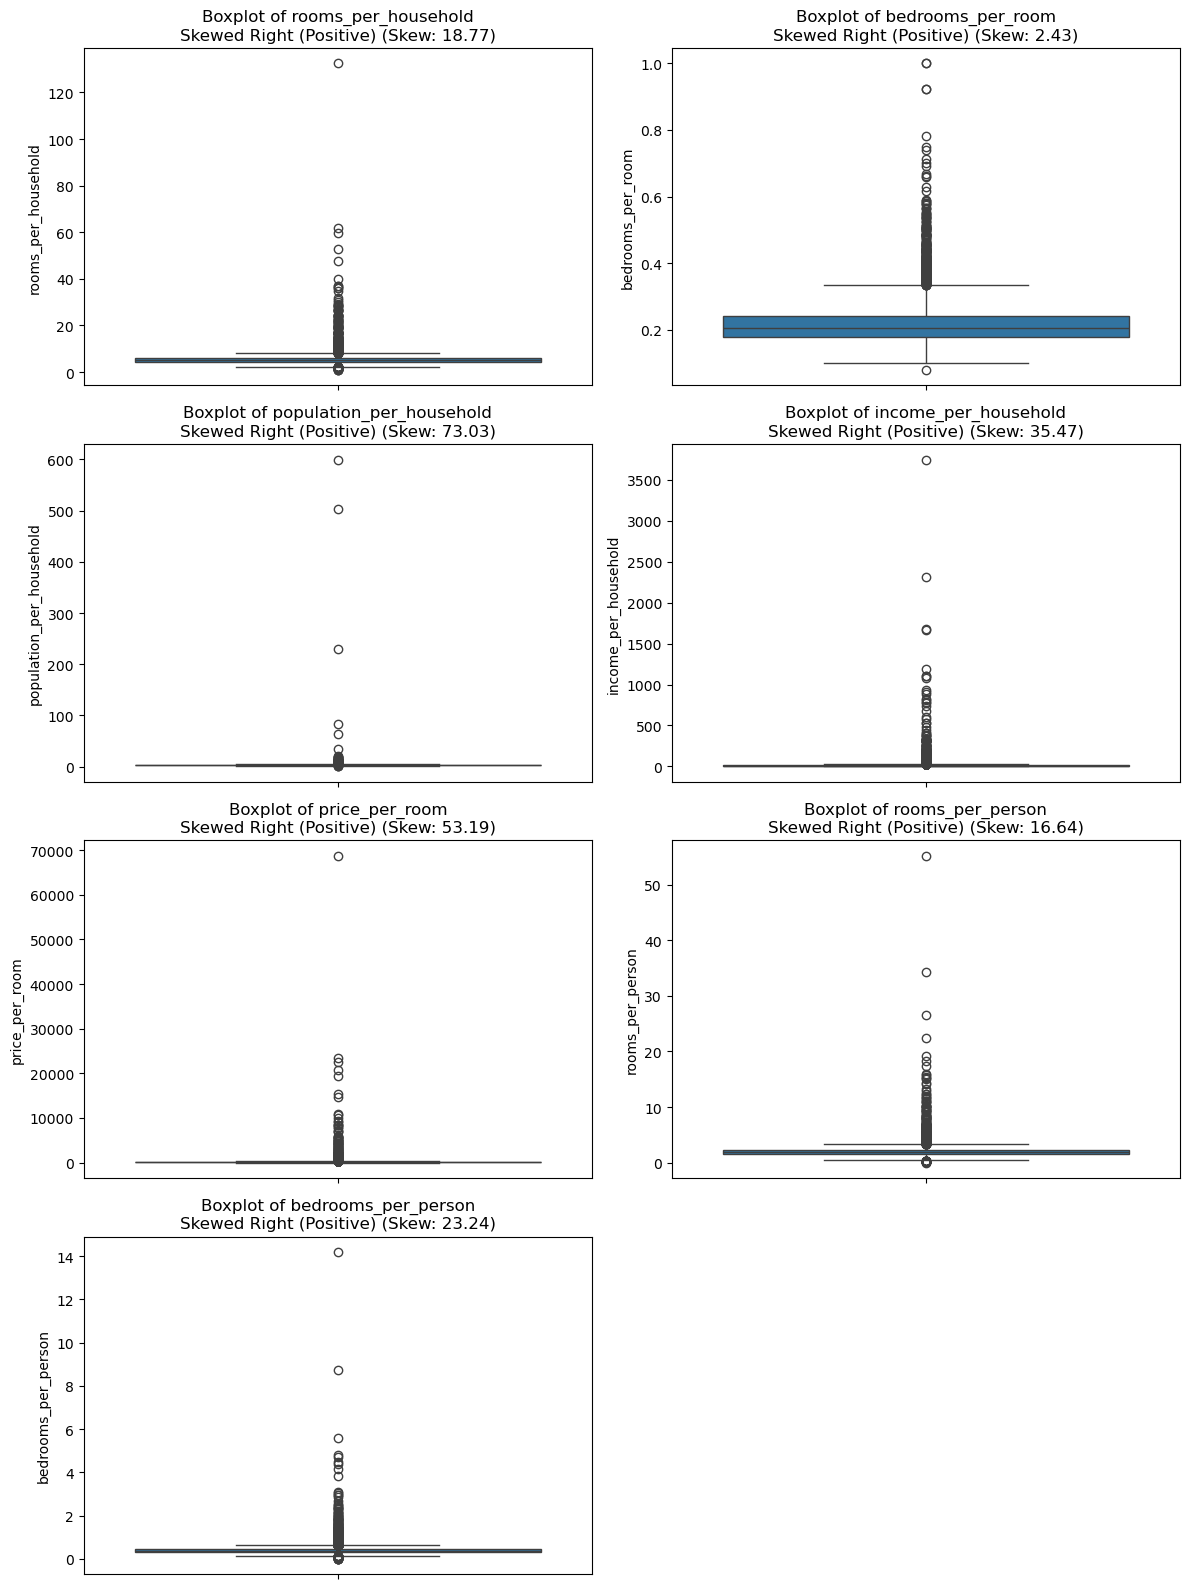

In [39]:
numerical_cols = [
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 
    'income_per_household', 'price_per_room', 'rooms_per_person', 'bedrooms_per_person'
]

n_cols = 2
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])

    skewness = df[col].skew()

    if skewness > 0:
        skew_text = 'Skewed Right (Positive)'
    elif skewness < 0:
        skew_text = 'Skewed Left (Negative)'
    else:
        skew_text = 'Symmetric'

    axes[i].set_title(f'Boxplot of {col}\n{skew_text} (Skew: {skewness:.2f})')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>Right-Skewed Distributions: All features exhibit right-skewed distributions, meaning most values are concentrated on the lower end, with a few extreme outliers on the higher end.</li>
    <li>Rooms per Household & Population per Household: The median number of rooms per household is relatively low, but there are significant outliers where some households have extremely high room counts (>100). The population per household follows a similar pattern, with a few cases where a household accommodates more than 600 people, indicating potential data entry errors or uncommon housing arrangements.</li>
    <li>Bedrooms per Room & Bedrooms per Person: Most values of bedrooms_per_room are clustered below 0.5, but a few outliers suggest areas with a high proportion of bedrooms, which could indicate rental-heavy locations or overcrowded housing. The bedrooms_per_person feature also has extreme outliers where a single person has multiple bedrooms, suggesting luxury housing segments.</li>
    <li>Income per Household & Price per Room: income_per_household is highly skewed, with a few extreme values exceeding $14,000, potentially indicating wealthier neighborhoods. price_per_room has substantial outliers above $60,000 per room, likely representing high-end housing markets in California.</li>
    <li>Rooms per Person: Most values are concentrated at lower levels, with a few extreme cases where an individual has more than 50 rooms. This suggests either very large properties or potential data issues.</li>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Handling Outliers of New Numerical Features</div>

In [40]:
def calculate_whiskers_and_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    num_low_outliers = (df[column] < lower_whisker).sum()
    num_high_outliers = (df[column] > upper_whisker).sum()
    total_outliers = num_low_outliers + num_high_outliers

    return q1, q3, iqr, lower_whisker, upper_whisker, num_low_outliers, num_high_outliers, total_outliers

selected_columns = [
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 
    'income_per_household', 'price_per_room', 'rooms_per_person', 'bedrooms_per_person'
]

whisker_df = pd.DataFrame(columns=[
    'Feature', 'Q1', 'Q3', 'IQR', 'Lower Whisker', 'Upper Whisker', 
    'Total of Low Outlier', 'Total of High Outlier', 'Total Outlier'
])

for col in selected_columns:
    if col in df.columns:
        q1, q3, iqr, lower_whisker, upper_whisker, num_low_outliers, num_high_outliers, total_outliers = calculate_whiskers_and_outliers(df, col)

        new_row = pd.DataFrame({
            'Feature': [col],
            'Q1': [q1],
            'Q3': [q3],
            'IQR': [iqr],
            'Lower Whisker': [lower_whisker],
            'Upper Whisker': [upper_whisker],
            'Total of Low Outlier': [num_low_outliers],
            'Total of High Outlier': [num_high_outliers],
            'Total Outlier': [total_outliers]
        })

        whisker_df = pd.concat([whisker_df, new_row], ignore_index=True)

whisker_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2240\1423878815.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  whisker_df = pd.concat([whisker_df, new_row], ignore_index=True)


Feature         Q1          Q3        IQR  Lower Whisker  \
0       rooms_per_household   4.424901    5.958525   1.533624       2.124465   
1         bedrooms_per_room   0.177957    0.240673   0.062716       0.083883   
2  population_per_household   2.444444    3.304397   0.859953       1.154515   
3      income_per_household   4.934497   13.409341   8.474844      -7.777768   
4            price_per_room  48.299573  131.823840  83.524268     -76.986829   
5          rooms_per_person   1.498101    2.242933   0.744832       0.380854   
6       bedrooms_per_person   0.313835    0.440335   0.126500       0.124085   

   Upper Whisker Total of Low Outlier Total of High Outlier Total Outlier  
0       8.258962                   42                   291           333  
1       0.334747                    1                   418           419  
2       4.594326                    3                   452           455  
3      26.121606                    0                   952           952  
4     257.110242                    0                   899           899  
5       3.360180                   27                   272           299  
6       0.630085                   37                   630           667

In [41]:
selected_columns = [
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 
    'income_per_household', 'price_per_room', 'rooms_per_person', 'bedrooms_per_person'
]

df[selected_columns].describe()

rooms_per_household  bedrooms_per_room  population_per_household  \
count         13688.000000       13688.000000              13688.000000   
mean              5.357435           0.215224                  3.066421   
std               2.300761           0.057742                  7.045018   
min               0.846154           0.079076                  0.750000   
25%               4.424901           0.177957                  2.444444   
50%               5.181950           0.204443                  2.836716   
75%               5.958525           0.240673                  3.304397   
max             132.533333           1.000000                599.714286   

       income_per_household  price_per_room  rooms_per_person  \
count          13688.000000    13688.000000      13688.000000   
mean              14.123266      146.935120          1.935484   
std               56.087247      805.605173          1.049273   
min                0.379596        2.255639          0.008576   
25%                4.934497       48.299573          1.498101   
50%                8.142238       80.660582          1.910467   
75%               13.409341      131.823840          2.242933   
max             3750.025000    68750.000000         55.222222   

       bedrooms_per_person  
count         13688.000000  
mean              0.399762  
std               0.233676  
min               0.001906  
25%               0.313835  
50%               0.371082  
75%               0.440335  
max              14.194444

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>rooms_per_household: The max value is significantly higher than the upper whisker, indicating the presence of high outliers. These outliers might represent households with an unusually high number of rooms, which could be acceptable if they correspond to large properties, but they might skew predictive models.</li>
    <li>bedrooms_per_room: The min and max values are 0.079076 and 1.000000. The max value is well above the upper whisker, indicating high outliers. These could be properties with a very high proportion of bedrooms relative to rooms, which might be acceptable if they represent specific types of housing like dormitories.</li>
    <li>population_per_household: The max value is extremely high compared to the upper whisker, indicating significant high outliers. These could represent data errors or very large households, which are likely not acceptable for accurate predictions.</li>
    <li>income_per_household: The max value is far beyond the upper whisker, indicating extreme high outliers. These could be very high-income households, which might be acceptable if they represent actual data points, but they could disproportionately influence the model.</li>
    <li>price_per_room: The max value is significantly higher than the upper whisker, indicating high outliers. These could represent luxury properties or data errors, which might not be acceptable for a general predictive model.</li>
    <li>rooms_per_person: The max value is much higher than the upper whisker, indicating high outliers. These could be data errors or properties with very few occupants, which might not be acceptable.</li>
    <li>bedrooms_per_person:  The max value is significantly higher than the upper whisker, indicating high outliers. These could represent data errors or properties with very few occupants per bedroom, which might not be acceptable.</li>

In [42]:
whiskers = {
    'rooms_per_household': (2.059769, 8.440329),
    'bedrooms_per_room': (0.079867, 0.335025),
    'population_per_household': (1.147406, 4.560277),
    'income_per_household': (-8.516333, 27.629386),
    'price_per_room': (-85.000704, 274.845958),
    'rooms_per_person': (0.372505, 3.449184),
    'bedrooms_per_person': (0.124789, 0.634712)
}

def cap_outliers(df, whiskers):
    for feature, (lower_whisker, upper_whisker) in whiskers.items():
        df[feature] = np.where(df[feature] < lower_whisker, lower_whisker, df[feature])
        df[feature] = np.where(df[feature] > upper_whisker, upper_whisker, df[feature])
    return df

df_capped = cap_outliers(df, whiskers)

selected_columns = [
    'rooms_per_household',
    'bedrooms_per_room',
    'population_per_household',
    'income_per_household',
    'price_per_room',
    'rooms_per_person',
    'bedrooms_per_person'
]

df_capped_selected = df_capped[selected_columns]
df_capped_selected.describe()

rooms_per_household  bedrooms_per_room  population_per_household  \
count         13688.000000       13688.000000              13688.000000   
mean              5.238218           0.212846                  2.918658   
std               1.190014           0.048107                  0.690333   
min               2.059769           0.079867                  1.147406   
25%               4.424901           0.177957                  2.444444   
50%               5.181950           0.204443                  2.836716   
75%               5.958525           0.240673                  3.304397   
max               8.440329           0.335025                  4.560277   

       income_per_household  price_per_room  rooms_per_person  \
count          13688.000000    13688.000000      13688.000000   
mean              10.221823      100.222197          1.883346   
std                7.045662       69.345372          0.578391   
min                0.379596        2.255639          0.372505   
25%                4.934497       48.299573          1.498101   
50%                8.142238       80.660582          1.910467   
75%               13.409341      131.823840          2.242933   
max               27.629386      274.845958          3.449184   

       bedrooms_per_person  
count         13688.000000  
mean              0.384958  
std               0.104747  
min               0.124789  
25%               0.313835  
50%               0.371082  
75%               0.440335  
max               0.634712

In [43]:
def calculate_whiskers_and_outliers(column):
    q1 = df[column].quantile(0.25) 
    q3 = df[column].quantile(0.75)  
    iqr = q3 - q1  
    lower_whisker = q1 - 1.5 * iqr  
    upper_whisker = q3 + 1.5 * iqr  
    
    low_outliers = df[df[column] < lower_whisker][column]
    high_outliers = df[df[column] > upper_whisker][column]
    
    num_low_outliers = len(low_outliers)
    num_high_outliers = len(high_outliers)
    total_outliers = num_low_outliers + num_high_outliers
    
    return q1, q3, iqr, lower_whisker, upper_whisker, num_low_outliers, num_high_outliers, total_outliers

columns_to_analyze = [
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 
    'income_per_household', 'price_per_room', 'rooms_per_person', 'bedrooms_per_person'
]

whisker_df = pd.DataFrame(columns=[
    'Feature', 'Q1', 'Q3', 'IQR', 'Lower Whisker', 'Upper Whisker', 
    'Total of Low Outlier', 'Total of High Outlier', 'Total Outlier'
])

for col in columns_to_analyze:
    q1, q3, iqr, lower_whisker, upper_whisker, num_low_outliers, num_high_outliers, total_outliers = calculate_whiskers_and_outliers(col)
    
    new_row = pd.DataFrame({
        'Feature': [col],
        'Q1': [q1],
        'Q3': [q3],
        'IQR': [iqr],
        'Lower Whisker': [lower_whisker],
        'Upper Whisker': [upper_whisker],
        'Total of Low Outlier': [num_low_outliers],
        'Total of High Outlier': [num_high_outliers],
        'Total Outlier': [total_outliers]
    })
    
    whisker_df = pd.concat([whisker_df, new_row], ignore_index=True)

whisker_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2240\441972186.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  whisker_df = pd.concat([whisker_df, new_row], ignore_index=True)


Feature         Q1          Q3        IQR  Lower Whisker  \
0       rooms_per_household   4.424901    5.958525   1.533624       2.124465   
1         bedrooms_per_room   0.177957    0.240673   0.062716       0.083883   
2  population_per_household   2.444444    3.304397   0.859953       1.154515   
3      income_per_household   4.934497   13.409341   8.474844      -7.777768   
4            price_per_room  48.299573  131.823840  83.524268     -76.986829   
5          rooms_per_person   1.498101    2.242933   0.744832       0.380854   
6       bedrooms_per_person   0.313835    0.440335   0.126500       0.124085   

   Upper Whisker Total of Low Outlier Total of High Outlier Total Outlier  
0       8.258962                   42                   291           333  
1       0.334747                    1                   418           419  
2       4.594326                    3                     0             3  
3      26.121606                    0                   952           952  
4     257.110242                    0                   899           899  
5       3.360180                   27                   272           299  
6       0.630085                    0                   630           630

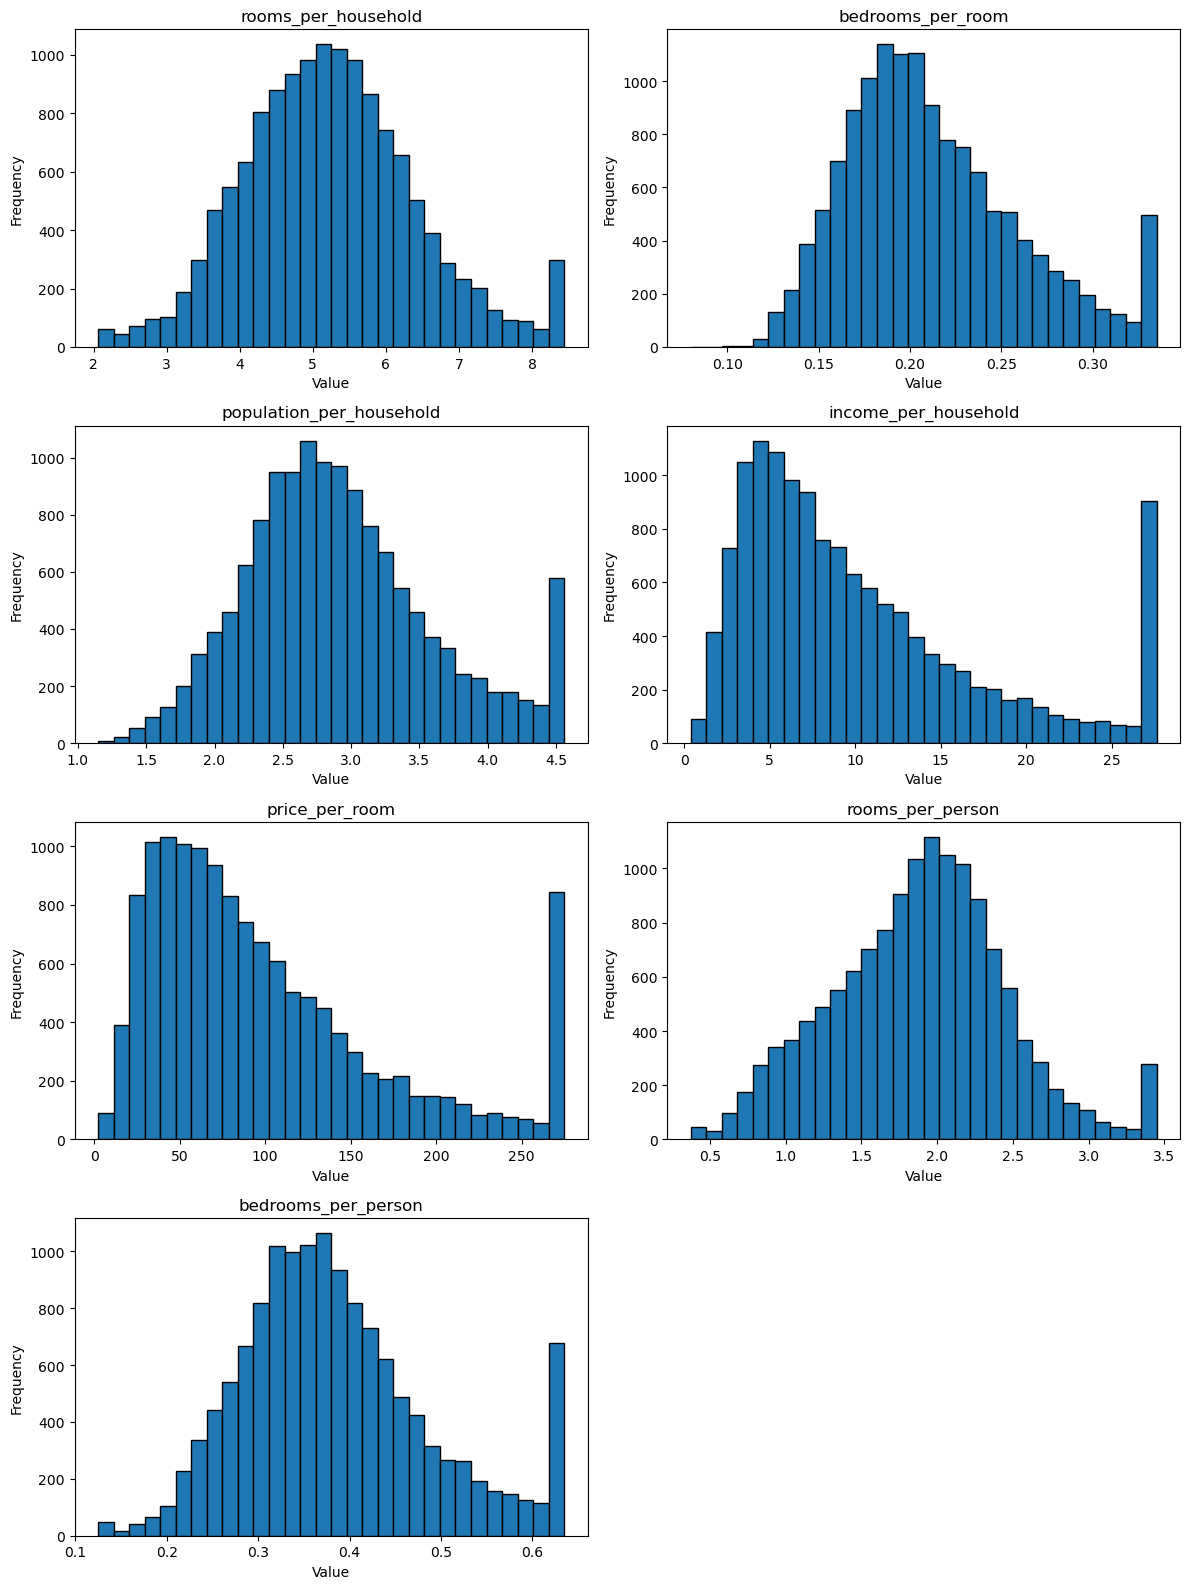

In [44]:
numerical_cols = [
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 
    'income_per_household', 'price_per_room', 'rooms_per_person', 'bedrooms_per_person'
]

cols_per_row = 2
num_cols = len(numerical_cols)
num_rows = -(-num_cols // cols_per_row)  

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>Income per Household: The strong right skew suggests a small portion of households earn significantly higher incomes, which likely drives up house prices in wealthier neighborhoods.</li>
    <li>Price per Room: The right skew indicates that while most homes have a moderate price per room, some properties in high-demand areas command much higher prices.</li>
    <li>Population per Household: The slight right skew suggests that while most households have a typical population, some densely populated areas may correspond to lower property values due to overcrowding.</li>
    <li>Rooms per Household: A balanced distribution suggests that most homes follow a standard pattern of room allocation, but those with higher room counts might be in more expensive areas.</li>
    <li>Bedrooms per Room: The normal distribution indicates a consistent ratio of bedrooms to total rooms, meaning home layout standards are relatively uniform across different price ranges.</li>
    <li>Bedrooms per Person: The distribution suggests that most homes provide a standard bedroom allocation per person, with deviations potentially affecting affordability and desirability.</li>
    <li>Rooms per Person: While mostly normal, the right tail suggests that some homes offer significantly more space per person, typically correlating with higher home values in spacious, affluent areas.</li>
    <li>The adjusted distributions after handling outliers suggest that most housing data aligns with realistic household compositions, reducing the impact of extreme cases. Median house prices in California are likely driven by income levels and room availability per person, with highly skewed distributions (such as price per room) highlighting areas of luxury housing or high demand.</li>

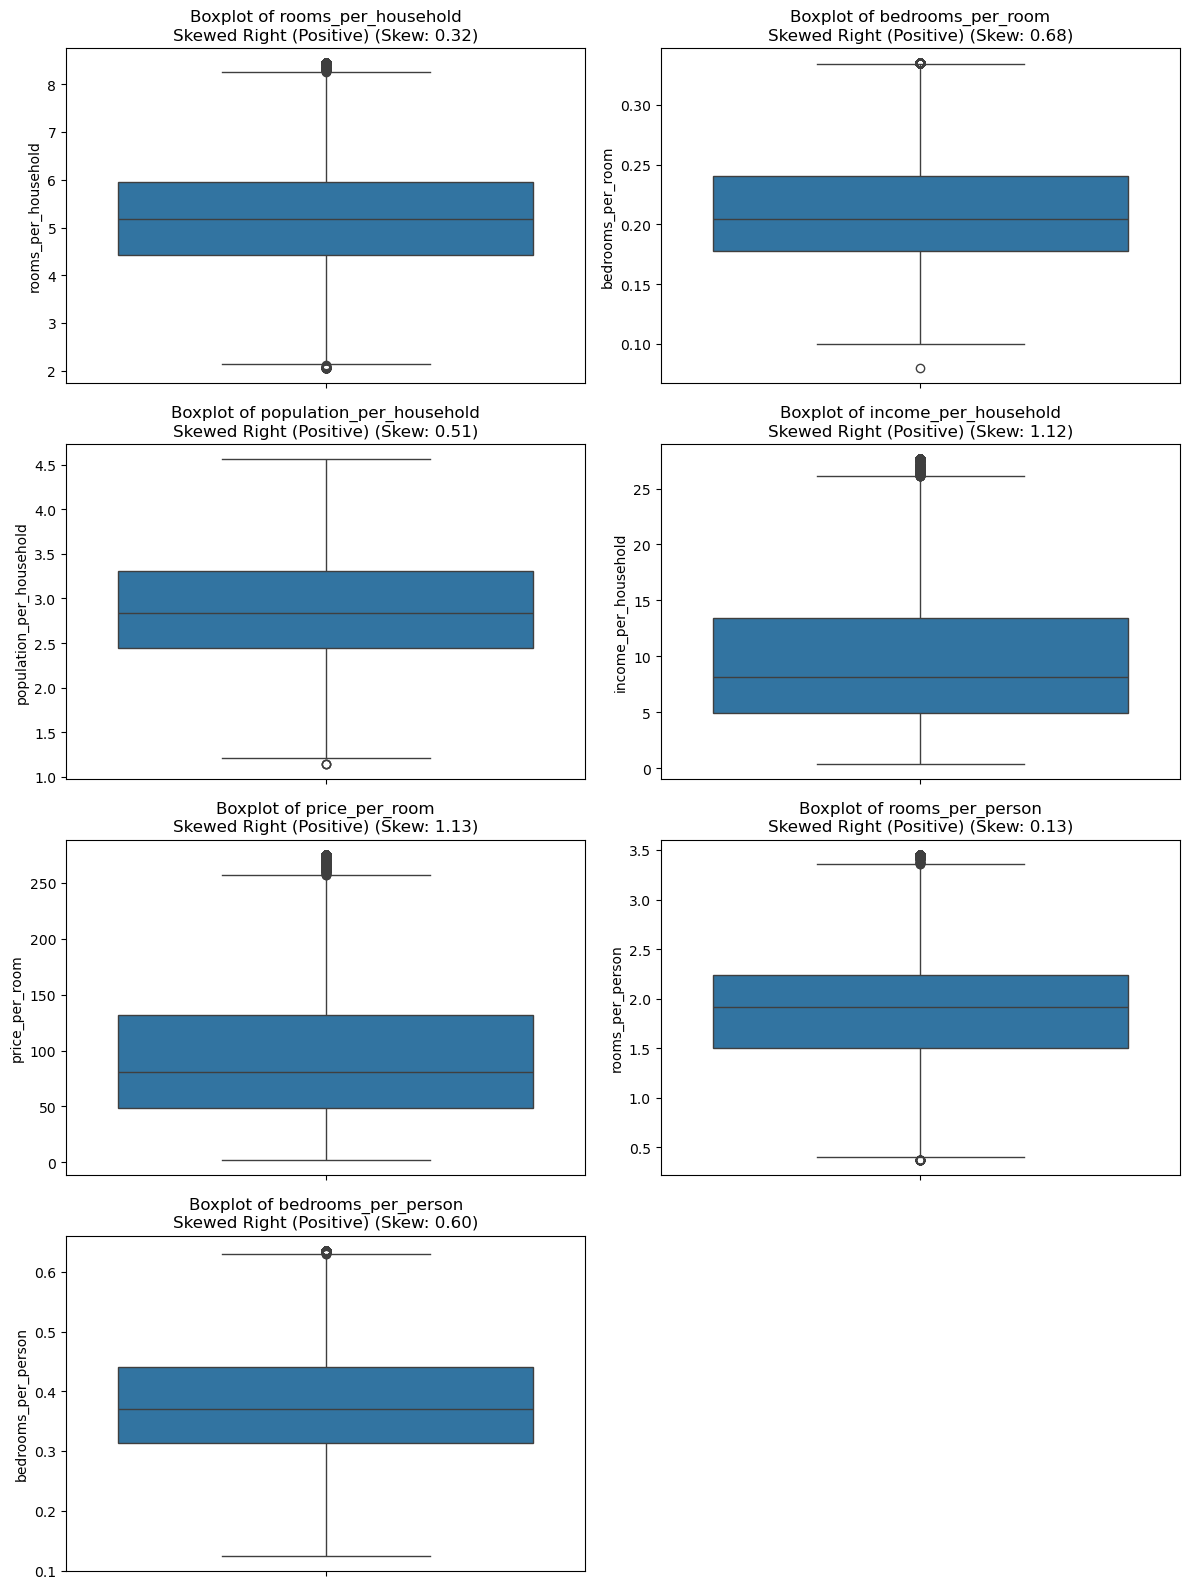

In [45]:
numerical_cols = [
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 
    'income_per_household', 'price_per_room', 'rooms_per_person', 'bedrooms_per_person'
]

n_cols = 2
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])

    skewness = df[col].skew()

    if skewness > 0:
        skew_text = 'Skewed Right (Positive)'
    elif skewness < 0:
        skew_text = 'Skewed Left (Negative)'
    else:
        skew_text = 'Symmetric'

    axes[i].set_title(f'Boxplot of {col}\n{skew_text} (Skew: {skewness:.2f})')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>Income per Household: Higher household income is strongly correlated with higher house prices, as wealthier areas tend to have more expensive properties. The right-skew suggests some areas have exceptionally high incomes, which likely corresponds to expensive housing markets.</li>
    <li>Price per Room: A higher price per room indicates premium real estate markets where space is costly. The skewness suggests some properties have significantly higher price per room, often in desirable locations.</li>
    <li>Bedrooms per Person: More bedrooms per person suggest larger homes, which are generally associated with higher property values. However, extreme values may represent luxury or low-density housing areas.</li>
    <li>Population per Household: Higher population per household can indicate more affordable or denser living conditions. Areas with lower values may have higher-priced homes with more space per resident.</li>
    <li>Rooms per Household: The near-normal distribution suggests that most homes have a typical number of rooms per household. More rooms generally increase house prices, but extremely large homes can exist in both high- and low-cost areas.</li>
    <li>Bedrooms per Room: A stable bedrooms-to-rooms ratio suggests homes are proportionally designed. High ratios may indicate affordable housing with smaller rooms, while lower ratios are found in larger, more expensive homes.</li>
    <li>Rooms per Person: More rooms per person indicate spacious living conditions, which is often correlated with higher property values. The near-normal shape suggests that housing space is fairly distributed across different regions.</li>
    <li>Handling outliers has helped remove extreme cases that could distort property value predictions, making the dataset more reliable for analysis.</li>

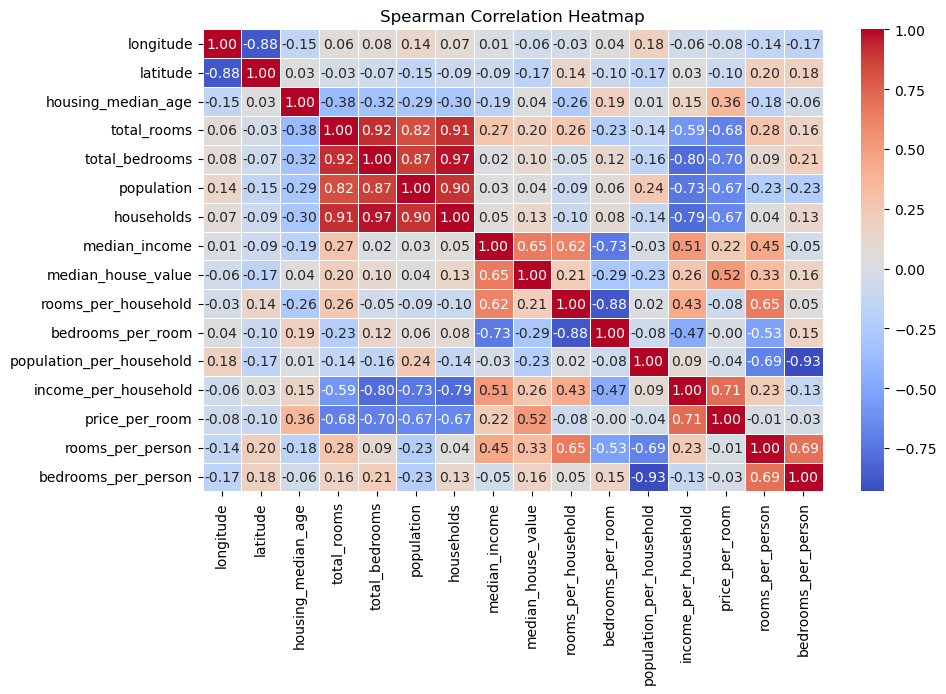

In [46]:
num_cols_new = df.select_dtypes(include=['float64', 'int64'])

spearman_corr_new = num_cols_new.corr(method='spearman')

plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr_new, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [47]:
high_corr_new = spearman_corr_new.where(np.triu(np.ones(spearman_corr_new.shape), k=1).astype(bool))  
high_corr_new = high_corr_new.stack().reset_index() 
high_corr_new.columns = ['Feature 1', 'Feature 2', 'Spearman Correlation']  
high_corr_new = high_corr_new[high_corr_new['Spearman Correlation'] > 0.5]  

high_corr_new

Feature 1             Feature 2  Spearman Correlation
42            total_rooms        total_bedrooms              0.920992
43            total_rooms            population              0.820256
44            total_rooms            households              0.911618
54         total_bedrooms            population              0.870679
55         total_bedrooms            households              0.974568
65             population            households              0.903641
84          median_income    median_house_value              0.652023
85          median_income   rooms_per_household              0.618681
88          median_income  income_per_household              0.510765
96     median_house_value        price_per_room              0.520105
103   rooms_per_household      rooms_per_person              0.650333
114  income_per_household        price_per_room              0.707669
119      rooms_per_person   bedrooms_per_person              0.693652

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>The correlation tabel shows that new numerical columns correlations with old and new numerical columns are below 0.7 which is still within acceptable range.</li>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Categorical Columns</div>

In [48]:
df['age_category'] = pd.cut(df['housing_median_age'], bins=[0, 10, 30, float('inf')], labels=['New', 'Medium', 'Old'])
df['income_category'] = pd.cut(df['median_income'], bins=[0, 2570.6, 4736.1, float('inf')], labels=['Low', 'Medium', 'High'])
df['ocean_proximity_category'] = df['ocean_proximity'].apply(lambda x: 'Coastal' if x in ['NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'] else 'Inland')
df['house_size_category'] = pd.cut(df['total_rooms'], bins=[0, 1451, 3148, float('inf')], labels=['Small', 'Medium', 'Large'])
df['price_category'] = pd.cut(df['median_house_value'], bins=[0, 119600, 263900, float('inf')], labels=['Low', 'Medium', 'High'])
df['is_coastal'] = df['ocean_proximity'].apply(lambda x: 'COASTAL' if x in ['NEAR BAY', '<1H OCEAN', 'NEAR OCEAN'] else 'NOT COASTAL')
df['is_urban'] = np.where(df['population'] > 1000, 'Urban', 'Not Urban')
df['is_affluent'] = np.where(df['median_income'] > 4736.1, 'Affluent', 'Not Affluent')
df['is_luxury'] = np.where(df['median_house_value'] > 263900, 'Luxury', 'Not Luxury')
df['is_high_density'] = np.where(df['population'] > 1724, 'High Density', 'Not High Density')

In [49]:
def get_city_based_on_latitude(latitude):
    if 32.54 <= latitude < 33.50:
        return "San Diego"
    elif 33.50 <= latitude < 34.50:
        return "Los Angeles"
    elif 34.50 <= latitude < 35.50:
        return "Riverside"
    elif 35.50 <= latitude < 36.50:
        return "Bakersfield"
    elif 36.50 <= latitude < 37.50:
        return "Fresno"
    elif 37.50 <= latitude < 38.50:
        return "San Francisco"
    elif 38.50 <= latitude < 39.50:
        return "Sacramento"
    elif 39.50 <= latitude < 40.50:
        return "Redding"
    elif 40.50 <= latitude < 41.50:
        return "Eureka"
    elif 41.50 <= latitude <= 41.95:
        return "Yreka"
    else:
        return "Unknown"  

In [50]:
df['city'] = df['latitude'].apply(get_city_based_on_latitude)

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Data Understanding of New Categorical Columns</div>

   | Features                | Description                                                               |
   |-------------------------|---------------------------------------------------------------------------|
   | Age Category            | Classifies housing based on the age of the buildings.                     |
   | Income Category         | Categorizes households into different income brackets.                    |
   | Ocean Proximity Category| Groups properties based on their distance from the ocean.                 |
   | House Size Category     | Divides homes into different size groups.                                 |
   | Price Category          | Segments houses into different price ranges.                              |
   | Is Coastal              | Labels properties as either "COASTAL" or "NOT COASTAL".                   |
   | Is Urban                | Indicates whether a property is in an urban area or not.                  |
   | Is Affluent             | Identifies whether a household falls into a higher-income bracket.        |
   | Is Luxury               | Marks properties as "LUXURY" if they belong to a high-end housing segment.|
   | Is High Density         | Indicates whether a property is in a densely populated area.              |
   | City                    | Location of the city where house is located based on latitude             |

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Categorical Columns Correlation with Median House Value</div>

`Hypothesis` :
    
$H_{0}$ : There is no significant influence for categorical columns with median house value.

$H_{a}$ : At least one categorical columns has a significant influence on median house value$

`Significance` 
$\alpha=0.05$

`Conclusion` :
- p-value $\leq \alpha$ : Reject $H_{0}$ 
- p-value $> \alpha$ : Failed to Reject $H_{0}$ 

In [51]:
categorical_features = [
    'ocean_proximity', 'age_category', 'income_category', 'ocean_proximity_category',
    'house_size_category', 'price_category', 'is_coastal', 'is_urban',
    'is_affluent', 'is_luxury', 'is_high_density'
]

anova_results = {}

for feature in categorical_features:
    groups = [df['median_house_value'][df[feature] == category] for category in df[feature].unique()]
    
    f_stat, p_value = stats.f_oneway(*groups)
    
    anova_results[feature] = {'F-Statistic': f_stat, 'P-Value': p_value}

anova_df = pd.DataFrame(anova_results).T
anova_df

F-Statistic       P-Value
ocean_proximity            1508.947897  0.000000e+00
age_category                  7.324486  6.617861e-04
income_category            3595.830983  0.000000e+00
ocean_proximity_category   4501.141185  0.000000e+00
house_size_category         213.557729  4.687792e-92
price_category            32043.205254  0.000000e+00
is_coastal                 4501.141185  0.000000e+00
is_urban                      0.248103  6.184219e-01
is_affluent                4776.091698  0.000000e+00
is_luxury                 24103.845043  0.000000e+00
is_high_density               0.052734  8.183754e-01

<div class="alert alert-block alert-danger">  
<b>Result:</b> reject the null hypothesis (H₀). All features have P-Values < 0.05, meaning that every categorical feature in the table has a statistically significant relationship with median_house_value.
</div>



<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>Features with P-Value = 0.000000e+00 (which in Python means an extremely small value, almost zero) have a very strong correlation with house prices.</li>
    <li>The higher the F-Statistic, the stronger the feature's influence on house prices.</li>
    <li>Features with the strongest impact (highest F-Statistic): is_luxury, price_category, is_affluent, income_category, ocean_proximity_category</li>
    <li>Features with the weakest impact (lowest F-Statistic): is_high_density and is_urban</li>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2240\4265908528.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values = df.groupby(feature)['median_house_value'].median().sort_values(ascending=False)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2240\4265908528.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values = df.groupby(feature)['median_house_value'].median().sort_values(ascending=False)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2240\4265908528.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


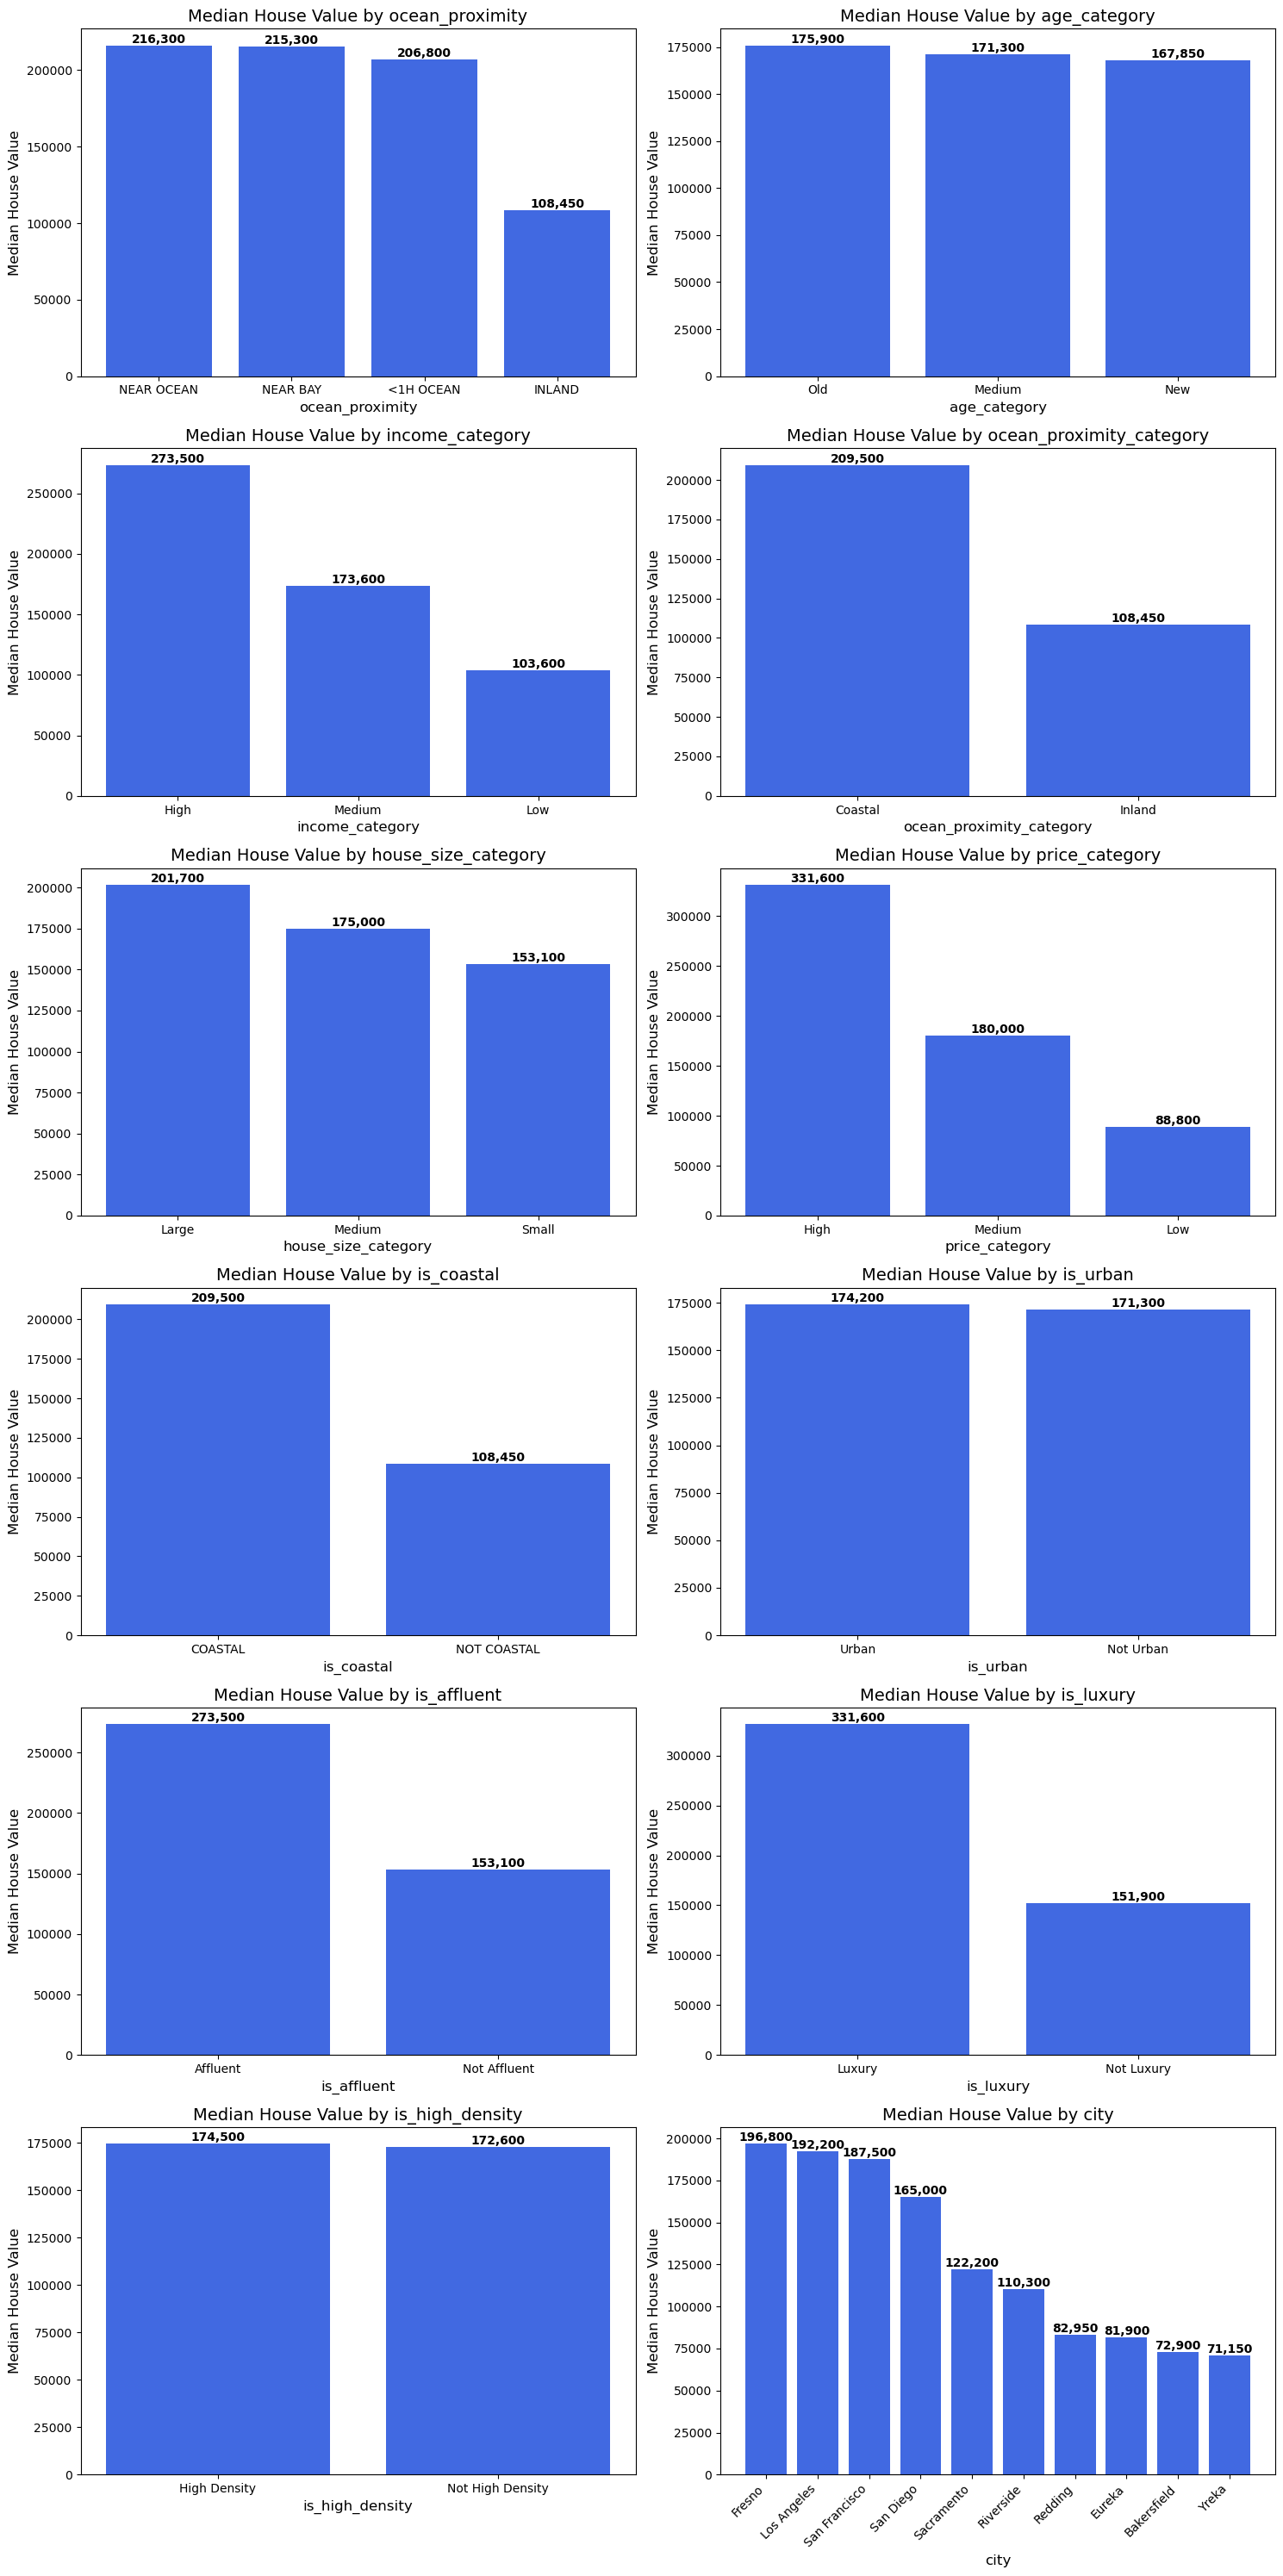

In [52]:
import matplotlib.pyplot as plt

categorical_features = [
    'ocean_proximity', 'age_category', 'income_category', 'ocean_proximity_category',
    'house_size_category', 'price_category', 'is_coastal', 'is_urban',
    'is_affluent', 'is_luxury', 'is_high_density', 'city'
]

n_cols = 2
n_rows = (len(categorical_features) + 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

for i, feature in enumerate(categorical_features):
    row, col = divmod(i, n_cols) 
    ax = axes[row, col] if n_rows > 1 else axes[col]  

    median_values = df.groupby(feature)['median_house_value'].median().sort_values(ascending=False)

    bars = ax.bar(median_values.index, median_values.values, color='royalblue')

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

    ax.set_title(f"Median House Value by {feature}", fontsize=14)
    ax.set_ylabel("Median House Value", fontsize=12)
    ax.set_xlabel(feature, fontsize=12)
    
    if feature == 'city':
        ax.set_xticklabels(median_values.index, rotation=45, ha='right') 
    else:
        ax.tick_params(axis='x', rotation=0)

if len(categorical_features) % n_cols != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>Median House Value by Ocean Proximity: Houses closer to the ocean have higher values due to the desirability of coastal living, scenic views, and recreational opportunities, while inland properties are less valuable due to lower demand and fewer amenities.</li>
    <li>Median House Value by Age Category: Older houses often have higher values because they are located in established, desirable neighborhoods with historical charm, outweighing the benefits of newer construction in less prime locations.</li>
    <li>Median House Value by Income Category: Higher-income areas have more expensive homes because residents can afford premium properties, driving up demand and prices in those neighborhoods.</li>
    <li>Median House Value by Ocean Proximity Category: Coastal homes are nearly twice as valuable as inland homes because ocean access is a highly sought-after feature, commanding a significant price premium.</li>
    <li>Median House Value by House Size Category: Larger houses have higher median values because they offer more living space, which is a key factor in determining property value.</li>
    <li>Median House Value by Price Category: High-priced homes have a much higher median value due to luxury features, prime locations, and higher demand from affluent buyers.</li>
    <li>Median House Value by Coastal Category: Coastal houses have significantly higher values because of their proximity to the ocean, which is a major selling point in California's real estate market.</li>
    <li>Median House Value by Urban Category: Non-urban houses have slightly higher median values because they often offer more space, privacy, and a quieter lifestyle compared to urban properties.</li>
    <li>Median House Value by Affluent Category: Affluent areas have nearly double the median house value because of higher demand, better infrastructure, and access to premium amenities.</li>
    <li>Median House Value by Luxury Category: Luxury homes have the highest median value due to their high-end features, exclusive locations, and appeal to wealthy buyers.</li>
    <li>Median House Value by Density Category: Houses in non-high-density areas have slightly higher median values because they offer more space and a less crowded environment, which is preferred by many buyers.</li>
    <li>Median House Value by City: The bar chart shows that median house values in California vary significantly by city, with Fresno having the highest at $196,800 and Yreka the lowest at $71,150, indicating substantial regional disparities in housing costs.</li>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2240\2818883424.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='median_house_value', palette='gist_earth_r', ax=axes[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2240\2818883424.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='median_house_value', palette='gist_earth_r', ax=axes[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2240\2818883424.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='median_house_value', p

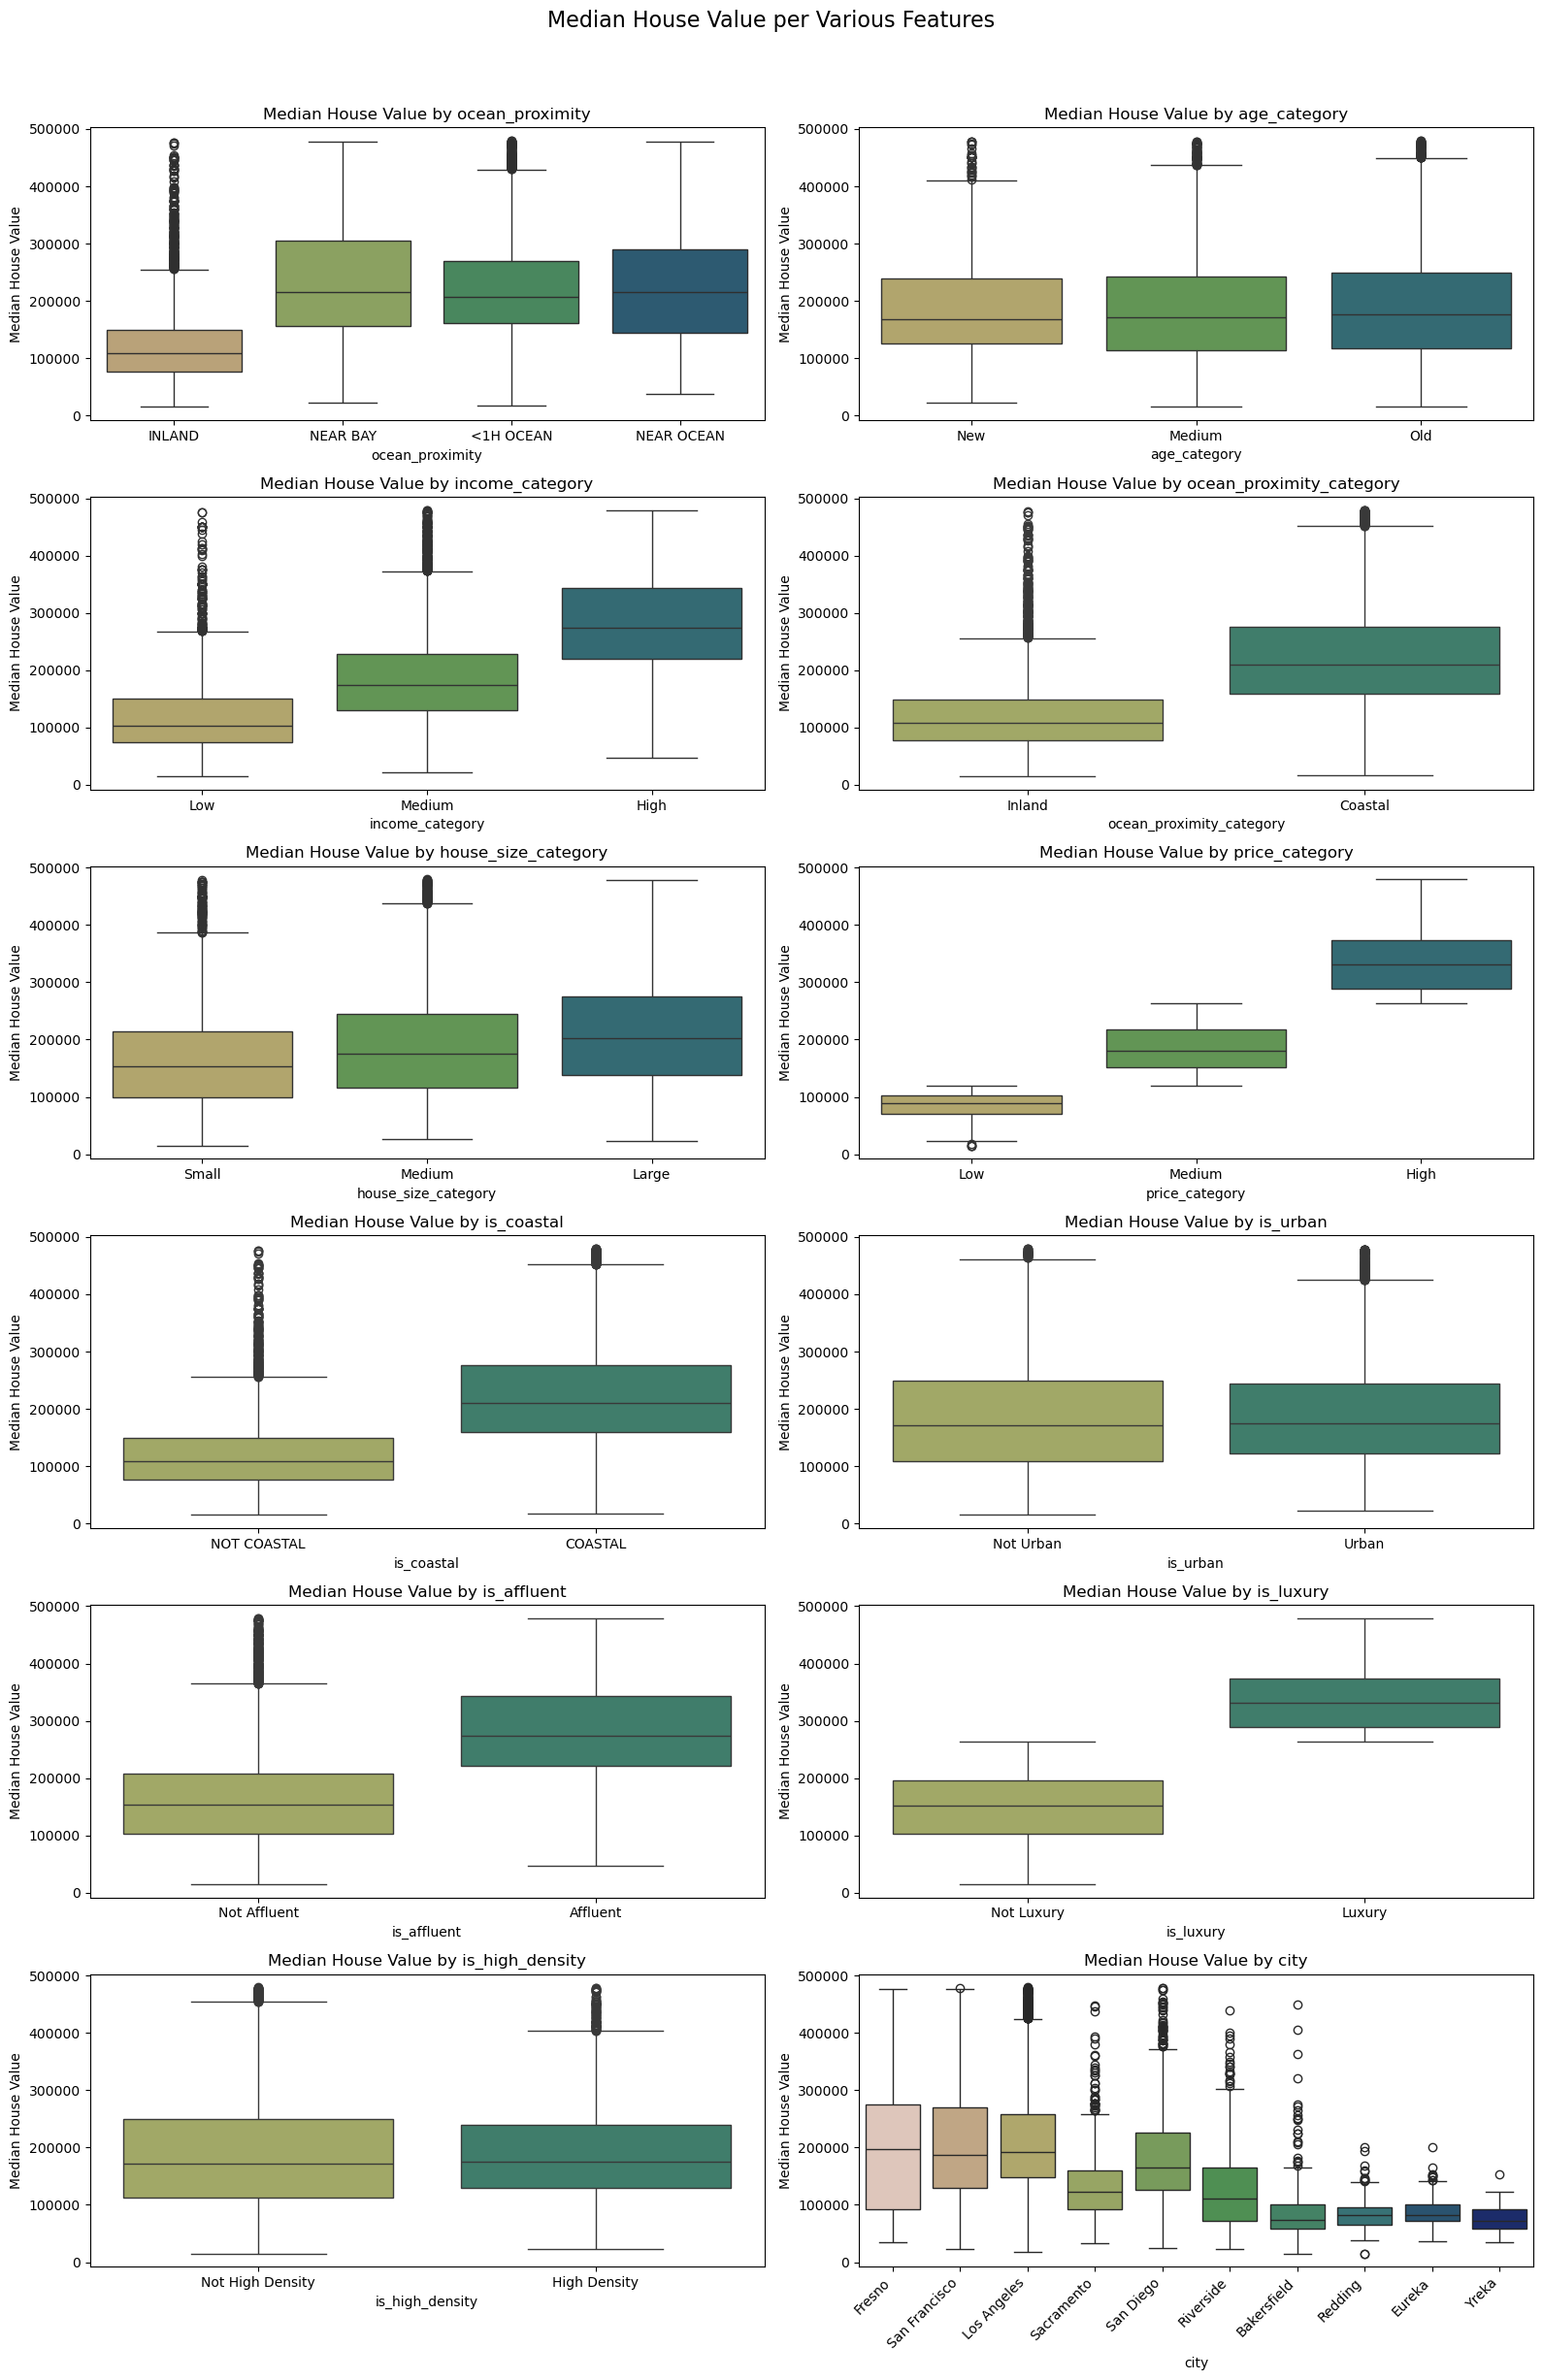

In [53]:
features = [
    'ocean_proximity', 'age_category', 'income_category', 
    'ocean_proximity_category', 'house_size_category', 'price_category', 
    'is_coastal', 'is_urban', 'is_affluent', 'is_luxury', 'is_high_density', 'city'
]

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16, 24))
fig.suptitle('Median House Value per Various Features', y=1.02, fontsize=16)

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(data=df, x=feature, y='median_house_value', palette='gist_earth_r', ax=axes[i])
    axes[i].set_title(f'Median House Value by {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Median House Value')

    if feature == 'city':
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>Median House Value by Ocean Proximity: Coastal homes have higher median values, while inland homes are significantly cheaper. Inland areas show high-value outliers, likely luxury developments or premium neighborhoods.</li>
    <li>Median House Value by Age Category: House values are relatively similar across age categories, with older homes having a slightly wider range. Some old houses have extremely high prices, likely due to renovations or historic significance.</li>
    <li>Median House Value by Income Category: Higher-income areas have significantly higher house values. Low-income areas show high-value properties, possibly due to gentrification or luxury estates.</li>
    <li>Median House Value by Ocean Proximity Category: Coastal homes are much more expensive than inland ones. Some inland homes have exceptionally high values, likely in exclusive suburban communities.</li>
    <li>Median House Value by House Size Category: Larger homes generally have higher values, but location plays a big role. Small homes with very high prices suggest premium locations or high-end renovations.</li>
    <li>Median House Value by Price Category: Price categories are clearly separated, with a sharp increase from low to high. Some "low-price" homes have unexpectedly high values, possibly due to misclassification or rapid market shifts.</li>
    <li>Median House Value by Coastal Category: Coastal properties command higher prices with less variability. Outliers: Inland high-value outliers indicate luxury estates or specific high-demand inland areas.</li>
    <li>Median House Value by Urban Category: Urban areas tend to have higher median house values. Some non-urban properties are extremely expensive, likely large estates or desirable rural retreats.</li>
    <li>Median House Value by Affluent Category: Affluent areas have significantly higher median house values than non-affluent ones. Some non-affluent areas have high-value properties, possibly due to location advantages or gentrification.</li>
    <li>Median House Value by Luxury Category: Luxury homes have a much higher median value compared to non-luxury ones. Some non-luxury properties show high prices, likely due to renovations or desirable locations.</li>
    <li>Median House Value by Density Category: High-density areas tend to have lower median house values than less dense regions. Some high-density areas contain very expensive properties, possibly due to premium urban locations.</li>
    <li>Median House Value by City: House prices in California show a large range in major cities like Los Angeles and San Francisco, with high-value outliers indicating luxury properties, while smaller cities like Yreka have a narrower range and fewer extreme values, reflecting more stable markets.</li>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Mann-Whitney U Test for 2 Variables</div>

`Hypothesis` :
    
$H_{0}$ : There is no significant difference in median house value across all categories.

$H_{a}$ : At least one category differs significantly from others$

`Significance` 
$\alpha=0.05$

`Conclusion` :
- p-value $\leq \alpha$ : Reject $H_{0}$ 
- p-value $> \alpha$ : Failed to Reject $H_{0}$ 

In [54]:
from scipy.stats import mannwhitneyu

e = 0.05

N = len(df)

n = round(N / (1 + N * (e**2)))

df2 = df.sample(n)

features = {
    'ocean_proximity_category': ('Coastal', 'Inland'),
    'is_coastal': ('COASTAL', 'NOT COASTAL'),
    'is_urban': ('Urban', 'Not Urban'),
    'is_high_density': ('High Density', 'Not High Density'),
    'is_affluent': ('Affluent', 'Not Affluent'),
    'is_luxury': ('Luxury', 'Not Luxury')
}

results = []

for feature, (group1_value, group2_value) in features.items():
    
    group1 = df2[df2[feature] == group1_value]['median_house_value']
    group2 = df2[df2[feature] == group2_value]['median_house_value']
    
    if len(group1) == 0 or len(group2) == 0:
        print(f"Error: Salah satu atau kedua kelompok untuk fitur {feature} tidak memiliki data.")
        continue
    
    result = list(mannwhitneyu(group1, group2, alternative='two-sided'))
    
    if result[1] < 0.05:
        interpretation = f"Feature {feature} has significant influence on median_house_value."
    else:
        interpretation = f"Feature {feature} has no significant influence on median_house_value."
    
    results.append({
        'Feature': feature,
        'U-Statistic': result[0],
        'P-Value': result[1],
        'Interpretation': interpretation
    })

results_df = pd.DataFrame(results)

results_df

Feature  U-Statistic       P-Value  \
0  ocean_proximity_category      29443.0  1.543826e-29   
1                is_coastal      29443.0  1.543826e-29   
2                  is_urban      17978.0  7.310068e-01   
3           is_high_density      13850.0  7.210160e-02   
4               is_affluent      21275.5  3.232165e-19   
5                 is_luxury      26058.0  1.681217e-45   

                                                                      Interpretation  
0  Feature ocean_proximity_category has significant influence on median_house_value.  
1                Feature is_coastal has significant influence on median_house_value.  
2               Feature is_urban has no significant influence on median_house_value.  
3        Feature is_high_density has no significant influence on median_house_value.  
4               Feature is_affluent has significant influence on median_house_value.  
5                 Feature is_luxury has significant influence on median_house_value.

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>ocean_proximity_category (Coastal vs. Inland): Houses located in coastal areas tend to have significantly different median house values compared to those in inland areas. This is expected, as coastal properties are often more desirable due to factors like proximity to the ocean, better views, and higher demand, which drive up prices.</li>
    <li>is_coastal (Coastal vs. Not Coastal): Similar to ocean_proximity_category, this feature confirms that being located in a coastal area significantly impacts house prices. Coastal properties are likely more expensive due to their premium location.</li>
    <li>is_urban (Urban vs. Not Urban): Whether a house is located in an urban area or not does not significantly affect its median value. This suggests that urban and non-urban areas in California may have similar housing price distributions, or other factors (e.g., proximity to the coast, income levels) may play a more dominant role in determining house prices.</li>
    <li>is_high_density (High Density vs. Not High Density): The population density of an area (high density vs. not high density) does not significantly impact median house values. This could mean that high-density areas (e.g., cities) and low-density areas (e.g., suburbs) have similar price ranges, or other factors like location and income levels are more influential.</li>
    <li>is_affluent (Affluent vs. Not Affluent): Houses located in affluent areas (areas with higher income levels) tend to have significantly higher median values. This is expected, as affluent areas often have better infrastructure, schools, and amenities, which increase property values.</li>
    <li>is_luxury (Luxury vs. Not Luxury): Luxury properties have significantly higher median values compared to non-luxury properties. This is intuitive, as luxury homes typically come with premium features, larger sizes, and better locations, which justify their higher prices.</li>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Kruskal-Wallis Test for more than 2 Variables</div>

`Hypothesis` :
    
$H_{0}$ : There is no significant difference in median house value across all categories.

$H_{a}$ : At least one category differs significantly from others$

`Significance` 
$\alpha=0.05$

`Conclusion` :
- p-value $\leq \alpha$ : Reject $H_{0}$ 
- p-value $> \alpha$ : Failed to Reject $H_{0}$ 

In [55]:
e = 0.01
N = len(df)
n = round(N / (1 + N * (e**2)))

df3 = df.sample(n)

features = {
    'ocean_proximity': ['NEAR BAY', 'NEAR OCEAN', 'INLAND', '<1H OCEAN'],
    'age_category': ['Old', 'Medium', 'New'],
    'income_category': ['High', 'Medium', 'Low'],
    'house_size_category': ['Large', 'Medium', 'Small'],
    'price_category': ['High', 'Medium', 'Low'],
    'city': ['Los Angeles', 'San Francisco', 'Fresno', 'San Diego', 'Sacramento', 'Riverside',
            'Bakersfield', 'Redding', 'Eureka', 'Yreka']
}

results = []

for feature, groups in features.items():
    groups_data = [df3[df3[feature] == group]['median_house_value'] for group in groups]
    
    stat, p_value = kruskal(*groups_data)
    
    if p_value < 0.05:
        interpretation = f"Feature {feature} has significant influence on median_house_value."
    else:
        interpretation = f"Feature {feature} has no significant influence on median_house_value."
    
    results.append({
        'Feature': feature,
        'Kruskal-Wallis Statistic': stat,
        'P-Value': p_value,
        'Interpretation': interpretation
    })

results_df = pd.DataFrame(results)

results_df

Feature  Kruskal-Wallis Statistic        P-Value  \
0      ocean_proximity               1795.910479   0.000000e+00   
1         age_category                  0.652787   7.215211e-01   
2      income_category               2189.521683   0.000000e+00   
3  house_size_category                202.895740   8.744800e-45   
4       price_category               4789.942403   0.000000e+00   
5                 city                970.070477  4.892979e-203   

                                                                 Interpretation  
0      Feature ocean_proximity has significant influence on median_house_value.  
1      Feature age_category has no significant influence on median_house_value.  
2      Feature income_category has significant influence on median_house_value.  
3  Feature house_size_category has significant influence on median_house_value.  
4       Feature price_category has significant influence on median_house_value.  
5                 Feature city has significant influence on median_house_value.

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>ocean_proximity: Houses located in different proximity categories to the ocean (e.g., "NEAR BAY", "NEAR OCEAN", "INLAND", "< 1H OCEAN") have significantly different median house values. This suggests that location relative to the ocean is a critical factor in determining house prices. Coastal properties (e.g., "NEAR OCEAN") are likely more expensive due to their premium location, while inland properties may be more affordable.</li>
    <li>age_category: The age of the house (e.g., "Old", "Medium", "New") significantly affects its price. Newer houses are often more expensive due to modern amenities, better construction standards, and lower maintenance costs. However, older houses can also command higher prices if they are located in prime areas, have historical significance, or feature unique architectural designs. In some cases, older homes may be renovated to meet modern standards, further increasing their value. The relationship between age and price is not strictly linear and depends on additional factors like location and condition.</li>
    <li>income_category: The income level of the area (e.g., "High", "Medium", "Low") is a strong predictor of house prices. High-income areas are associated with higher house prices due to better infrastructure, schools, and amenities, while low-income areas tend to have more affordable housing.</li>
    <li>house_size_category: The size of the house (e.g., "Large", "Medium", "Small") significantly impacts its price. Larger houses are more expensive due to their greater living space and potential for more rooms, while smaller houses are more affordable.</li>
    <li>price_category:  The price category (e.g., "High", "Medium", "Low") is a strong indicator of house value. This feature likely reflects the overall market segmentation, where high-price category houses are luxury properties with premium features, while low-price category houses are more affordable options.</li>
    <li>city: City is a strong indicator of house value. This feature shows that house prices in California vary a lot depending on the location—cities like San Francisco or Los Angeles have much higher prices compared to smaller or less urban areas, so where a house is located (city) plays a big role in predicting its price.

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Conclusion</div>

>1. The data processing involves handiling missing values. It is shown that total_bedrooms has a total of 137 missing values and has the highest correlation with households feature, therefore missing values in total_bedrooms feature are filled with median of households group they belong to.
>2. There is no duplicated data so handling for duplicated data is not required for this dataset.
>3. The outliers in the California housing dataset are acceptable because they reflect real-world trends, such as higher prices in coastal and affluent areas, luxury properties with more rooms or bedrooms, and densely populated urban centers, all of which align with the dynamics of California's diverse and premium real estate market.
>4. New numerical columns like rooms_per_household, bedrooms_per_room, population_per_household, income_per_household, price_per_room, rooms_per_person, and bedrooms_per_person, along with categorical columns like age_category, income_category, ocean_proximity_category, house_size_category, price_category, is_coastal, is_urban, is_affluent, is_luxury, and is_high_density are added to enhance the model by capturing more complexity, improving accuracy, handling non-linear relationships, enabling better feature engineering, addressing data sparsity, enhancing interpretability, managing multicollinearity, and supporting advanced algorithms to better predict house prices in California.
>5. New numerical columns have many outliers with positive skew where maximum value of each features are way above upper whisker, therefore outliers are handled through capping, transformation and removal.
>6. The Mann-Whitney U test reveals that features like ocean_proximity_category, is_coastal, is_affluent, and is_luxury significantly influence median house values, with coastal, affluent, and luxury properties commanding higher prices, while is_urban and is_high_density show no significant impact, suggesting that location and income levels are more dominant factors in California's housing market.
>7. The Kruskal-Wallis test reveals that features like ocean_proximity, age_category, income_category, house_size_category, price_category and city significantly influence median house values, with coastal locations, newer or historically significant homes, high-income areas, larger houses, and luxury properties commanding higher prices, highlighting the complex interplay of location, income, size, and market segmentation in California's housing market.

<div style="padding:10px; 
            color:#ffff;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            background-color: #213555;
            overflow:hidden;
            font-weight:500">4. Modeling</div>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Model Selection</div>

   | Criterion               | Linear Models                  | Gradient Boosting Models           |
   |-------------------------|--------------------------------|------------------------------------|
   | Data Complexity         | Linear relationships           | Non linear relationships           |
   | Number of Features      | Small number                   | Large number                       |
   | Features Interaction    | No features interaction        | Model features interaction         |
   | Datasets Size           | Small datasets                 | Large datasets                     |
   | Handling Outliers       | Sensitive to outliers          | Robust to outliers                 |

1. Data Complexity: Majority of features has **non linear relationship** with each other.
2. Number of Features: After adding new numerical and categorical features, the number of features increase to **27 features**.
3. Features Interaction: **New numerical and categorical features** are the results of interactions of previous features.
4. Datasets Size: The dataset has **13688 data** which is quiet large.
5. Handling Outliers: There are many outliers especially for **total_rooms, total_bedrooms, households, population and median_house_value features**.
6. Therefore, **gradient boosting models** are preffered to be used for this analysis.

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Model Description</div>

   | Model               | Advantages                           | Disadvantages                      |
   |---------------------|--------------------------------------|------------------------------------|
   | XGBoost             | Stable and highly tunable, handles missing values well         | Can be slow and memory-intensive due to complex tree structures   |
   | LightGBM            | 	Faster than XGBoost and memory-efficient                     | More prone to overfitting due to aggressive leaf-wise growth          |
   | CatBoost            | Handles categorical features natively, requires minimal tuning              | Slower training speed and higher memory usage compared to LightGBM              |
   | HistGradientBoosting| Fast and efficient for large datasets, integrates well with Scikit-Learn| Limited built-in support for categorical features, requiring preprocessing|

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Scaler Selection</div>

   | Scaler                  | When to Use                  |
   |-------------------------|------------------------------|
   | StandardScaler          | Data follows a Gaussian (normal) distribution, and features need standardization to have a mean of 0 and a standard deviation of 1.         | 
   | MinMaxScaler            | Data is not normally distributed, and features need scaling to a specific range (e.g., 0 to 1). Suitable for algorithms sensitive to feature magnitudes.                 | 
   | RobustScaler            | Data contains outliers, and scaling is required using the median and interquartile range (IQR) to reduce the impact of outliers.      | 
   | MaxAbsScaler            | Data is sparse, and scaling is needed to the range [-1, 1] without breaking sparsity.               | 
   | Normalizer              | Individual samples require scaling to have a unit norm, often used in text classification or clustering.       | 
   | Log Transformation      | Data is highly skewed (e.g., exponential distribution) and requires transformation to make it more Gaussian-like. |
   | PowerTransformer        | Data is highly non-Gaussian and requires a power transformation (e.g., Yeo-Johnson or Box-Cox) to make it more Gaussian-like. |
   | QuantileTransformer     | Data needs transformation to follow a uniform or normal distribution, especially for non-linear data. |
   | Unit Vector Scaling     | Data requires scaling such that each feature vector has a length of 1, useful for cosine similarity. |

StandardScaler:
- latitude -> 0 outliers, normal distribution (skew: -0.3)
- longitude -> 0 outliers, normal distribution (skew: 0.47)
- housing_median_age -> 0 outliers, normal distribution (skew: 0.06)
- rooms_per_household -> 0 outliers, normal distribution (skew: 0.35)
- bedrooms_per_room -> 0 outliers, normal distribution (skew: 0.64)
- population_per_household -> 3 outliers, normal distribution (skew: 0.51)

RobustScaler:
- total_rooms -> 900 outliers, skewed right (skew: 3.98)
- total_bedrooms -> 885 outliers, skewed right (skew: 3.39)
- population -> 827 outliers, skewed right (skew: 5.46)
- households -> 842 outliers, skewed right (skew: 3.35)
- median_income -> 482 outliers, skewed right (skew: 1.63)
- median_house_value -> 757 outliers, skewed right (skew: 0.98)
- income_per_household -> 1099 outliers, skewed right (skew: 1.04)
- price_per_room -> 1018 outliers, skewed right (skew: 1.02)
- rooms_per_person -> 296 outliers, normal distribution (skew: 0.11)
- bedrooms_per_person -> 710 outliers, normal distribution (skew: 0.59)


<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Encoder Selection</div>

   | Encoder                 | When to Use                  |
   |-------------------------|------------------------------|
   | LabelEncoder            | Encoding categorical target variables into numeric labels for supervised learning tasks.       | 
   | OneHotEncoder           | Encoding nominal categorical features into binary columns, suitable for algorithms that require numerical input.                 | 
   | OrdinalEncoder          | Encoding ordinal categorical features into integer labels, preserving the order of categories.      | 
   | BinaryEncoder           | Encoding categorical features into binary digits, reducing dimensionality compared to OneHotEncoder.               | 
   | TargetEncoder           | Encoding categorical features based on the mean of the target variable, useful for high-cardinality features.      | 
   | CountEncoder            | Encoding categorical features based on the frequency of each category, useful for capturing category importance. |
   | HashingEncoder          | Encoding categorical features into a fixed number of dimensions, suitable for high-cardinality features. |
   | CatBoostEncoder         | Encoding categorical features using target statistics, specifically designed for CatBoost models. |
   | LeaveOneOutEncoder      | Encoding categorical features using target statistics while excluding the current row to avoid data leakage. |
   | WOEEncoder              | Encoding categorical features using Weight of Evidence, commonly used in credit scoring and binary classification. |
   | GLMMEncoder             | Encoding categorical features using Generalized Linear Mixed Models, suitable for hierarchical or grouped data. |

OneHotEncoder:
- ocean_proximity
- age_category
- is_urban
- is_high_density
- city

OrdinalEncoder:
- income_category
- ocean_proximity_category
- house_size_category
- price_category
- is_coastal
- is_affluent
- is_luxury

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Define Features and Labels</div>

In [56]:
X = df.drop('median_house_value', axis = 1) 
y = df['median_house_value']    

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Split Data</div>

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Preprocessing</div>

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline

onehot_cols = ['ocean_proximity', 'age_category', 'is_urban', 'is_high_density', 'city']

ordinal_cols = ['income_category', 'ocean_proximity_category', 'house_size_category', 
                'price_category', 'is_coastal', 'is_affluent', 'is_luxury']

ordinal_categories = [
    ['Low', 'Medium', 'High'],  
    ['Inland', 'Coastal'],  
    ['Small', 'Medium', 'Large'],  
    ['Low', 'Medium', 'High'], 
    ['NOT COASTAL', 'COASTAL'], 
    ['Not Affluent', 'Affluent'], 
    ['Not Luxury', 'Luxury']   
]

standard_scaler_cols = ['latitude', 'longitude', 'housing_median_age', 'rooms_per_household', 
                        'bedrooms_per_room', 'population_per_household']

robust_scaler_cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 
                      'median_income', 'income_per_household', 'price_per_room', 
                      'rooms_per_person', 'bedrooms_per_person']

onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=ordinal_categories))
])

standard_scaler_transformer = Pipeline(steps=[
    ('standard_scaler', StandardScaler())
])

robust_scaler_transformer = Pipeline(steps=[
    ('robust_scaler', RobustScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_transformer, onehot_cols),
        ('ordinal', ordinal_transformer, ordinal_cols),
        ('standard_scaler', standard_scaler_transformer, standard_scaler_cols),
        ('robust_scaler', robust_scaler_transformer, robust_scaler_cols)
    ],
    remainder='drop'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Model Evaluation and Visualization</div>

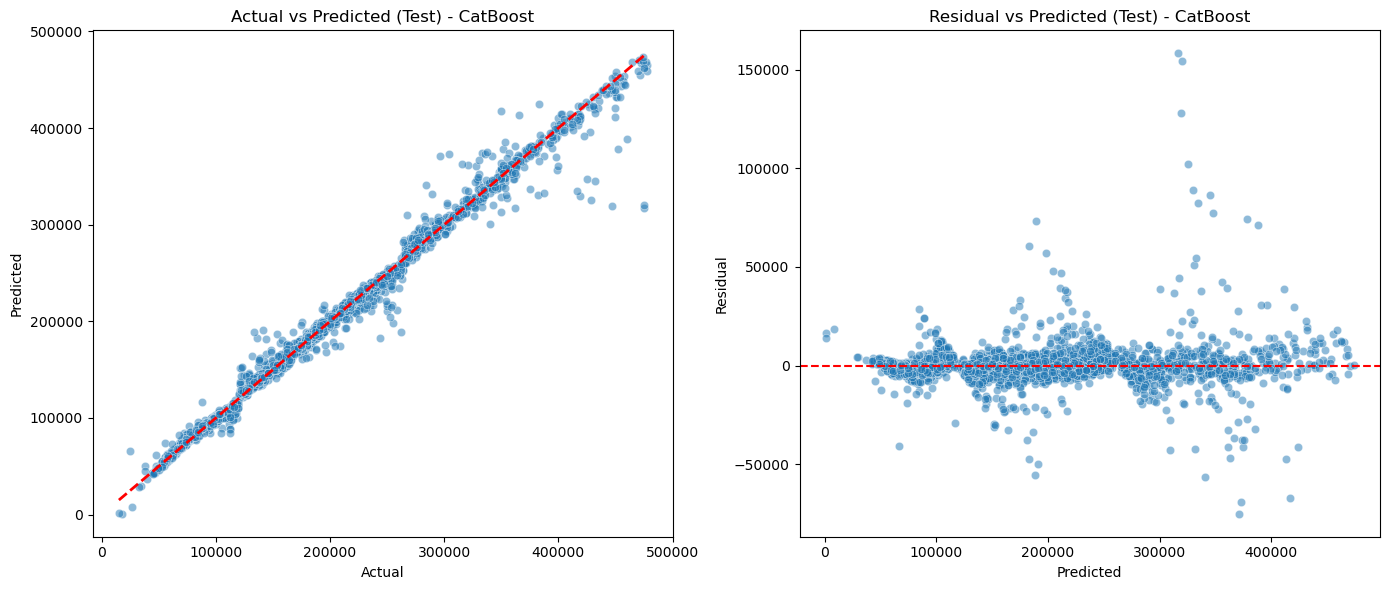

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3681
[LightGBM] [Info] Number of data points in the train set: 10950, number of used features: 43
[LightGBM] [Info] Start training from score 190759.899361


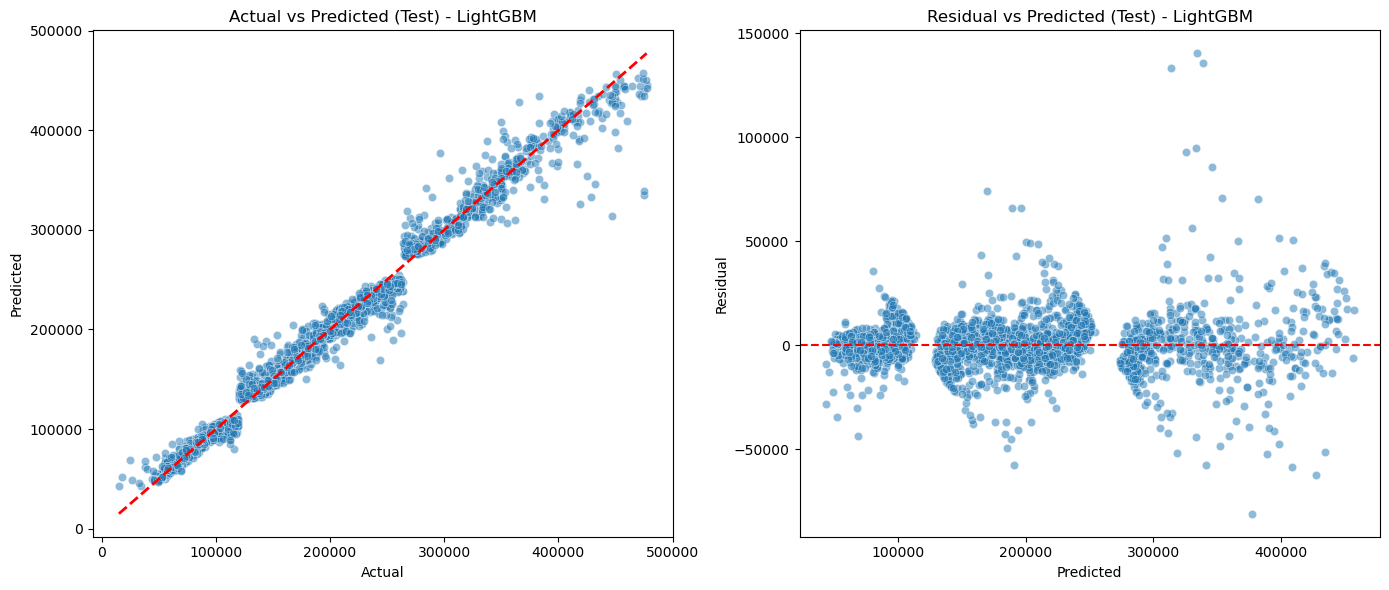

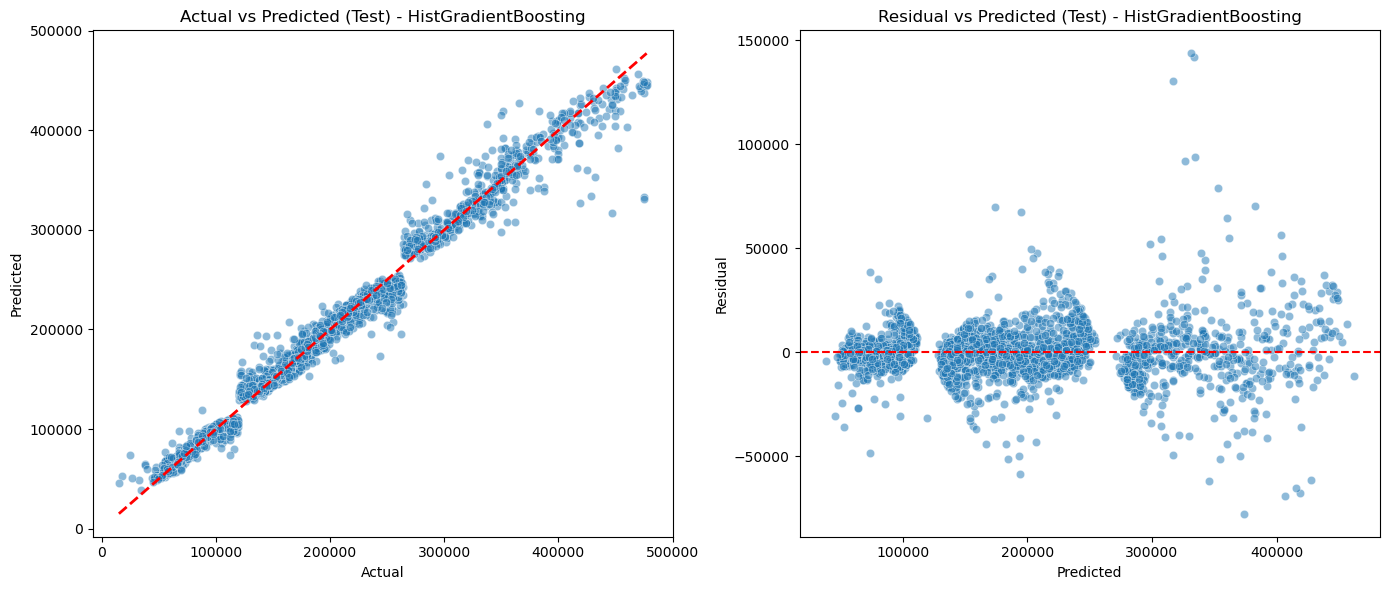

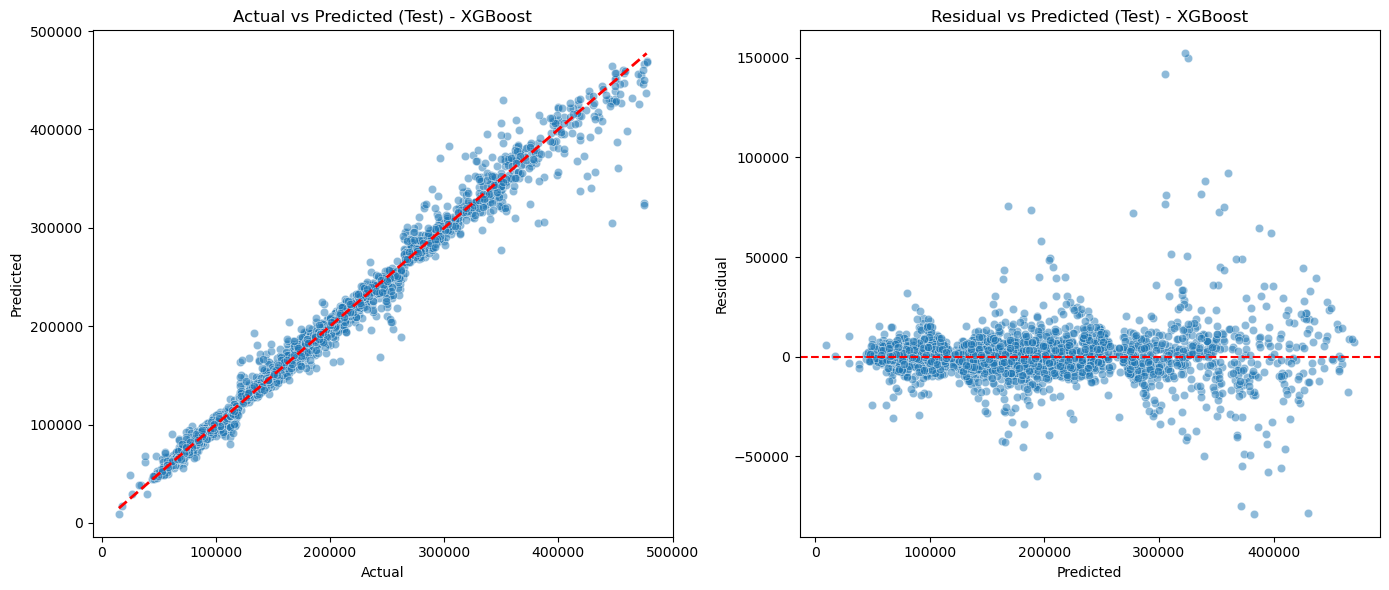

Model    MAE Train     MAE Test  MAPE Train  MAPE Test  \
0              CatBoost  3609.228519  5020.414565    0.021513   0.028975   
1              LightGBM  6655.075644  7917.902138    0.040889   0.048073   
2  HistGradientBoosting  6762.013231  8035.400134    0.041570   0.048607   
3               XGBoost  3179.791789  7117.505217    0.019187   0.039844   

   R2 Train   R2 Test  
0  0.995986  0.987699  
1  0.989262  0.982073  
2  0.988720  0.981554  
3  0.997892  0.982605

In [59]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def evaluate_models_and_plot_actual_vs_predicted(models, X_train, y_train, X_test, y_test, preprocessor):
    results = []
    
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)
    
    for name, model in models.items():
        model.fit(X_train_preprocessed, y_train)
        
        y_train_pred = model.predict(X_train_preprocessed)
        y_test_pred = model.predict(X_test_preprocessed)
        
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        results.append({
            'Model': name,
            'MAE Train': train_mae,
            'MAE Test': test_mae,
            'MAPE Train': train_mape,
            'MAPE Test': test_mape,
            'R2 Train': train_r2,
            'R2 Test': test_r2
        })
        
        plt.figure(figsize=(14, 6))
        
        plt.subplot(1, 2, 1)
        sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.title(f'Actual vs Predicted (Test) - {name}')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        
        test_residuals = y_test - y_test_pred
        plt.subplot(1, 2, 2)
        sns.scatterplot(x=y_test_pred, y=test_residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title(f'Residual vs Predicted (Test) - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Residual')
        
        plt.tight_layout()
        plt.show()

    results_df = pd.DataFrame(results)
    return results_df

models = {
    "CatBoost": CatBoostRegressor(verbose=0, random_state=10),
    "LightGBM": LGBMRegressor(random_state=10),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=10),
    "XGBoost": XGBRegressor(random_state=10)
}

results_df = evaluate_models_and_plot_actual_vs_predicted(models, X_train, y_train, X_test, y_test, preprocessor)
results_df

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight for Actual vs Predicted Plot</b>
    <li>Prediction Consistency: The Actual vs. Predicted plots show that CatBoost has the tightest alignment along the diagonal, indicating minimal errors and strong predictive performance with few outliers. LightGBM and XGBoost also follow the diagonal well, but LightGBM has slightly more spread in residuals, while XGBoost shows increasing spread for larger values, suggesting challenges with extreme predictions. HistGradientBoosting exhibits noticeable clustering and systematic deviations, making it the least consistent among the four models.</li>
    <li>Correlation: All four models exhibit a strong positive correlation between actual and predicted values, as seen from the diagonal alignment in their plots. CatBoost shows the strongest positive correlation with minimal deviation, while LightGBM and XGBoost also maintain a high positive correlation but with slightly more spread, especially for extreme values. HistGradientBoosting, though still positively correlated, shows more deviations and clustering, indicating a weaker relationship compared to the other models.</li>
    <li>Outliers: CatBoost has the fewest outliers, maintaining a balanced distribution of overestimations and underestimations, making it the most stable model. LightGBM and XGBoost exhibit moderate outliers, with LightGBM slightly overestimating higher house values and XGBoost more frequently underestimating them, especially at extreme price ranges. HistGradientBoosting has the most outliers, often overestimating lower-value houses while underestimating higher-value ones, indicating it struggles the most with capturing price variations accurately.</li>

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight for Residual vs Predicted Plot</b>
    <li>Residuals Distribution: LightGBM and HistGradientBoosting show clear clustering in residuals, indicating systematic errors and struggles with certain prediction ranges. CatBoost and XGBoost have a more random residual distribution, with CatBoost appearing the most evenly spread around zero, suggesting better model performance. Overall, CatBoost is the best model due to its well-distributed residuals, while HistGradientBoosting performs the worst due to strong clustering and visible structure in residuals.</li>
    <li>Zero-Centered Residuals Line: CatBoost has the most balanced residual distribution around zero, indicating minimal bias and well-calibrated predictions. XGBoost also maintains a good zero-centered spread, though it appears slightly less random than CatBoost. LightGBM shows some deviation from zero, suggesting minor bias, while HistGradientBoosting has the most noticeable clustering and deviation, indicating systematic bias and the poorest calibration among the four models.</li>
    <li>Flat Regression Line: All four models exhibit relatively flat regression lines, indicating that the residuals are centered around zero across different predicted values. However, CatBoost and XGBoost maintain the most stable flatness, suggesting consistent predictions with minimal systematic error. LightGBM shows slight deviations, hinting at mild bias, while HistGradientBoosting has the least flat regression line due to noticeable clustering and variance in residuals, indicating higher systematic errors.</li>
    <li>Outliers: CatBoost and XGBoost show fewer extreme outliers, indicating more stable predictions, though XGBoost has slightly more high-magnitude residuals. LightGBM has a moderate number of outliers, suggesting occasional prediction errors, but they are not as structured as in HistGradientBoosting. HistGradientBoosting has the most severe outliers, especially in higher predicted values, reinforcing its systematic bias and weaker performance compared to the other models.</li>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Metric Selection</div>

   | Metric                  | When to Use                    | 
   |-------------------------|--------------------------------|
   | Mean Absolute Error (MAE)        | Measure the average absolute difference between predicted and actual values. Robust to outliers.           |
   | Mean Squared Error (MSE)      | Penalizes large errors (sensitive to outliers).                   | 
   | Root Mean Squared Error (RMSE)    | Errors normally distributed (sensitive to outlier)        |
   | R² (R-Squared)         | Measure how well the model explains the variance in the target variable.                 | 
   | Adjusted R²       | Compare models with different numbers of predictors (adjusts for overfitting).          | 
   | Mean Absolute Percentage Error (MAPE)       | Express errors as a percentage of the actual values (easy to interpret).          | 
   | Median Absolute Error (MedAE)       | More robust metric that is not influenced by outliers.          | 
   | Explained Variance Score      | Measure the proportion of variance in the target variable explained by the model.         | 

Based on residual vs predicted and actual vs predicted plots above, there are many outliers present in the dataset. Therefore, for better evaluation of models MAE, MAPE and R² metrics will be used for this analysis.

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight for Metrics</b>
    <li>Model Performance on Training Data vs Test Data: CatBoost has the lowest Train MAE (3609.23) and Test MAE (5020.41), indicating strong performance on both datasets. XGBoost shows signs of overfitting, with a low Train MAE (3179.79) but higher Test MAE (7117.51). LightGBM and HistGradientBoosting have higher errors on both datasets, suggesting underfitting compared to CatBoost and XGBoost.</li>
    <li>Error Metrics (MAE and MAPE): MAE measures the average absolute prediction error, with lower values indicating better performance; CatBoost has the lowest Test MAE (5020.41), while XGBoost is less accurate (7117.51). MAPE measures the average percentage error, and CatBoost again leads with the lowest Test MAPE (2.9%), compared to XGBoost's higher Test MAPE (3.98%). Both metrics confirm CatBoost as the most accurate model.</li>
    <li>Model Fit (R² Score): The R² score measures how well the model explains variance, with CatBoost having the highest Test R² (0.9877), explaining 98.77% of the variance. XGBoost follows closely with a Test R² of 0.9826, while LightGBM and HistGradientBoosting have slightly lower scores (0.9821 and 0.9816), indicating they explain less variance compared to CatBoost and XGBoost.</li>
    <li>Model Complexity: Model complexity refers to how flexible a model is in capturing patterns in the data, with more complex models having a higher risk of overfitting. CatBoost and XGBoost are complex models, but CatBoost generalizes better with lower test errors, while XGBoost shows signs of overfitting due to its higher test errors compared to training errors. LightGBM and HistGradientBoosting are less complex and underfit, as they struggle to capture data patterns effectively, resulting in higher errors on both training and test data.</li>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Conclusion</div>

>1. Gradient boosting models such as CatBoost, LightGBM, HistGradientBoosting and XGBoost are preferred for this analysis because they excel at handling non-linear relationships, high-dimensional data (27 features), feature interactions, and large datasets (13,688 data points), while also being robust to outliers commonly found in features like total_rooms, total_bedrooms, households, population, and median_house_value.
>2. StandardScaler is chosen for features with normal distributions and no outliers, such as latitude, longitude, housing_median_age, rooms_per_household, bedrooms_per_room, and population_per_household, while RobustScaler is used for features with skewed distributions and significant outliers, such as total_rooms, total_bedrooms, population, households, median_income, median_house_value, income_per_household, price_per_room, rooms_per_person, and bedrooms_per_person, to ensure robust scaling that minimizes the influence of outliers.
>3. OneHotEncoder is used for categorical features without inherent order, such as ocean_proximity, age_category, is_urban, is_high_density, and city, while OrdinalEncoder is applied to categorical features with a meaningful order or hierarchy, such as income_category, ocean_proximity_category, house_size_category, price_category, is_coastal, is_affluent, and is_luxury, to preserve their ordinal relationships.
>4. CatBoost demonstrates the strongest predictive performance with minimal errors, tight alignment along the diagonal, and few outliers, while LightGBM and XGBoost show slightly more spread and challenges with extreme predictions, and HistGradientBoosting exhibits the most deviations, clustering, and outliers, indicating weaker consistency and accuracy compared to the other models.
>5. CatBoost exhibits the most balanced and random residual distribution around zero with minimal outliers, indicating superior performance and well-calibrated predictions, while XGBoost shows slightly more high-magnitude residuals, LightGBM displays moderate clustering and bias, and HistGradientBoosting demonstrates the most severe clustering, systematic errors, and outliers, making it the least reliable model among the four.
>6. CatBoost demonstrates the best overall performance with the lowest Test MAE (5020.41), lowest Test MAPE (2.9%), and highest Test R² (0.9877), effectively balancing complexity and generalization, while XGBoost shows signs of overfitting, and LightGBM and HistGradientBoosting underfit, resulting in higher errors and lower variance explanation compared to CatBoost.


<div style="padding:10px; 
            color:#ffff;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            background-color: #213555;
            overflow:hidden;
            font-weight:500">5. Hyperparameter Tuning</div>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Evaluation for Hyperparameter Tuning</div>
            
>1. LightGBM needs tuning to address underfitting, as indicated by a higher Test MAE (7917.90), Test MAPE (0.048073), and lower Test R², suggesting it struggles to capture patterns compared to CatBoost; adjusting num_leaves, learning_rate, and n_estimators could improve predictive accuracy.
>2. HistGradientBoosting requires tuning due to underfitting, reflected in its higher Test MAE (8035.40), Test MAPE (0.048607), and lower Test R², indicating it fails to generalize well, which can be improved by optimizing max_iter, learning_rate, and regularization parameters.
>3. XGBoost needs tuning to reduce overfitting, as seen in its low Train MAE (3179.79) but much higher Test MAE (7117.51) and Test MAPE, showing a large generalization gap; adjusting gamma, reg_alpha, reg_lambda, max_depth, and learning_rate could help balance train-test performance.
>4. CatBoost performs the best with the lowest Test MAE (5020.41), Test MAPE (0.028975), and highest Test R² (0.987699) but could still benefit from fine-tuning depth, learning_rate, and iterations for further optimization.

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Hyperparameter Tuning Method Selection</div>
            
   | Criteria            | RandomizedSearchCV                   | GridSearchCV                       |
   |---------------------|--------------------------------------|------------------------------------|
   | Dataset             | Large                                | Medium to small                    |
   | Feature             | Large                                | Medium to small                    |
   | Model               | Large models (CatBoost, LightGBM, HistGradientBoosting, XGBoost)|Small models (linear regression, logistic regression, KNN, decision tree) |

1. Dataset: The dataset contains **13688 data**.
2. Features: The dataset contains **28 features**.
3. Model: The models used are **large models** such as CatBoost, LightGBM, HistGradientBoosting and XGBoost.
4. **RandomizedSearchCV** is preferred because it efficiently explores the hyperparameter space without exhaustively testing all combinations, reducing computation time while still finding near-optimal parameters.

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Parameter Selection</div>

>1. n_iter=20: Specifies that the search will test 20 random combinations of hyperparameters, balancing exploration and computational efficiency.
>2. scoring='neg_mean_absolute_error': Uses negative MAE as the evaluation metric, ensuring that lower absolute errors indicate better model performance.
>3. n_jobs=-1: Enables parallel processing across all available CPU cores, speeding up the hyperparameter search process.
>4. scoring={'neg_mae': 'neg_mean_absolute_error', 'neg_mape': mape_scorer, 'r2': 'r2'}: The scoring metrics include neg_mae to minimize absolute prediction errors for reliable performance, neg_mape to evaluate relative errors for varying target scales, and r2 to measure how well the model explains variance in the target variable. The "neg" prefix is used because RandomizedSearchCV maximizes scores by default, so negating the error metrics ensures the optimization process focuses on minimizing errors instead.
>5.  refit='neg_mae': MAE is chosen because it provides an intuitive measure of prediction accuracy in absolute terms, making it easy to interpret and optimize. The "neg" prefix is used because RandomizedSearchCV maximizes scores by default, so negating MAE ensures the optimization process minimizes the absolute errors.

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">CatBoost</div>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Parameter Selection</div>

>1. iterations: [100, 200, 300, 500]: Controls the number of boosting iterations, where higher values allow the model to learn more complex patterns, and the chosen range balances training time and performance.
>2. learning_rate: [0.01, 0.05, 0.1, 0.2]: Determines the step size for weight updates, with lower values preventing overfitting and higher values speeding up convergence, ensuring a mix of conservative and aggressive learning rates.
>3. depth: [4, 6, 8, 10]: Sets the depth of each decision tree, where shallow trees generalize better while deeper trees capture more complexity, covering a range from simple to more expressive models.
>4. l2_leaf_reg: [1, 3, 5, 10]: Controls L2 regularization to reduce overfitting by penalizing large weights, with selected values ensuring a balance between regularization strength and model flexibility.
>5. border_count: [32, 64, 128, 256]: Defines the number of bins for numerical feature quantization, where higher values improve precision but increase computational cost, providing a range that balances accuracy and efficiency.

In [60]:
X = df.drop('median_house_value', axis = 1) 
y = df['median_house_value']    

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:120%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Preprocessing</div>

In [62]:
onehot_cols = ['ocean_proximity', 'age_category', 'is_urban', 'is_high_density', 'city']
ordinal_cols = ['income_category', 'ocean_proximity_category', 'house_size_category', 
                'price_category', 'is_coastal', 'is_affluent', 'is_luxury']
ordinal_categories = [
    ['Low', 'Medium', 'High'],  
    ['Inland', 'Coastal'],  
    ['Small', 'Medium', 'Large'],  
    ['Low', 'Medium', 'High'], 
    ['NOT COASTAL', 'COASTAL'], 
    ['Not Affluent', 'Affluent'], 
    ['Not Luxury', 'Luxury']   
]
standard_scaler_cols = ['latitude', 'longitude', 'housing_median_age', 'rooms_per_household', 
                        'bedrooms_per_room', 'population_per_household']
robust_scaler_cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 
                      'median_income', 'income_per_household', 'price_per_room', 
                      'rooms_per_person', 'bedrooms_per_person']

onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
ordinal_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder(categories=ordinal_categories))])
standard_scaler_transformer = Pipeline(steps=[('standard_scaler', StandardScaler())])
robust_scaler_transformer = Pipeline(steps=[('robust_scaler', RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_transformer, onehot_cols),
        ('ordinal', ordinal_transformer, ordinal_cols),
        ('standard_scaler', standard_scaler_transformer, standard_scaler_cols),
        ('robust_scaler', robust_scaler_transformer, robust_scaler_cols)
    ],
    remainder='drop'
)

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:120%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Model Evaluation</div>

In [63]:
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_predict
import time
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

model = CatBoostRegressor(random_state=10, verbose=0)

param_dist = {
    'model__iterations': [100, 200, 300, 500],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__depth': [4, 6, 8, 10],
    'model__l2_leaf_reg': [1, 3, 5, 10],
    'model__border_count': [32, 64, 128, 256]
}

pipeline = Pipeline([
    ('preprocessor', preprocessor),  
    ('model', model)  
])

cv = KFold(n_splits=5, shuffle=True, random_state=10)

random_search_cat = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=cv,
    scoring={'neg_mae': 'neg_mean_absolute_error', 'neg_mape': mape_scorer, 'r2': 'r2'},
    refit='neg_mae',  
    random_state=10,
    n_jobs=-1
)

start_time = time.time()
print("Training CatBoost with hyperparameter tuning...")
random_search_cat.fit(X_train, y_train)  
end_time = time.time()

fitting_time = end_time - start_time
print(f"Total fitting time: {fitting_time:.2f} seconds")

print("\nBest Parameters:", random_search_cat.best_params_)

y_train_pred = random_search_cat.predict(X_train)
y_test_pred = random_search_cat.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

cv_mae_train, cv_mae_test = [], []
cv_mape_train, cv_mape_test = [], []
cv_r2_train, cv_r2_test = [], []

kf = KFold(n_splits=5, shuffle=True, random_state=10)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
    print(f"Processing Fold {fold}...")
    
    X_fold_train, y_fold_train = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_fold_val, y_fold_val = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    random_search_cat.best_estimator_.fit(X_fold_train, y_fold_train)
    
    y_fold_train_pred = random_search_cat.best_estimator_.predict(X_fold_train)
    y_fold_val_pred = random_search_cat.best_estimator_.predict(X_fold_val)
    
    y_fold_test_pred = random_search_cat.best_estimator_.predict(X_test)
    
    cv_mae_train.append(mean_absolute_error(y_fold_train, y_fold_train_pred))
    cv_mape_train.append(mean_absolute_percentage_error(y_fold_train, y_fold_train_pred))
    cv_r2_train.append(r2_score(y_fold_train, y_fold_train_pred))

    cv_mae_test.append(mean_absolute_error(y_test, y_fold_test_pred))
    cv_mape_test.append(mean_absolute_percentage_error(y_test, y_fold_test_pred))
    cv_r2_test.append(r2_score(y_test, y_fold_test_pred))

std_mae_train = np.std(cv_mae_train)
std_mae_test = np.std(cv_mae_test)
std_mape_train = np.std(cv_mape_train)
std_mape_test = np.std(cv_mape_test)
std_r2_train = np.std(cv_r2_train)
std_r2_test = np.std(cv_r2_test)

metrics_summary = {
    "Metric": ["Overall", "CV1", "CV2", "CV3", "CV4", "CV5", "Std Dev"],
    "MAE Train": [train_mae] + cv_mae_train + [std_mae_train],
    "MAE Test": [test_mae] + cv_mae_test + [std_mae_test],
    "MAPE Train": [train_mape] + cv_mape_train + [std_mape_train],
    "MAPE Test": [test_mape] + cv_mape_test + [std_mape_test],
    "R² Train": [train_r2] + cv_r2_train + [std_r2_train],
    "R² Test": [test_r2] + cv_r2_test + [std_r2_test]
}

cat_tuned= pd.DataFrame(metrics_summary)
print("\nMetrics Summary:")
cat_tuned

Training CatBoost with hyperparameter tuning...
Total fitting time: 334.63 seconds

Best Parameters: {'model__learning_rate': 0.2, 'model__l2_leaf_reg': 10, 'model__iterations': 500, 'model__depth': 8, 'model__border_count': 256}
Processing Fold 1...
Processing Fold 2...
Processing Fold 3...
Processing Fold 4...
Processing Fold 5...

Metrics Summary:


Metric    MAE Train     MAE Test  MAPE Train  MAPE Test  R² Train  \
0  Overall  2647.129450  5212.868516    0.015928   0.029464  0.998461   
1      CV1  2514.550382  5524.621937    0.015124   0.030381  0.998682   
2      CV2  2411.488348  5602.974039    0.014637   0.031337  0.998812   
3      CV3  2432.255714  5372.688003    0.014909   0.029904  0.998777   
4      CV4  2524.899526  5725.361754    0.015236   0.032748  0.998702   
5      CV5  2500.867280  5631.700307    0.015239   0.032008  0.998714   
6  Std Dev    45.973241   118.331644    0.000230   0.001038  0.000049   

    R² Test  
0  0.986348  
1  0.985745  
2  0.985925  
3  0.986172  
4  0.985614  
5  0.985334  
6  0.000283

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:120%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Hyperparameter Tuning Visualization</div>

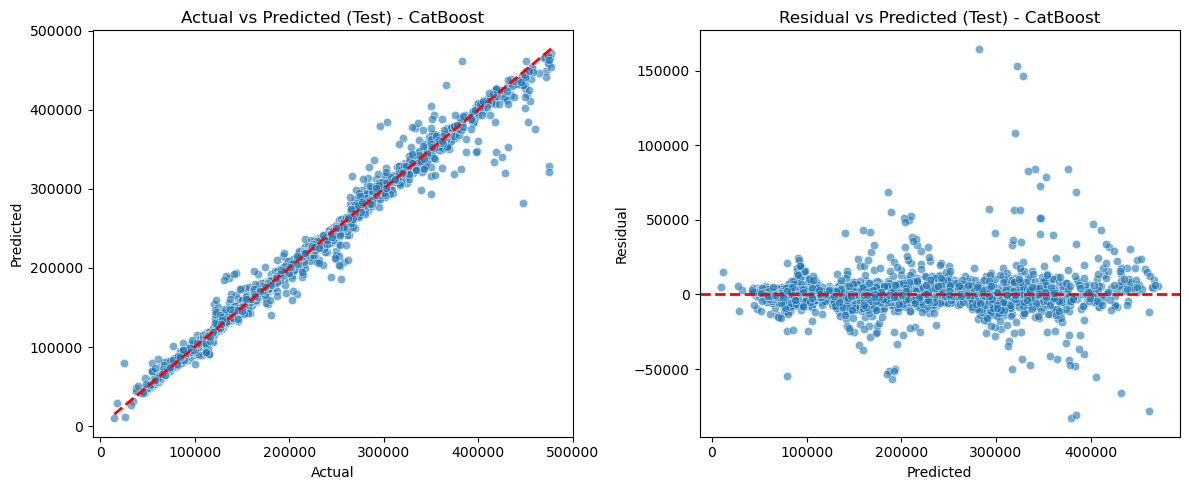

In [64]:
y_test_pred_cat = random_search_cat.best_estimator_.predict(X_test)

residuals_cat = y_test - y_test_pred_cat

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=y_test, y=y_test_pred_cat, alpha=0.6, ax=axes[0])
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].set_title("Actual vs Predicted (Test) - CatBoost")

sns.scatterplot(x=y_test_pred_cat, y=residuals_cat, alpha=0.6, ax=axes[1])
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residual")
axes[1].set_title("Residual vs Predicted (Test) - CatBoost")

plt.tight_layout()
plt.show()

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:120%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Model Comparison before and after Tuning</div>

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight for Actual vs Predicted Plot</b>
<li>Prediction Consistency: After tuning, the CatBoost model demonstrates a stronger alignment between actual and predicted values, with points clustering more closely around the diagonal line, reducing variance and minimizing inconsistencies, whereas the untuned model exhibits a wider spread, indicating higher variability in predictions.</li> 
<li>Correlation: The correlation between actual and predicted values improves slightly after tuning, as the tuned CatBoost model shows a tighter fit along the diagonal, with fewer deviations, enhancing its ability to capture the underlying patterns in the data compared to the untuned model, which displays more noticeable discrepancies.</li> 
<li>Outliers: The untuned CatBoost model produces more extreme outliers, where certain data points significantly deviate from the diagonal line, suggesting higher prediction errors, while the tuned model reduces the frequency and magnitude of these outliers, leading to improved robustness and better generalization to unseen data.</li>

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight for Residual vs Predicted Plot</b>
<li>Residuals Distribution: After tuning, the residuals exhibit a more compact distribution around zero, reducing variability and improving the model’s stability, whereas before tuning, the residuals were more widely dispersed, indicating greater inconsistency in predictions across different predicted values.</li> <li>Zero-Centered Residuals Line: The residuals after tuning adhere more closely to the zero-centered baseline, minimizing systematic biases and ensuring a more balanced distribution, whereas before tuning, the residuals showed more pronounced deviations from zero, suggesting underlying biases in the model’s predictions.</li> <li>Flat Regression Line: The regression line in the residual plot is flatter after tuning, confirming a more even error distribution and improved homoscedasticity, while before tuning, the residuals displayed a noticeable pattern, with errors increasing at higher predicted values, suggesting inconsistencies in variance.</li> 
<li>Outliers: The frequency and severity of outliers are reduced after tuning, as fewer residuals deviate significantly from the baseline, whereas before tuning, more extreme residuals were present, indicating higher prediction errors and reduced generalization capability.</li>

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight for Metrics</b>
<li>Model Performance on Training Data vs Test Data: After tuning, CatBoost demonstrates improved learning efficiency with a lower training error, but the test error remains relatively stable, indicating that the model has optimized its fit while maintaining generalization.</li>
<li>Error Metrics (MAE and MAPE): The MAE and MAPE values decrease in training, reflecting improved prediction accuracy, while the test MAE slightly increases, suggesting that although the model performs better on seen data, its predictive accuracy on unseen data remains similar to before tuning.</li>
<li>Model Fit (R² Score): The R² score improves to 0.9984 on the training set, indicating near-perfect data representation, while the test R² remains high at 0.9863, confirming that the model effectively captures the dataset’s underlying relationships without excessive performance degradation.</li>
<li>Model Complexity: The increase in training performance without a significant drop in test performance suggests a mild increase in complexity, with a slight risk of overfitting, but the model still generalizes well to new data.</li>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">LightGBM</div>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Parameter Selection</div>

>1. model__n_estimators: The number of boosting iterations is set to [100, 200, 300, 500] to balance training speed and performance, allowing the model to learn effectively without excessive overfitting.
>2. model__learning_rate: The learning rate values [0.01, 0.05, 0.1, 0.2] are chosen to explore a range from slow, stable learning to faster convergence while avoiding divergence.
>3. model__max_depth: Depth values [4, 6, 8, 10, -1] control tree complexity, where shallower trees prevent overfitting, and deeper trees allow better capture of complex patterns.
>4. model__num_leaves: The number of leaves [31, 50, 100, 150] affects model complexity, with more leaves allowing better feature interactions at the cost of higher risk of overfitting.
>5. model__min_child_samples: The minimum number of samples per leaf node [10, 20, 30] is set to control tree splitting, preventing overfitting by requiring sufficient data to form a leaf.
>6. model__reg_alpha: L1 regularization values [0, 0.1, 0.5, 1] are included to prevent overfitting by adding constraints on feature importance and model complexity.
>7. model__reg_lambda: L2 regularization values [0, 0.1, 0.5, 1] help reduce overfitting by penalizing large weights, improving model generalization.
>8. model__subsample: The fraction of data used per boosting iteration [0.8, 0.9, 1.0] is chosen to prevent overfitting while maintaining model robustness.

In [65]:
X = df.drop('median_house_value', axis = 1) 
y = df['median_house_value'] 

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:120%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Preprocessing</div>

In [67]:
onehot_cols = ['ocean_proximity', 'age_category', 'is_urban', 'is_high_density', 'city']
ordinal_cols = ['income_category', 'ocean_proximity_category', 'house_size_category', 
                'price_category', 'is_coastal', 'is_affluent', 'is_luxury']
ordinal_categories = [
    ['Low', 'Medium', 'High'],  
    ['Inland', 'Coastal'],  
    ['Small', 'Medium', 'Large'],  
    ['Low', 'Medium', 'High'], 
    ['NOT COASTAL', 'COASTAL'], 
    ['Not Affluent', 'Affluent'], 
    ['Not Luxury', 'Luxury']   
]
standard_scaler_cols = ['latitude', 'longitude', 'housing_median_age', 'rooms_per_household', 
                        'bedrooms_per_room', 'population_per_household']
robust_scaler_cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 
                      'median_income', 'income_per_household', 'price_per_room', 
                      'rooms_per_person', 'bedrooms_per_person']

onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
ordinal_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder(categories=ordinal_categories))])
standard_scaler_transformer = Pipeline(steps=[('standard_scaler', StandardScaler())])
robust_scaler_transformer = Pipeline(steps=[('robust_scaler', RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_transformer, onehot_cols),
        ('ordinal', ordinal_transformer, ordinal_cols),
        ('standard_scaler', standard_scaler_transformer, standard_scaler_cols),
        ('robust_scaler', robust_scaler_transformer, robust_scaler_cols)
    ],
    remainder='drop'
)

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:120%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Model Evaluation</div>

In [68]:
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

model = LGBMRegressor(random_state=10, verbose=-1)  

param_dist = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_depth': [4, 6, 8, 10, -1],  
    'model__num_leaves': [31, 50, 100, 150],  
    'model__min_child_samples': [10, 20, 30], 
    'model__reg_alpha': [0, 0.1, 0.5, 1],  
    'model__reg_lambda': [0, 0.1, 0.5, 1], 
    'model__subsample': [0.8, 0.9, 1.0] 
}

pipeline = Pipeline([
    ('preprocessor', preprocessor),  
    ('model', model)
])

cv = KFold(n_splits=5, shuffle=True, random_state=10)

random_search_lgbm = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=cv,
    scoring={'neg_mae': 'neg_mean_absolute_error', 'neg_mape': mape_scorer, 'r2': 'r2'},
    refit='neg_mae',  
    random_state=10,
    n_jobs=-1
)

start_time = time.time()
print("Training LightGBM with hyperparameter tuning...")
random_search_lgbm.fit(X_train, y_train)  
end_time = time.time()

fitting_time = end_time - start_time
print(f"Total fitting time: {fitting_time:.2f} seconds")

print("\nBest Parameters:", random_search_lgbm.best_params_)

y_train_pred = random_search_lgbm.predict(X_train)
y_test_pred = random_search_lgbm.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

cv_mae_train, cv_mae_test = [], []
cv_mape_train, cv_mape_test = [], []
cv_r2_train, cv_r2_test = [], []

kf = KFold(n_splits=5, shuffle=True, random_state=10)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
    print(f"Processing Fold {fold}...")
    
    X_fold_train, y_fold_train = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_fold_val, y_fold_val = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    random_search_lgbm.best_estimator_.fit(X_fold_train, y_fold_train)
    
    y_fold_train_pred = random_search_lgbm.best_estimator_.predict(X_fold_train)
    y_fold_val_pred = random_search_lgbm.best_estimator_.predict(X_fold_val)
    
    y_fold_test_pred = random_search_lgbm.best_estimator_.predict(X_test)
    
    cv_mae_train.append(mean_absolute_error(y_fold_train, y_fold_train_pred))
    cv_mape_train.append(mean_absolute_percentage_error(y_fold_train, y_fold_train_pred))
    cv_r2_train.append(r2_score(y_fold_train, y_fold_train_pred))
    
    cv_mae_test.append(mean_absolute_error(y_test, y_fold_test_pred))
    cv_mape_test.append(mean_absolute_percentage_error(y_test, y_fold_test_pred))
    cv_r2_test.append(r2_score(y_test, y_fold_test_pred))

std_mae_train = np.std(cv_mae_train)
std_mae_test = np.std(cv_mae_test)
std_mape_train = np.std(cv_mape_train)
std_mape_test = np.std(cv_mape_test)
std_r2_train = np.std(cv_r2_train)
std_r2_test = np.std(cv_r2_test)

metrics_summary = {
    "Metric": ["Overall", "CV1", "CV2", "CV3", "CV4", "CV5", "Std Dev"],
    "MAE Train": [train_mae] + cv_mae_train + [std_mae_train],
    "MAE Test": [test_mae] + cv_mae_test + [std_mae_test],
    "MAPE Train": [train_mape] + cv_mape_train + [std_mape_train],
    "MAPE Test": [test_mape] + cv_mape_test + [std_mape_test],
    "R² Train": [train_r2] + cv_r2_train + [std_r2_train],
    "R² Test": [test_r2] + cv_r2_test + [std_r2_test]
}

lgbm_tuned = pd.DataFrame(metrics_summary)
print("\nMetrics Summary:")
lgbm_tuned

Training LightGBM with hyperparameter tuning...
Total fitting time: 151.68 seconds

Best Parameters: {'model__subsample': 0.9, 'model__reg_lambda': 0, 'model__reg_alpha': 0.1, 'model__num_leaves': 150, 'model__n_estimators': 500, 'model__min_child_samples': 10, 'model__max_depth': 6, 'model__learning_rate': 0.2}
Processing Fold 1...
Processing Fold 2...
Processing Fold 3...
Processing Fold 4...
Processing Fold 5...

Metrics Summary:


Metric    MAE Train     MAE Test  MAPE Train  MAPE Test  R² Train  \
0  Overall  1123.632698  5923.189270    0.007015   0.033306  0.999747   
1      CV1   981.018571  6702.793578    0.006070   0.038459  0.999807   
2      CV2   959.982491  6648.577632    0.005924   0.037493  0.999814   
3      CV3   929.353526  6562.044564    0.005861   0.037056  0.999826   
4      CV4   919.610591  6466.335763    0.005658   0.037165  0.999829   
5      CV5   981.697076  6566.964382    0.006089   0.037405  0.999804   
6  Std Dev    25.777699    80.940179    0.000157   0.000497  0.000010   

    R² Test  
0  0.986062  
1  0.983191  
2  0.984229  
3  0.983663  
4  0.984633  
5  0.983583  
6  0.000509

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:120%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Hyperparameter Tuning Visualization</div>

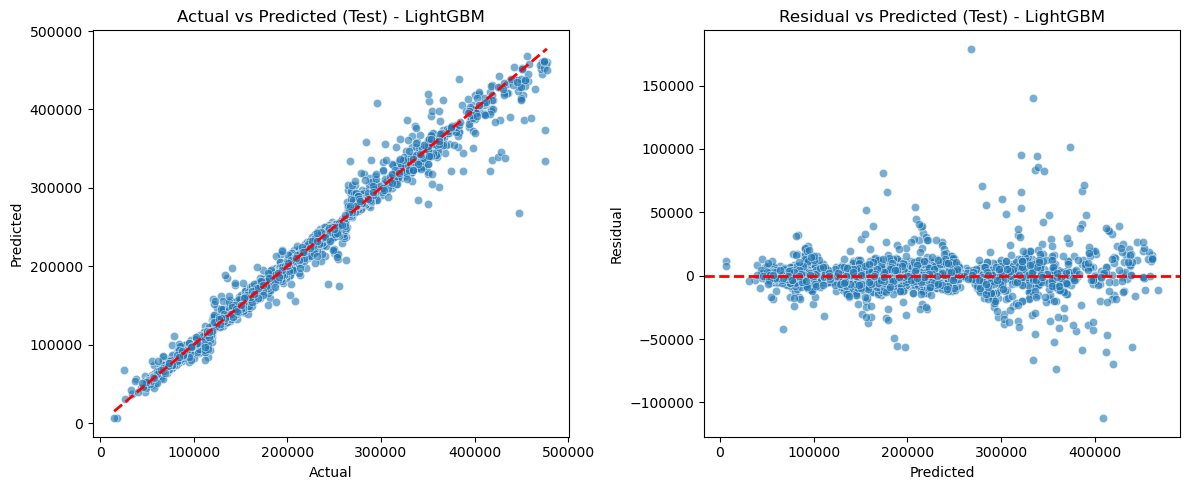

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi dari model terbaik
y_test_pred_lgbm = random_search_lgbm.best_estimator_.predict(X_test)

# Menghitung residual
residuals_lgbm = y_test - y_test_pred_lgbm

# Membuat figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Actual vs Predicted
sns.scatterplot(x=y_test, y=y_test_pred_lgbm, alpha=0.6, ax=axes[0])
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].set_title("Actual vs Predicted (Test) - LightGBM")

# Plot Residual vs Predicted
sns.scatterplot(x=y_test_pred_lgbm, y=residuals_lgbm, alpha=0.6, ax=axes[1])
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residual")
axes[1].set_title("Residual vs Predicted (Test) - LightGBM")

plt.tight_layout()
plt.show()

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:120%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Model Comparison before and after Tuning</div>

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight for Actual vs Predicted Plot</b>
    <li>Prediction Consistency: After tuning, the predicted values exhibit a much stronger alignment with the actual values, as seen in the reduced spread around the diagonal line, indicating greater stability and lower variance across different data ranges.</li> 
    <li>Correlation: The correlation between actual and predicted values improves after tuning, with data points clustering more densely along the diagonal trend line, demonstrating that the model better captures the underlying patterns in the data and reduces systematic prediction errors.</li> 
    <li>Outliers: The number of extreme outliers decreases after tuning, as fewer data points deviate significantly from the expected trend, suggesting that the model has enhanced its generalization ability and reduced the frequency of large prediction errors.</li>

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight for Residual vs Predicted Plot</b>
<li>Residuals Distribution: After tuning, the residuals exhibit a more balanced distribution around zero with a narrower spread, reducing the presence of systematic errors and indicating that predictions are more accurate across different predicted values.</li> 
<li>Zero-Centered Residuals Line: The residuals are more evenly dispersed around the zero-centered line after tuning, minimizing directional bias and ensuring that the model does not consistently overpredict or underpredict.</li> 
<li>Flat Regression Line: The regression line remains flat after tuning, but it aligns more closely with the zero baseline, confirming that prediction errors are more randomly distributed rather than showing patterns of systematic deviation.</li> 
<li>Outliers: The frequency and severity of extreme residuals decrease after tuning, demonstrating that the model is better at handling diverse data points and reducing large errors that could negatively impact overall predictive performance.</li>

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight for Metrics</b>
<li>Model Performance on Training Data vs Test Data: After tuning, LightGBM exhibits a significant reduction in training error, showing that it has learned the dataset more effectively, while the test error remains stable, indicating that generalization is preserved.</li>
<li>Error Metrics (MAE and MAPE): The MAE and MAPE values drop substantially in training, reflecting improved accuracy on known data, whereas the test MAE and MAPE remain relatively similar, suggesting that the model’s predictive performance on unseen data has not degraded.</li>
<li>Model Fit (R² Score): The R² score reaches 0.9997 on the training set, indicating an almost perfect fit, while the test R² remains high at 0.9861, suggesting that despite the high training accuracy, the model still generalizes well.</li>
<li>Model Complexity: The large gap between training and test performance suggests increased complexity, with a stronger tendency toward overfitting, though the test R² value confirms that the model still maintains a reasonable balance between learning and generalization.</li>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">HistGradientBoosting</div>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Parameter Selection</div>

>1. model__max_iter: The number of boosting iterations [100, 200, 300, 500] is set to balance computational efficiency and model performance, ensuring sufficient learning while avoiding excessive training time.
>2. model__learning_rate: The learning rate values [0.01, 0.05, 0.1, 0.2] control the step size in weight updates, balancing slow convergence for stability and faster learning for efficiency.
>3. model__max_depth: The maximum depth [4, 6, 8, 10, None] limits tree complexity, where shallower trees generalize better, and deeper trees capture complex patterns but risk overfitting.
>4. model__min_samples_leaf: The minimum number of samples required in a leaf node [10, 20, 30] prevents overfitting by ensuring each leaf has enough data to generalize well.
>5. model__l2_regularization: L2 regularization values [0, 0.1, 0.5, 1] help control overfitting by penalizing large coefficients, improving model generalization.
>6. model__max_leaf_nodes: The maximum number of leaf nodes [31, 50, 100, 150] restricts tree complexity, balancing model expressiveness and preventing overfitting.
>7. model__max_bins: The number of bins for feature discretization [64, 128, 255] determines how continuous variables are split, where more bins allow finer granularity but increase computational cost.

In [70]:
X = df.drop('median_house_value', axis = 1) 
y = df['median_house_value'] 

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:120%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Preprocessing</div>

In [72]:
onehot_cols = ['ocean_proximity', 'age_category', 'is_urban', 'is_high_density', 'city']
ordinal_cols = ['income_category', 'ocean_proximity_category', 'house_size_category', 
                'price_category', 'is_coastal', 'is_affluent', 'is_luxury']
ordinal_categories = [
    ['Low', 'Medium', 'High'],  
    ['Inland', 'Coastal'],  
    ['Small', 'Medium', 'Large'],  
    ['Low', 'Medium', 'High'], 
    ['NOT COASTAL', 'COASTAL'], 
    ['Not Affluent', 'Affluent'], 
    ['Not Luxury', 'Luxury']   
]
standard_scaler_cols = ['latitude', 'longitude', 'housing_median_age', 'rooms_per_household', 
                        'bedrooms_per_room', 'population_per_household']
robust_scaler_cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 
                      'median_income', 'income_per_household', 'price_per_room', 
                      'rooms_per_person', 'bedrooms_per_person']

onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
ordinal_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder(categories=ordinal_categories))])
standard_scaler_transformer = Pipeline(steps=[('standard_scaler', StandardScaler())])
robust_scaler_transformer = Pipeline(steps=[('robust_scaler', RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_transformer, onehot_cols),
        ('ordinal', ordinal_transformer, ordinal_cols),
        ('standard_scaler', standard_scaler_transformer, standard_scaler_cols),
        ('robust_scaler', robust_scaler_transformer, robust_scaler_cols)
    ],
    remainder='drop'
)

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:120%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Model Evaluation</div>

In [73]:
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

model = HistGradientBoostingRegressor(random_state=10, verbose=0)  

param_dist = {
    'model__max_iter': [100, 200, 300, 500],  
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2], 
    'model__max_depth': [4, 6, 8, 10, None], 
    'model__min_samples_leaf': [10, 20, 30], 
    'model__l2_regularization': [0, 0.1, 0.5, 1],  
    'model__max_leaf_nodes': [31, 50, 100, 150],  
    'model__max_bins': [64, 128, 255]  
}

pipeline = Pipeline([
    ('preprocessor', preprocessor),  
    ('model', model)
])

cv = KFold(n_splits=5, shuffle=True, random_state=10)

random_search_hgb = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=cv,
    scoring={'neg_mae': 'neg_mean_absolute_error', 'neg_mape': mape_scorer, 'r2': 'r2'},
    refit='neg_mae',  
    random_state=10,
    n_jobs=-1
)

start_time = time.time()
print("Training HistGradientBoosting with hyperparameter tuning...")
random_search_hgb.fit(X_train, y_train)  
end_time = time.time()

fitting_time = end_time - start_time
print(f"Total fitting time: {fitting_time:.2f} seconds")

print("\nBest Parameters:", random_search_hgb.best_params_)

y_train_pred = random_search_hgb.predict(X_train)
y_test_pred = random_search_hgb.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

cv_mae_train, cv_mae_test = [], []
cv_mape_train, cv_mape_test = [], []
cv_r2_train, cv_r2_test = [], []

kf = KFold(n_splits=5, shuffle=True, random_state=10)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
    print(f"Processing Fold {fold}...")
    
    X_fold_train, y_fold_train = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_fold_val, y_fold_val = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    random_search_hgb.best_estimator_.fit(X_fold_train, y_fold_train)
    
    y_fold_train_pred = random_search_hgb.best_estimator_.predict(X_fold_train)
    y_fold_val_pred = random_search_hgb.best_estimator_.predict(X_fold_val)
    
    y_fold_test_pred = random_search_hgb.best_estimator_.predict(X_test)
    
    cv_mae_train.append(mean_absolute_error(y_fold_train, y_fold_train_pred))
    cv_mape_train.append(mean_absolute_percentage_error(y_fold_train, y_fold_train_pred))
    cv_r2_train.append(r2_score(y_fold_train, y_fold_train_pred))
    
    cv_mae_test.append(mean_absolute_error(y_test, y_fold_test_pred))
    cv_mape_test.append(mean_absolute_percentage_error(y_test, y_fold_test_pred))
    cv_r2_test.append(r2_score(y_test, y_fold_test_pred))

std_mae_train = np.std(cv_mae_train)
std_mae_test = np.std(cv_mae_test)
std_mape_train = np.std(cv_mape_train)
std_mape_test = np.std(cv_mape_test)
std_r2_train = np.std(cv_r2_train)
std_r2_test = np.std(cv_r2_test)

metrics_summary = {
    "Metric": ["Overall", "CV1", "CV2", "CV3", "CV4", "CV5", "Std Dev"],
    "MAE Train": [train_mae] + cv_mae_train + [std_mae_train],
    "MAE Test": [test_mae] + cv_mae_test + [std_mae_test],
    "MAPE Train": [train_mape] + cv_mape_train + [std_mape_train],
    "MAPE Test": [test_mape] + cv_mape_test + [std_mape_test],
    "R² Train": [train_r2] + cv_r2_train + [std_r2_train],
    "R² Test": [test_r2] + cv_r2_test + [std_r2_test]
}

hgb_tuned = pd.DataFrame(metrics_summary)
print("\nMetrics Summary:")
hgb_tuned

Training HistGradientBoosting with hyperparameter tuning...
Total fitting time: 128.56 seconds

Best Parameters: {'model__min_samples_leaf': 30, 'model__max_leaf_nodes': 31, 'model__max_iter': 500, 'model__max_depth': 10, 'model__max_bins': 255, 'model__learning_rate': 0.1, 'model__l2_regularization': 1}
Processing Fold 1...
Processing Fold 2...
Processing Fold 3...
Processing Fold 4...
Processing Fold 5...

Metrics Summary:


Metric    MAE Train     MAE Test  MAPE Train  MAPE Test  R² Train  \
0  Overall  4701.575139  6638.605800    0.027308   0.037418  0.993850   
1      CV1  2823.870365  6371.515328    0.016396   0.034828  0.998135   
2      CV2  2732.775157  6253.779742    0.016075   0.034678  0.998354   
3      CV3  2777.887831  6295.557411    0.016403   0.034306  0.998273   
4      CV4  2770.411217  6347.411155    0.016095   0.035091  0.998227   
5      CV5  2746.250004  6245.590145    0.016062   0.033643  0.998241   
6  Std Dev    31.349223    49.880568    0.000158   0.000502  0.000071   

    R² Test  
0  0.984908  
1  0.984692  
2  0.985011  
3  0.984614  
4  0.985369  
5  0.984647  
6  0.000288

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:120%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Hyperparameter Tuning Visualization</div>

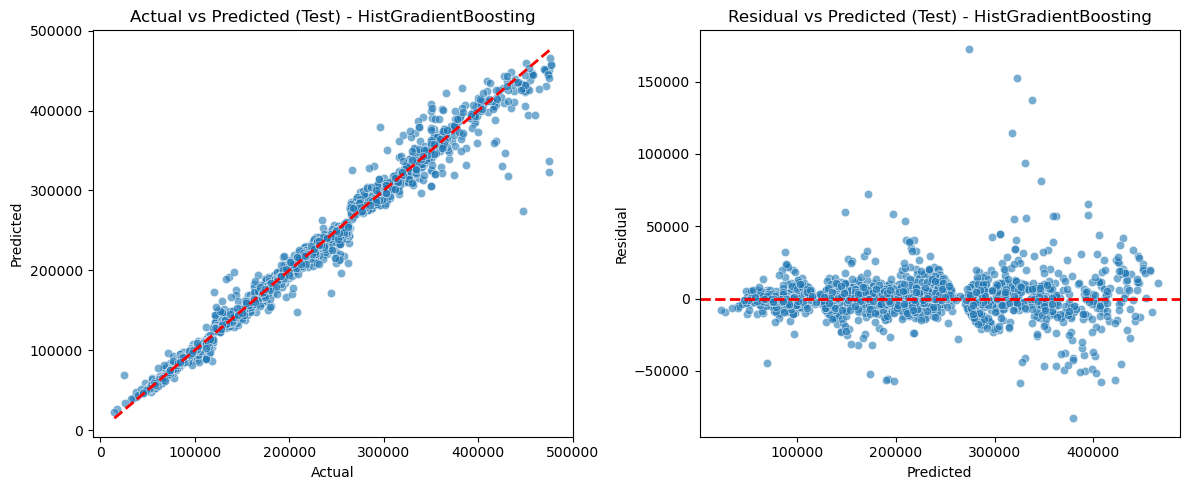

In [74]:
y_test_pred_hgb = random_search_hgb.best_estimator_.predict(X_test)

# Menghitung residual
residuals_hgb = y_test - y_test_pred_hgb

# Membuat figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Actual vs Predicted
sns.scatterplot(x=y_test, y=y_test_pred_hgb, alpha=0.6, ax=axes[0])
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].set_title("Actual vs Predicted (Test) - HistGradientBoosting")

# Plot Residual vs Predicted
sns.scatterplot(x=y_test_pred_hgb, y=residuals_hgb, alpha=0.6, ax=axes[1])
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residual")
axes[1].set_title("Residual vs Predicted (Test) - HistGradientBoosting")

plt.tight_layout()
plt.show()


<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:120%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Model Comparison before and after Tuning</div>

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight for Actual vs Predicted Plot</b>
<li>Prediction Consistency: After tuning, the predictions exhibit a significantly tighter alignment with the actual values, as the spread of points around the diagonal line has noticeably decreased, demonstrating improved reliability across different data ranges and minimizing variability in predictions.</li> <li>Correlation: The correlation between actual and predicted values has strengthened after tuning, with a higher concentration of points closely following the diagonal trend, indicating that the model has better captured the underlying relationships in the data and reduced systematic deviations.</li> 
<li>Outliers: After tuning, both the frequency and magnitude of extreme outliers have decreased slightly, as fewer points deviate significantly from the expected trend, suggesting that the model is now more robust in handling unusual data points and reducing large residual errors.</li>

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight for Residual vs Predicted Plot</b>
<li>Residuals Distribution: After tuning, the residuals exhibit a more uniform spread across the range of predicted values, reducing concentrated clusters of errors and enhancing the overall randomness of residual dispersion, which indicates a better-calibrated model.</li> 
<li>Zero-Centered Residual Line: The residuals are more symmetrically distributed around the zero line after tuning, with fewer systematic deviations, demonstrating an improved balance between over- and under-predictions and a reduction in inherent model bias.</li> 
<li>Flat Regression Line: The red regression line remains relatively flat in both cases, but after tuning, it aligns more consistently along the zero axis, confirming that the residuals exhibit minimal systematic trends and that the model no longer favors specific ranges of predicted values.</li> 
<li>Outliers: After tuning, the number of extreme residuals has decreased slightly, with fewer points deviating significantly from the zero line, indicating that the model has improved in handling unusual cases and reducing high-magnitude prediction errors.</li>

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight for Metrics</b>
<li>Model Performance on Training Data vs Test Data: After tuning, the HistGradientBoosting model shows a noticeable reduction in training error while maintaining a relatively stable test error, indicating an improvement in learning while preserving generalization.</li>
<li>Error Metrics (MAE and MAPE): The MAE and MAPE values decrease in both training and test sets, suggesting an overall enhancement in predictive accuracy, though the gap between training and test errors indicates some level of overfitting.</li>
<li>Model Fit (R² Score): The R² score improves to 0.9939 on the training set, showing a strong ability to capture patterns in the data, while the test R² remains high at 0.9849, suggesting that the model retains good predictive power on unseen data.</li>
<li>Model Complexity: While the model has improved in accuracy, the higher R² on training data compared to test data suggests slight overfitting, though not as severe as in some more complex models.</li>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">XGBoost</div>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Parameter Selection</div>

>1. model__n_estimators: The number of boosting rounds [100, 200, 300, 500] balances between sufficient training and computational efficiency, ensuring better learning without excessive overfitting.
>2. model__learning_rate: The step size [0.01, 0.05, 0.1, 0.2] controls how much each tree contributes to the final prediction, with lower values improving stability and higher values speeding up convergence.
>3. model__max_depth: The tree depth [4, 6, 8, 10] determines model complexity, where deeper trees capture intricate patterns but risk overfitting, while shallower trees improve generalization.
>4. model__min_child_weight: The minimum sum of instance weights in a leaf node [1, 3, 5] prevents small sample splits, improving robustness against noise and reducing overfitting.
>5. model__gamma: The minimum loss reduction required for a split [0, 0.1, 0.2] helps prune unnecessary splits, enhancing regularization and preventing excessive branching.
>6. model__subsample: The fraction of samples used per boosting round [0.8, 0.9, 1.0] prevents overfitting by training each tree on a subset of data, improving generalization.
>7. model__colsample_bytree: The fraction of features randomly chosen per tree [0.8, 0.9, 1.0] ensures feature diversity in splits, preventing model reliance on specific variables.
>8. model__reg_alpha: The L1 regularization strength [0, 0.1, 0.5, 1] sparsifies features by adding penalties to large coefficients, reducing complexity and enhancing generalization.
>9. model__reg_lambda: The L2 regularization strength [0, 0.1, 0.5, 1] penalizes large weights to prevent overfitting, improving model stability and robustness.

In [75]:
X = df.drop('median_house_value', axis = 1) 
y = df['median_house_value'] 

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:120%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Preprocessing</div>

In [77]:
onehot_cols = ['ocean_proximity', 'age_category', 'is_urban', 'is_high_density', 'city']
ordinal_cols = ['income_category', 'ocean_proximity_category', 'house_size_category', 
                'price_category', 'is_coastal', 'is_affluent', 'is_luxury']
ordinal_categories = [
    ['Low', 'Medium', 'High'],  
    ['Inland', 'Coastal'],  
    ['Small', 'Medium', 'Large'],  
    ['Low', 'Medium', 'High'], 
    ['NOT COASTAL', 'COASTAL'], 
    ['Not Affluent', 'Affluent'], 
    ['Not Luxury', 'Luxury']   
]
standard_scaler_cols = ['latitude', 'longitude', 'housing_median_age', 'rooms_per_household', 
                        'bedrooms_per_room', 'population_per_household']
robust_scaler_cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 
                      'median_income', 'income_per_household', 'price_per_room', 
                      'rooms_per_person', 'bedrooms_per_person']

onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
ordinal_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder(categories=ordinal_categories))])
standard_scaler_transformer = Pipeline(steps=[('standard_scaler', StandardScaler())])
robust_scaler_transformer = Pipeline(steps=[('robust_scaler', RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_transformer, onehot_cols),
        ('ordinal', ordinal_transformer, ordinal_cols),
        ('standard_scaler', standard_scaler_transformer, standard_scaler_cols),
        ('robust_scaler', robust_scaler_transformer, robust_scaler_cols)
    ],
    remainder='drop'
)

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:120%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Model Evaluation</div>

In [78]:
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Initialize XGBRegressor
model = XGBRegressor(random_state=10, verbosity=0)  

param_dist = {
    'model__n_estimators': [100, 200, 300, 500],  
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'model__max_depth': [4, 6, 8, 10],  
    'model__min_child_weight': [1, 3, 5], 
    'model__gamma': [0, 0.1, 0.2], 
    'model__subsample': [0.8, 0.9, 1.0], 
    'model__colsample_bytree': [0.8, 0.9, 1.0],  
    'model__reg_alpha': [0, 0.1, 0.5, 1], 
    'model__reg_lambda': [0, 0.1, 0.5, 1]  
}

pipeline = Pipeline([
    ('preprocessor', preprocessor),  
    ('model', model)
])

cv = KFold(n_splits=5, shuffle=True, random_state=10)

random_search_xgb = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=cv,
    scoring={'neg_mae': 'neg_mean_absolute_error', 'neg_mape': mape_scorer, 'r2': 'r2'},
    refit='neg_mae',  
    random_state=10,
    n_jobs=-1
)

start_time = time.time()
print("Training XGBoost with hyperparameter tuning...")
random_search_xgb.fit(X_train, y_train)  
end_time = time.time()

fitting_time = end_time - start_time
print(f"Total fitting time: {fitting_time:.2f} seconds")

print("\nBest Parameters:", random_search_xgb.best_params_)

y_train_pred = random_search_xgb.predict(X_train)
y_test_pred = random_search_xgb.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

cv_mae_train, cv_mae_test = [], []
cv_mape_train, cv_mape_test = [], []
cv_r2_train, cv_r2_test = [], []

kf = KFold(n_splits=5, shuffle=True, random_state=10)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
    print(f"Processing Fold {fold}...")
    
    X_fold_train, y_fold_train = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_fold_val, y_fold_val = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    random_search_xgb.best_estimator_.fit(X_fold_train, y_fold_train)
    
    y_fold_train_pred = random_search_xgb.best_estimator_.predict(X_fold_train)
    y_fold_val_pred = random_search_xgb.best_estimator_.predict(X_fold_val)
    
    y_fold_test_pred = random_search_xgb.best_estimator_.predict(X_test)
    
    cv_mae_train.append(mean_absolute_error(y_fold_train, y_fold_train_pred))
    cv_mape_train.append(mean_absolute_percentage_error(y_fold_train, y_fold_train_pred))
    cv_r2_train.append(r2_score(y_fold_train, y_fold_train_pred))
    
    cv_mae_test.append(mean_absolute_error(y_test, y_fold_test_pred))
    cv_mape_test.append(mean_absolute_percentage_error(y_test, y_fold_test_pred))
    cv_r2_test.append(r2_score(y_test, y_fold_test_pred))

std_mae_train = np.std(cv_mae_train)
std_mae_test = np.std(cv_mae_test)
std_mape_train = np.std(cv_mape_train)
std_mape_test = np.std(cv_mape_test)
std_r2_train = np.std(cv_r2_train)
std_r2_test = np.std(cv_r2_test)

metrics_summary = {
    "Metric": ["Overall", "CV1", "CV2", "CV3", "CV4", "CV5", "Std Dev"],
    "MAE Train": [train_mae] + cv_mae_train + [std_mae_train],
    "MAE Test": [test_mae] + cv_mae_test + [std_mae_test],
    "MAPE Train": [train_mape] + cv_mape_train + [std_mape_train],
    "MAPE Test": [test_mape] + cv_mape_test + [std_mape_test],
    "R² Train": [train_r2] + cv_r2_train + [std_r2_train],
    "R² Test": [test_r2] + cv_r2_test + [std_r2_test]
}

xgb_tuned = pd.DataFrame(metrics_summary)
print("\nMetrics Summary:")
xgb_tuned

Training XGBoost with hyperparameter tuning...
Total fitting time: 97.94 seconds

Best Parameters: {'model__subsample': 0.9, 'model__reg_lambda': 0.5, 'model__reg_alpha': 1, 'model__n_estimators': 300, 'model__min_child_weight': 3, 'model__max_depth': 6, 'model__learning_rate': 0.1, 'model__gamma': 0.2, 'model__colsample_bytree': 0.9}
Processing Fold 1...
Processing Fold 2...
Processing Fold 3...
Processing Fold 4...
Processing Fold 5...

Metrics Summary:


Metric    MAE Train     MAE Test  MAPE Train  MAPE Test  R² Train  \
0  Overall  2567.389558  6259.414083    0.015616   0.035569  0.998623   
1      CV1  2446.559146  6731.187000    0.015101   0.038721  0.998823   
2      CV2  2276.491764  6362.883205    0.013866   0.035771  0.998967   
3      CV3  2251.485461  6496.033949    0.013981   0.036989  0.998990   
4      CV4  2404.076332  6512.529711    0.014606   0.037564  0.998852   
5      CV5  2415.137903  6663.776319    0.014852   0.037633  0.998820   
6  Std Dev    79.014703   130.421604    0.000483   0.000962  0.000073   

    R² Test  
0  0.984643  
1  0.982998  
2  0.984618  
3  0.982945  
4  0.985116  
5  0.983317  
6  0.000895

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:120%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Hyperparameter Tuning Visualization</div>

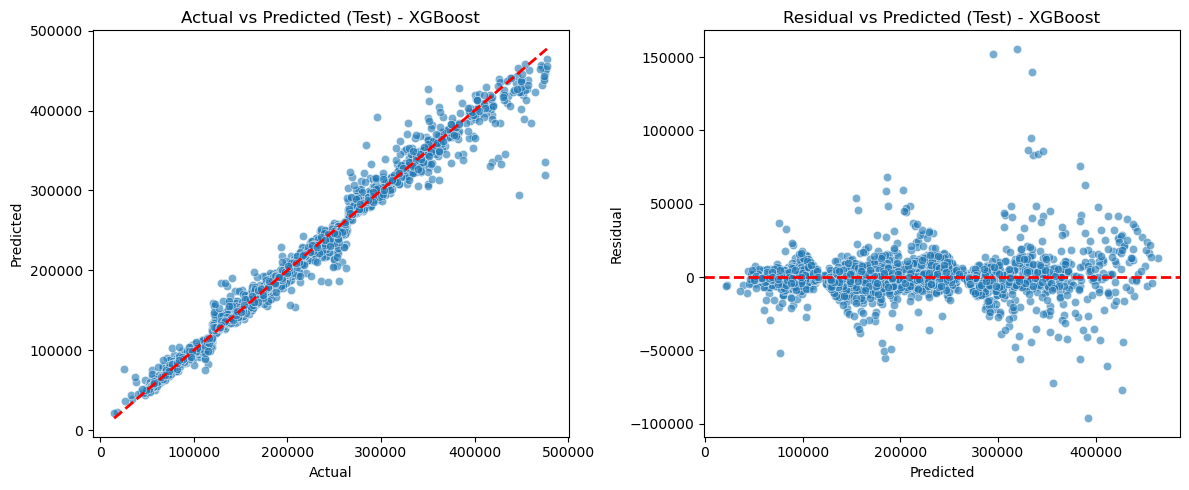

In [79]:
y_test_pred_xgb = random_search_xgb.best_estimator_.predict(X_test)

# Menghitung residual
residuals_xgb = y_test - y_test_pred_xgb

# Membuat figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Actual vs Predicted
sns.scatterplot(x=y_test, y=y_test_pred_xgb, alpha=0.6, ax=axes[0])
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].set_title("Actual vs Predicted (Test) - XGBoost")

# Plot Residual vs Predicted
sns.scatterplot(x=y_test_pred_xgb, y=residuals_xgb, alpha=0.6, ax=axes[1])
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residual")
axes[1].set_title("Residual vs Predicted (Test) - XGBoost")

plt.tight_layout()
plt.show()

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:120%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Model Comparison before and after Tuning</div>

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight for Actual vs Predicted Plot</b>
    <li>Prediction consistency: After tuning, the predictions demonstrate greater stability and reliability, as the data points cluster more tightly along the diagonal line, reducing both spread and variance across different actual value ranges, leading to more consistent estimations with fewer extreme deviations.</li>
    <li>Correlation: The alignment between actual and predicted values has significantly improved after tuning, with the majority of points adhering more closely to the ideal diagonal trend, indicating that the model has better captured underlying data patterns, resulting in a stronger linear correlation and minimized systematic errors.</li>
    <li>Outliers: The frequency of extreme deviations from the main trend has decreased after tuning, as fewer points are positioned far from the regression line, showing that the model has enhanced its ability to handle outliers, mitigate large prediction errors, and improve generalization to unseen data.</li>

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight for Residual vs Predicted Plot</b>
    <li>Residuals distribution: After tuning, the residuals exhibit a more balanced and concentrated distribution around zero, reducing heteroscedasticity and leading to a more uniform spread across predicted values.</li>
    <li>Zero-centered residual line: The residuals are more symmetrically distributed around the zero line after tuning, with a reduced overall deviation, indicating an improvement in bias correction and more accurate predictions.</li>
    <li>Flat regression line: The residual trend remains closer to a flat horizontal line after tuning, suggesting that systematic errors have been minimized and no strong patterns remain in the residuals, reinforcing the model’s improved predictive reliability.</li>
    <li>Outliers: The number of extreme residuals has slightly decreased after tuning, with fewer points exhibiting large deviations from the zero line, indicating better robustness in handling anomalous predictions.</li>

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight for Metrics</b>
<li>Model Performance on Training Data vs Test Data: After tuning, the XGBoost model exhibits a significant reduction in training error while maintaining a relatively stable test error, indicating improved learning efficiency with strong generalization.</li>
<li>Error Metrics (MAE and MAPE): The MAE and MAPE values decrease in both the training and test sets, demonstrating better predictive accuracy, though the larger gap between training and test errors suggests a tendency toward overfitting.</li>
<li>Model Fit (R² Score): The R² score reaches 0.9986 on the training set, indicating an almost perfect fit to the training data, while the test R² of 0.9846 remains high, showing strong but slightly reduced predictive performance on unseen data.</li>
<li>Model Complexity: The high R² on training data, combined with a larger test error gap, suggests that the model may be slightly overfitting, meaning it learns the training data very well but loses some generalization ability.</li>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Conclusion</div>

>1. Actual vs Predicted Plot:
>- CatBoost and LightGBM exhibit the strongest alignment with the diagonal, showing high correlation and minimal deviations.
>- XGBoost and HistGradientBoosting also improve after tuning, but still show slightly more variance in predictions compared to CatBoost and LightGBM.
>2. Residual vs Predicted Plot:
>- CatBoost has the most balanced residual distribution with fewer extreme residuals, a well-centered zero residual line, and a flat regression line.
>- LightGBM also performs well, but may still have slightly more residual variance compared to CatBoost.
>- XGBoost and HistGradientBoosting show good improvements but retain more spread in residuals.
>3. Model Evaluation after Tuning:
>- CatBoost: After tuning, CatBoost achieves the lowest test error (MAE: 5212.87, MAPE: 0.029464) and the highest R² Test (0.9863), demonstrating strong predictive accuracy, minimal overfitting, and the best generalization among all models.
>- LightGBM: The tuned LightGBM model significantly improves training performance but has a higher gap between train and test errors (MAE Test: 5923.19, MAPE Test: 0.0333, R² Test: 0.9861), indicating strong predictive power but slightly more overfitting than CatBoost.
>- HistGradientBoosting: With MAE Test: 6638.60, MAPE Test: 0.0374, R² Test: 0.9849, the tuned HGB model shows good overall performance but has a higher test error and slightly lower generalization ability compared to CatBoost and LightGBM.
>- XGBoost: The tuned XGBoost model balances strong performance (MAE Test: 6259.41, MAPE Test: 0.0356, R² Test: 0.9846) but has a slightly larger performance gap between training and test data, suggesting minor overfitting and slightly lower reliability than CatBoost.
>4. CatBoost emerges as the best model after tuning, as it achieves the lowest test error (MAE: 5212.87, MAPE: 0.0295) and the highest R² Test (0.9863), indicating superior predictive accuracy and generalization. In the Actual vs Predicted plot, CatBoost exhibits the closest alignment to the diagonal, showing the strongest correlation and consistency, while in the Residual vs Predicted plot, its residuals are more centered around zero with minimal variance and fewer outliers, demonstrating reduced systematic errors. Compared to LightGBM, HistGradientBoosting, and XGBoost, CatBoost consistently shows better performance across all metrics, making it the most reliable and well-balanced model after tuning.

<div style="padding:10px; 
            color:#ffff;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            background-color: #213555;
            overflow:hidden;
            font-weight:500">6. Model Analysis</div>

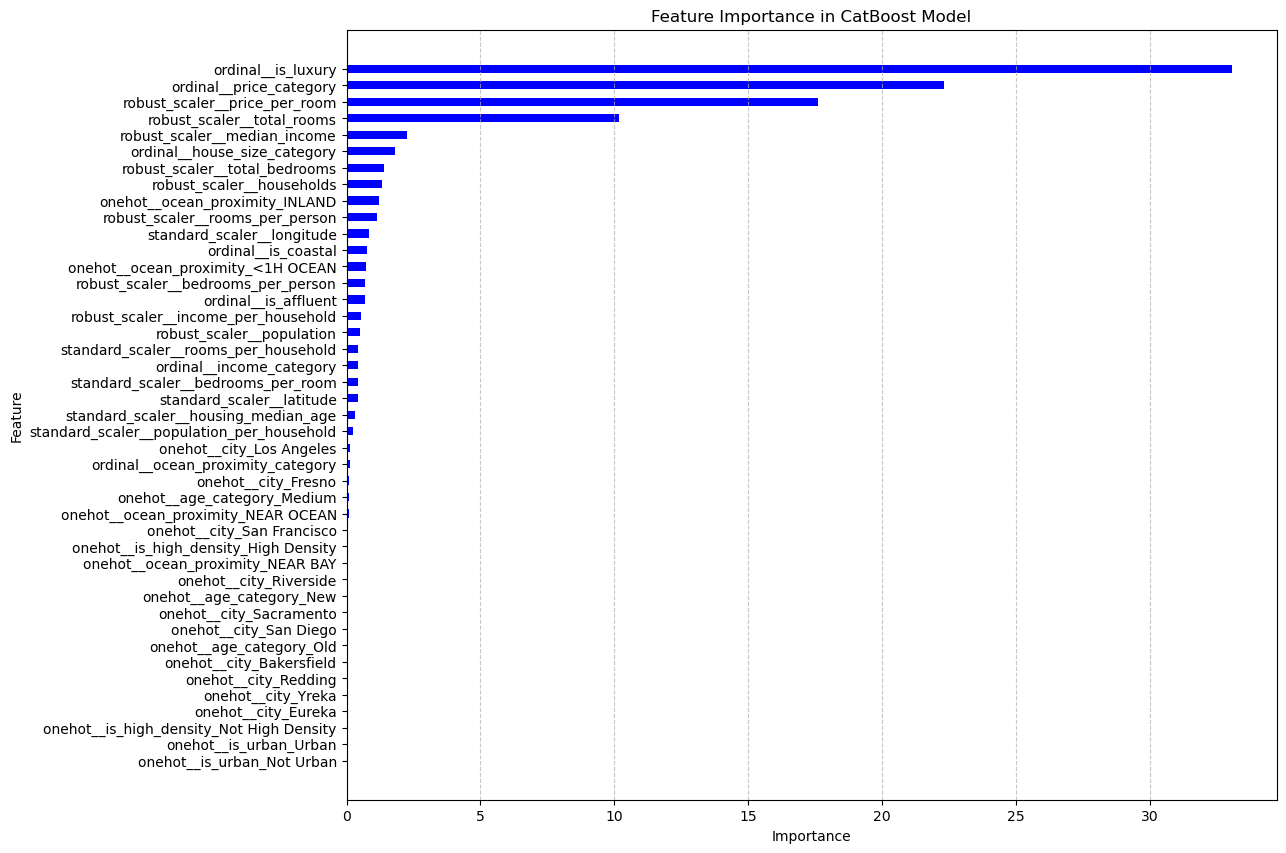

In [80]:
best_model = random_search_cat.best_estimator_.named_steps['model']
feature_importance = best_model.get_feature_importance()

feature_names = random_search_cat.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 10))  
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], 
                color="blue", height=0.5) 

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in CatBoost Model")

plt.yticks(np.arange(len(feature_importance_df['Feature'])), 
           feature_importance_df['Feature'], fontsize=10)

plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)  

plt.show()

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b style="font-size: 18px;">Insight</b>
<ol>
    <li><b style="font-size: 16px;">Strongest Influences</b></li>
</ol>
<ul>
    <li>ordinal_is_luxury (Strongest Influence): Houses categorized as luxury significantly influence the price prediction. Luxury homes have premium features, better locations, and higher demand, making them consistently more expensive.</li>
    <li>ordinal_price_category: This feature likely represents pre-defined price ranges. A home belonging to a higher price category indicates it already has characteristics associated with expensive properties, making it a strong predictor.</li>
    <li>robust_scaler_price_per_room: Price per room is a strong indicator of value. If a house has a high price per room, it usually means it's in a high-demand area or has superior amenities, finishes, or a premium location.</li>
    <li>robust_scaler_total_rooms & robust_scaler_total_bedrooms: More rooms and bedrooms usually increase house prices because they indicate larger homes. However, if a house has too many rooms but is in a low-demand area, the correlation might weaken.</li>
    <li>robust_scaler_median_income: Income level of the neighborhood is one of the biggest price determinants. Expensive homes are often located in high-income areas where residents can afford premium housing.</li>
</ul>
<ol start="2">
    <li><b style="font-size: 16px;">Geographical & Structural Features</b></li>
</ol>
<ul>
    <li>ordinal_house_size_category: Homes are categorized by size, which helps in price prediction. Larger homes typically cost more, but the effect depends on location and demand.</li>
    <li>onehot_ocean_proximity_INLAND & onehot_ocean_proximity_< 1H OCEAN: Proximity to the ocean is a major price driver. Houses closer to the ocean have higher values because they offer scenic views, beachfront access, and a high-status location. Inland homes tend to be cheaper due to distance from prime coastal areas.</li>
    <li>standard_scaler_longitude & standard_scaler_latitude: Geographic coordinates influence house prices by placing them in high-cost vs. low-cost regions. Homes in San Francisco, Los Angeles, and coastal areas tend to be far more expensive than those in inland or rural regions.</li>
    <li>ordinal_income_category & robust_scaler_income_per_household: Income per household is a key factor in determining house affordability. Higher-income neighborhoods tend to have better schools, amenities, and safer environments, which drive up demand and home prices.</li>
</ul>
<ol start="3">
    <li><b style="font-size: 16px;">Social & Density Factors</b></li>
</ol>
<ul>
    <li>onehot_city_Los Angeles, onehot_city_San Francisco, onehot_city_San Diego: The city a house is in greatly influences its price due to economic factors, demand, and desirability. San Francisco and Los Angeles are among the most expensive real estate markets due to tech and entertainment industries driving demand.</li>
    <li>onehot_is_high_density_High Density: High-density areas indicate urban environments where land is scarce and housing demand is high. This usually increases property values unless overcrowding negatively impacts livability.</li>
    <li>standard_scaler_population_per_household: More people per household could indicate high demand for affordable housing, meaning prices may not necessarily be high. If a region has high population density but low income, home values might be lower despite high occupancy rates.</li>
</ul>
</blockquote>

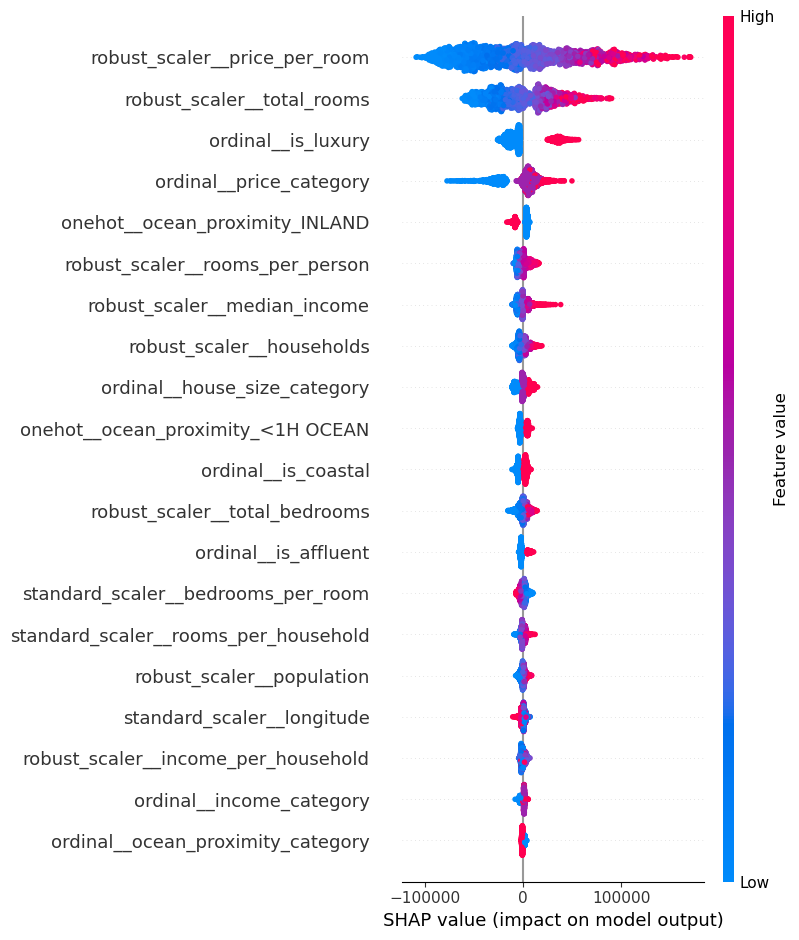

In [81]:
import shap

best_model = random_search_cat.best_estimator_

X_test_transformed = best_model.named_steps['preprocessor'].transform(X_test)

feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

explainer = shap.Explainer(best_model.named_steps['model'])
shap_values = explainer(X_test_transformed)

plt.figure(figsize=(8, 10))
shap.summary_plot(shap_values, features=X_test_transformed, feature_names=feature_names, show=True)

<blockquote style="background: #ffff; padding: 10px; border-left: 4px solid #64B5F6; margin: 10px 0;">
<b>Insight</b>
    <li>price_per_room (Higher → Increases Price, Lower → Decreases Price): In California’s competitive housing market, a high price per room often reflects properties in prime locations (e.g., San Francisco, Los Angeles, Silicon Valley). Homes in high-demand areas tend to be more expensive per square foot. Luxury or well-designed homes with high-end finishes justify a higher price per room. A lower price per room often occurs in lower-income or rural areas, where demand and property values are lower. Older homes with smaller rooms or poorly maintained properties may have less market appeal.</li>
    <li>total_rooms (More Rooms → Slightly Increases Price, Too Many Rooms → Less Impact): Larger homes are generally more expensive because they offer more living space, making them attractive to families. In cities with high real estate prices, additional rooms can significantly increase market value. If a house has an excessive number of rooms, it may be less attractive unless it is a luxury property. More rooms don't always mean a better location, so in some cases, a small home in a prime area can be worth more than a large home in a remote area.</li>
    <li>is_luxury (Yes → Sharp Increase in Price): California has a high demand for luxury real estate, especially in places like Beverly Hills, Malibu, and Silicon Valley. These homes usually come with exclusive features (ocean views, smart home technology, custom architecture), which drive up the price. Luxury branding matters—buyers are willing to pay a premium for homes labeled as high-end, even if the size isn’t much larger than regular homes. Non-luxury homes cater to a broader market and are priced based on practical considerations rather than exclusivity. The absence of high-end amenities or prime locations prevents them from reaching top-tier prices.</li>
    <li>price_category (Higher Category → Higher Price): This is a categorical representation of home values, so naturally, homes in higher price brackets reflect their location, demand, and features. California's real estate market has a clear tiered pricing structure: entry-level homes are typically in suburban or inland areas, mid-range homes might be in growing metro areas and high-end homes are concentrated in high-demand coastal cities. Homes in lower categories often are in less desirable locations and have fewer amenities or lower build quality. They are also located in older or distressed areas with limited infrastructure.</li>

<div style="padding:10px; 
            color:#ffff;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            background-color: #213555;
            overflow:hidden;
            font-weight:500">7. Business Implication</div>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Rule-Based</div>

>A rule-based approach in modeling or artificial intelligence systems uses predefined explicit rules to make decisions or predictions. These rules are typically in the form of if-then statements, designed based on domain knowledge or historical data patterns.

>The rule base used is from the paper by Pace, R. Kelley, and Ronald Barry, "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297. In this rule base, the OLS model is used because SAR requires a spatial matrix.

>In the paper, the authors aim to demonstrate that SAR (which accounts for spatial dependence) performs better than OLS (which ignores spatial dependence). Therefore, OLS is used as a baseline to compare predictive results and statistical inference.

In [82]:
import statsmodels.api as sm
df_analysis = df.copy()

df_analysis = df_analysis.rename(columns={
    "median_house_value": "MEDIAN_VALUE",
    "median_income": "MEDIAN_INCOME",
    "housing_median_age": "MEDIAN_AGE",
    "total_rooms": "TOTAL_ROOMS",
    "total_bedrooms": "TOTAL_BEDROOMS",
    "population": "POPULATION",
    "households": "HOUSEHOLDS",
    "longitude": "LONGITUDE",
    "latitude": "LATITUDE"
})

df_analysis = df_analysis.assign(
    MEDIAN_INCOME_2=lambda x: x["MEDIAN_INCOME"] ** 2,
    MEDIAN_INCOME_3=lambda x: x["MEDIAN_INCOME"] ** 3,
    LOG_MEDIAN_AGE=lambda x: np.log1p(x["MEDIAN_AGE"]),
    LOG_TOTAL_ROOMS_POPULATION=lambda x: np.log1p(x["TOTAL_ROOMS"] / (x["POPULATION"] + 1)),
    LOG_BEDROOMS_POPULATION=lambda x: np.log1p(x["TOTAL_BEDROOMS"] / (x["POPULATION"] + 1)),
    LOG_POPULATION_HOUSEHOLDS=lambda x: np.log1p(x["POPULATION"] / (x["HOUSEHOLDS"] + 1)),
    LOG_HOUSEHOLDS=lambda x: np.log1p(x["HOUSEHOLDS"])
)

X_analysis = df_analysis[["MEDIAN_INCOME", "MEDIAN_INCOME_2", "MEDIAN_INCOME_3",
                          "LOG_MEDIAN_AGE", "LOG_TOTAL_ROOMS_POPULATION", "LOG_BEDROOMS_POPULATION",
                          "LOG_POPULATION_HOUSEHOLDS", "LOG_HOUSEHOLDS"]].copy()  
y_analysis = np.log(df_analysis["MEDIAN_VALUE"]).copy()  

X_analysis_cleaned = X_analysis.replace([np.inf, -np.inf], np.nan).fillna(X_analysis.median())

X_train, X_test, y_train, y_test = train_test_split(X_analysis_cleaned, y_analysis, test_size=0.2, random_state=10)

X_train, X_test = X_train.dropna(), X_test.dropna()
y_train, y_test = y_analysis.loc[X_train.index].copy(), y_analysis.loc[X_test.index].copy()  # Buat salinan y_train dan y_test

X_train = sm.add_constant(X_train, has_constant='add')
X_test = sm.add_constant(X_test, has_constant='add')

model = sm.OLS(y_train, X_train).fit()

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

metrics_df = pd.DataFrame({
    "Model": ["Logistic Linear Regression"],
    "MAE Train": [mean_absolute_error(np.exp(y_train), np.exp(y_train_pred))],
    "MAE Test": [mean_absolute_error(np.exp(y_test), np.exp(y_test_pred))],
    "MAPE Train (%)": [np.mean(np.abs((np.exp(y_train) - np.exp(y_train_pred)) / np.exp(y_train))) * 100],
    "MAPE Test (%)": [np.mean(np.abs((np.exp(y_test) - np.exp(y_test_pred)) / np.exp(y_test))) * 100],
    "R2 Train": [r2_score(y_train, y_train_pred)],
    "R2 Test": [r2_score(y_test, y_test_pred)]
})

print("Metrics from rule base are as follows:")
display(metrics_df)

Metrics from rule base are as follows:


Model     MAE Train      MAE Test  MAPE Train (%)  \
0  Logistic Linear Regression  47381.745417  45798.783118       28.399835   

   MAPE Test (%)  R2 Train  R2 Test  
0      28.532807  0.547641  0.56623

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Comparison Between Rule-Based and Machine Learning Models for House Price Prediction in California</div>

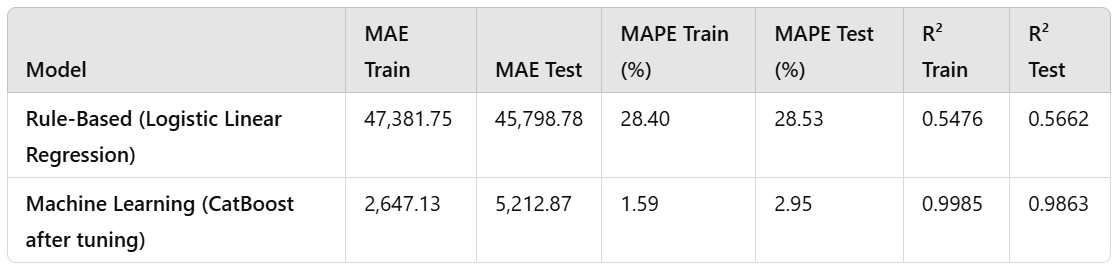

>When comparing a rule-based model (Logistic Linear Regression) with a machine learning model (CatBoost after hyperparameter tuning), we can clearly see that the machine learning approach significantly outperforms the rule-based model in all key metrics.
>1. Accuracy and Reliability:
Lower Error Rate:
>- The CatBoost model provides highly accurate predictions, which can help businesses (e.g., real estate agencies, investors, or buyers) make better-informed decisions. For example, accurate pricing can reduce the risk of overpaying or underpricing properties, leading to better profitability.
>2. Cost Savings:
>- The lower MAE and MAPE of the CatBoost model mean fewer errors in price predictions. For instance, if the average house price in California is ~$500,000:
    >- Rule-Based Error: 28.5% of 500.000 = 142.500 error per house.
    >- CatBoost Error: 2.95% of 500.000 = 14.750 error per house.
    >- Savings per House: 142.500 − 14.750 = $127.750. 
>- Over thousands of transactions, this could result in millions of dollars in savings or increased revenue.
>3. Competitive Advantage:
>- Using a machine learning model like CatBoost can give businesses a competitive edge by enabling them to price properties more accurately and respond faster to market changes. This can lead to higher customer satisfaction and trust.
>4. Profit/Loss Analysis: If we assume a business is evaluating 1,000 houses in California with an average price of $500,000:
>- Total Error by Rule-Based Approach: 1.000 houses * 142.500 = 142.500.000.
>- Total Error by CatBoost Model: 1.000 houses * 14.750 = 14.750.000. This represents a much smaller financial risk and higher accuracy.
>- Net Benefit of Using CatBoost: 142.500.000 (Rule−Based Error) − 14.750.000 (CatBoost Error) = $127.750.000 in potential savings or increased revenue.


<div style="padding:10px; 
            color:#ffff;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            background-color: #213555;
            overflow:hidden;
            font-weight:500">8. Model Limitation</div>

>The model should only make predictions within the following feature ranges. Any input data outside these limits may lead to unreliable results.
>1. Longitude: Must be between -124.35 and -114.31.
>2. Latitude: Must be between 32.54 and 41.99.
>3. Housing Median Age: Must be between 1 and 52 years.
>4. Total Rooms: Must be between 2 and 32,627.
>5. Total Bedrooms: Must be between 2 and 6,445.
>6. Population: Must be between 3 and 35,682.
>7. Households: Must be between 2 and 6,082.
>8. Median Income: Must be between 0.499 and 15.001.
>9. Median House Value: Must be between $14,999 and $479,500.
>10. Rooms per Household: Must be between 2.059769 and 8.440329.
>11. Bedrooms per Room: Must be between 0.079867 and 0.335025.
>12. Population per Household: Must be between 1.147406 and 4.560277.
>13. Income per Household: Must be between 0.379596 and 27.629836.
>14. Price per Room: Must be between 2.255639 and 274.845958.
>15. Rooms per Person: Must be between 0.372505 and 3.449184.
>16. Bedrooms per Person: Must be between 0.124789 and 0.634712.

<div style="padding:10px; 
            color:#ffff;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            background-color: #213555;
            overflow:hidden;
            font-weight:500">9. Conclusion</div>

>In conclusion, the comparison between the rule-based model (Logistic Linear Regression) and the machine learning model (CatBoost) demonstrates the clear superiority of the machine learning approach for house price prediction in California. The CatBoost model offers significantly higher accuracy and reliability, reducing the error rate and enabling businesses to make better-informed decisions. This precision minimizes the risks of overpaying or underpricing properties, ultimately leading to improved profitability and more effective real estate transactions.

>Furthermore, the cost savings achieved through the CatBoost model are substantial, with errors per house dropping from 142.500 to 14.750 when compared to the rule-based approach. Over thousands of transactions, these savings can accumulate to millions of dollars, providing businesses with a significant financial advantage. This reduction in errors not only lowers financial risks but also enhances revenue potential, making the machine learning model a far more cost-effective solution.

>Lastly, adopting the CatBoost model provides businesses with a competitive edge by enabling faster and more accurate responses to market changes. This leads to higher customer satisfaction and trust, which are critical for long-term success in the real estate industry. With a net benefit of over $127 million in potential savings or increased revenue for 1,000 houses, the machine learning approach proves to be a transformative tool for businesses operating in California's dynamic housing market.

<div style="padding:10px; 
            color:#ffff;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            background-color: #213555;
            overflow:hidden;
            font-weight:500">10. Recommendation</div>

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Recommendations for Real Estate Agents</div>

>1. Emphasize high-demand features by marketing room count, price per room, and household size while highlighting luxury amenities in premium properties.
>2. Guide buyers with income and market data by recommending areas with rising income growth and balancing affordability with long-term value.
>3. Use data-driven pricing strategies by factoring in room count, household density, and income trends rather than relying solely on nearby sales.
>4. Prioritize multi-room properties to maximize rental yield and flexibility in renting out individual rooms.
>5. Target growing inland markets where rising median incomes signal strong future appreciation potential.
>6. Balance luxury and mid-range investments by focusing on high-income mid-range areas for stability and avoiding over-reliance on volatile luxury markets.
>7. Consider household and income trends to invest in rental properties in high-density areas with increasing median income for sustainable returns.

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Recommendations for Residents</div>

>1. Prioritize homes based on price per room by choosing properties with a good room-to-price balance and efficient space utilization.
>2. Consider location wisely by looking beyond coastal areas and focusing on inland neighborhoods with strong appreciation potential.
>3. Pay attention to income and household metrics by investing in areas with high median income and stable household sizes for better price stability.
>4. Evaluate luxury and affluent classifications carefully to avoid overpaying for overpriced high-end properties in weak demand areas.
>5. Maximize household and room efficiency by selecting homes with the right rooms-per-person ratio and rental potential.
>6. Be strategic about urban vs. suburban choices by weighing rental demand, commute times, and job market trends before deciding.

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Recommendations for Feature Engineering</div>

>To enhance model performance, it is recommended to incorporate the following new features:
>1. Job Market Strength:
Job Growth Rate – Areas with strong job growth attract more buyers and increase home demand.
>2. School Quality:
Average School Rating Nearby – Higher-rated schools significantly boost property values.
>3. Crime Rate
Local Crime Rate – Lower crime areas tend to have higher home prices and stronger demand.
>4. Transportation & Commute
Average Commute Time to Major Job Centers – Shorter commutes increase home desirability.
>5. Housing Market Trends
Historical Price Growth Rate – Past appreciation trends help predict future home value increases.

<div style="padding:3px; 
            color:#ffff;
            margin:10px;
            font-size:150%;
            text-align:LEFT;
            display:fill;
            background-color: #3E5879;
            overflow:hidden;
            font-weight:500">Recommendations for Model Improvement</div>

>1. Address Overfitting: Increase regularization (l2_leaf_reg), use early stopping, reduce tree depth, and set higher min_data_in_leaf to prevent overfitting.
>2. Hyperparameter Tuning: Expand the search space, include more parameters, and use Bayesian optimization for efficient tuning.
>3. Feature Engineering: Create interaction features, perform feature selection, and consider target encoding for categorical variables.
>4. Data Preprocessing: Experiment with custom scaling, handle outliers, and apply transformations like log or Box-Cox to skewed features.
>5. Cross-Validation Strategy: Increase the number of folds and use stratified sampling for more robust performance evaluation.
>6. Evaluation Metrics: Optimize for multiple metrics (e.g., MAE and MAPE) or use a custom loss function aligned with business goals.
>7. Ensemble Methods: Combine CatBoost with other models (e.g., XGBoost, LightGBM) using stacking or averaging for better performance.
>8. Increase Training Data: Collect more data or use synthetic data generation to improve model generalization.
>9. Post-Processing: Calibrate predictions or optimize decision thresholds based on business objectives.
>10. Error Analysis: Analyze residuals and feature importance to identify and address prediction errors.

<div style="padding:10px; 
            color:#ffff;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            background-color: #213555;
            overflow:hidden;
            font-weight:500">11. Save Model</div>

In [83]:
best_model_cat = random_search_cat.best_estimator_
best_model_cat.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['ocean_proximity',
                                                   'age_category', 'is_urban',
                                                   'is_high_density', 'city']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Inland',
                                                                                               'Coastal'],
                                                                                              ['Smal...
                                                   'rooms_per_household',
                                                   'bedrooms_per_room',
                                                   'population_per_household']),
                                                 ('robust_scaler',
                                                  Pipeline(steps=[('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income',
                                                   'income_per_household',
                                                   'price_per_room',
                                                   'rooms_per_person',
                                                   'bedrooms_per_person'])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x000001CE2FB02EA0>)])

In [84]:
pip install streamlit

In [85]:
import pickle

with open('best_model_cat.pkl', 'wb') as file:
    pickle.dump(best_model_cat, file)
    
with open('best_model_cat.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [86]:
# Simpan model terbaik ke file .sav
with open('best_model_cat.sav', 'wb') as file:
    pickle.dump(best_model_cat, file)

# Untuk memuat kembali model yang sudah disimpan
with open('best_model_cat.sav', 'rb') as file:
    loaded_model = pickle.load(file)